In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter
import time

from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import kci

from epc import epc



def gdata(n):
    """
    Generate data based on a causal graph with nonlinear relationships.

    1->3
    1->2->3->5<-4
    
    Args:
        n (int): Number of samples.

    Returns:
        np.ndarray, np.ndarray: Generated data and the causal graph.
    """
    g = np.array([[ 0,-1,-1, 0, 0],
                  [ 1, 0,-1, 0, 0],
                  [ 1, 1, 0, 0,-1],
                  [ 0, 0, 0, 0,-1],
                  [ 0, 0, 1, 1, 0]])

    A = np.random.normal(0, 1, n)
    B = np.random.normal(0, 1, n) + np.random.uniform(0, 1, n) * np.sqrt(np.abs(A))
    C = np.random.normal(0, 1, n) + np.random.uniform(0, 1, n) * np.sin(A) + np.random.uniform(0, 1, n) * np.cos(B)
    D = np.random.normal(0, 1, n)
    E = np.random.normal(0, 1, n) + np.random.uniform(0, 1, n) * np.sin(C) + np.random.uniform(0, 1, n) * np.cos(D)

    A = (A - np.mean(A)) / np.std(A)
    B = (B - np.mean(B)) / np.std(B)
    C = (C - np.mean(C)) / np.std(C)
    D = (D - np.mean(D)) / np.std(D)
    E = (E - np.mean(E)) / np.std(E)

    data = np.array([A, B, C, D, E]).T
    
    return data, g



def compute_SHD(tureG, estiG):
    """
    cg.G.graph[j,i]=1 and cg.G.graph[i,j]=-1 indicates  i --> j
    cg.G.graph[i,j] = cg.G.graph[j,i] = -1 indicates i --- j
    cg.G.graph[i,j] = cg.G.graph[j,i] = 1 indicates i <-> j
    """
    non = (tureG!=estiG)
    return int(np.sum(non|non.T)/2)


/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
t = 100
n = 1600
res = []

for i in tqdm(range(t), desc="Processing"):
    np.random.seed(i)
    data, trueG = gdata(n)
    cg = pc(data, 0.1, kci, show_progress=False)
    G = cg.G.graph
    res.append(compute_SHD(trueG, G))

np.mean(res), np.std(res)

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                          | 1/100 [00:53<1:28:24, 53.58s/it]

Processing:   2%|█▊                                                                                         | 2/100 [02:01<1:41:45, 62.30s/it]

Processing:   3%|██▋                                                                                        | 3/100 [02:39<1:22:44, 51.18s/it]

Processing:   4%|███▋                                                                                       | 4/100 [03:32<1:22:55, 51.83s/it]

Processing:   5%|████▌                                                                                      | 5/100 [04:25<1:22:31, 52.12s/it]

Processing:   6%|█████▍                                                                                     | 6/100 [05:18<1:22:10, 52.45s/it]

Processing:   7%|██████▎                                                                                    | 7/100 [05:56<1:13:54, 47.68s/it]

Processing:   8%|███████▎                                                                                   | 8/100 [06:34<1:08:37, 44.75s/it]

Processing:   9%|████████▏                                                                                  | 9/100 [07:51<1:22:47, 54.59s/it]

Processing:  10%|█████████                                                                                 | 10/100 [08:33<1:16:13, 50.82s/it]

Processing:  11%|█████████▉                                                                                | 11/100 [09:35<1:20:24, 54.20s/it]

Processing:  12%|██████████▊                                                                               | 12/100 [10:36<1:22:37, 56.34s/it]

Processing:  13%|███████████▋                                                                              | 13/100 [11:20<1:16:16, 52.60s/it]

Processing:  14%|████████████▌                                                                             | 14/100 [12:48<1:30:46, 63.33s/it]

Processing:  15%|█████████████▌                                                                            | 15/100 [13:32<1:21:14, 57.35s/it]

Processing:  16%|██████████████▍                                                                           | 16/100 [14:42<1:25:57, 61.40s/it]

Processing:  17%|███████████████▎                                                                          | 17/100 [15:24<1:16:34, 55.35s/it]

Processing:  18%|████████████████▏                                                                         | 18/100 [16:04<1:09:32, 50.88s/it]

Processing:  19%|█████████████████                                                                         | 19/100 [17:17<1:17:36, 57.49s/it]

Processing:  20%|██████████████████                                                                        | 20/100 [18:35<1:25:00, 63.76s/it]

Processing:  21%|██████████████████▉                                                                       | 21/100 [19:19<1:15:55, 57.66s/it]

Processing:  22%|███████████████████▊                                                                      | 22/100 [20:35<1:22:12, 63.24s/it]

Processing:  23%|████████████████████▋                                                                     | 23/100 [21:16<1:12:23, 56.41s/it]

Processing:  24%|█████████████████████▌                                                                    | 24/100 [22:04<1:08:13, 53.87s/it]

Processing:  25%|██████████████████████▌                                                                   | 25/100 [22:40<1:00:37, 48.50s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [23:20<56:54, 46.14s/it]

Processing:  27%|████████████████████████▎                                                                 | 27/100 [24:19<1:00:38, 49.85s/it]

Processing:  28%|█████████████████████████▏                                                                | 28/100 [25:19<1:03:43, 53.10s/it]

Processing:  29%|██████████████████████████                                                                | 29/100 [26:36<1:11:06, 60.09s/it]

Processing:  30%|███████████████████████████                                                               | 30/100 [28:53<1:36:59, 83.14s/it]

Processing:  31%|███████████████████████████▉                                                              | 31/100 [29:35<1:21:21, 70.75s/it]

Processing:  32%|████████████████████████████▊                                                             | 32/100 [30:50<1:21:57, 72.32s/it]

Processing:  33%|█████████████████████████████▋                                                            | 33/100 [31:33<1:10:48, 63.41s/it]

Processing:  34%|██████████████████████████████▌                                                           | 34/100 [32:36<1:09:28, 63.15s/it]

Processing:  35%|███████████████████████████████▍                                                          | 35/100 [33:34<1:06:48, 61.66s/it]

Processing:  36%|████████████████████████████████▍                                                         | 36/100 [34:36<1:06:01, 61.91s/it]

Processing:  37%|█████████████████████████████████▎                                                        | 37/100 [35:36<1:04:11, 61.13s/it]

Processing:  38%|██████████████████████████████████▏                                                       | 38/100 [36:53<1:08:11, 65.99s/it]

Processing:  39%|███████████████████████████████████                                                       | 39/100 [38:13<1:11:17, 70.12s/it]

Processing:  40%|████████████████████████████████████                                                      | 40/100 [38:56<1:02:11, 62.19s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [39:39<55:24, 56.35s/it]

Processing:  42%|█████████████████████████████████████▊                                                    | 42/100 [41:02<1:02:06, 64.26s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [41:46<55:21, 58.27s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [42:46<54:53, 58.82s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [43:28<49:18, 53.78s/it]

Processing:  46%|█████████████████████████████████████████▍                                                | 46/100 [45:21<1:04:22, 71.53s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [46:20<59:55, 67.84s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [47:22<57:11, 65.99s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [48:40<59:13, 69.67s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [49:22<51:04, 61.29s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [50:40<54:04, 66.21s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [51:55<55:06, 68.88s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [52:36<47:18, 60.40s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [53:53<50:14, 65.53s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [54:36<44:06, 58.81s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [56:08<50:27, 68.81s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [56:51<43:43, 61.00s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [58:10<46:25, 66.33s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [58:51<40:07, 58.72s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [59:56<40:28, 60.72s/it]

Processing:  61%|██████████████████████████████████████████████████████▉                                   | 61/100 [1:00:37<35:37, 54.80s/it]

Processing:  62%|███████████████████████████████████████████████████████▊                                  | 62/100 [1:02:42<48:02, 75.85s/it]

Processing:  63%|████████████████████████████████████████████████████████▋                                 | 63/100 [1:03:25<40:40, 65.95s/it]

Processing:  64%|█████████████████████████████████████████████████████████▌                                | 64/100 [1:04:10<35:42, 59.53s/it]

Processing:  65%|██████████████████████████████████████████████████████████▌                               | 65/100 [1:04:46<30:37, 52.50s/it]

Processing:  66%|███████████████████████████████████████████████████████████▍                              | 66/100 [1:05:46<31:06, 54.89s/it]

Processing:  67%|████████████████████████████████████████████████████████████▎                             | 67/100 [1:06:30<28:17, 51.44s/it]

Processing:  68%|█████████████████████████████████████████████████████████████▏                            | 68/100 [1:07:28<28:31, 53.49s/it]

Processing:  69%|██████████████████████████████████████████████████████████████                            | 69/100 [1:08:32<29:22, 56.84s/it]

Processing:  70%|██████████████████████████████████████████████████████████████▉                           | 70/100 [1:09:15<26:12, 52.42s/it]

Processing:  71%|███████████████████████████████████████████████████████████████▉                          | 71/100 [1:09:58<23:58, 49.61s/it]

Processing:  72%|████████████████████████████████████████████████████████████████▊                         | 72/100 [1:11:14<26:50, 57.53s/it]

Processing:  73%|█████████████████████████████████████████████████████████████████▋                        | 73/100 [1:11:57<24:01, 53.40s/it]

Processing:  74%|██████████████████████████████████████████████████████████████████▌                       | 74/100 [1:13:16<26:25, 60.97s/it]

Processing:  75%|███████████████████████████████████████████████████████████████████▌                      | 75/100 [1:13:59<23:12, 55.72s/it]

Processing:  76%|████████████████████████████████████████████████████████████████████▍                     | 76/100 [1:14:41<20:36, 51.52s/it]

Processing:  77%|█████████████████████████████████████████████████████████████████████▎                    | 77/100 [1:15:23<18:41, 48.75s/it]

Processing:  78%|██████████████████████████████████████████████████████████████████████▏                   | 78/100 [1:16:41<21:02, 57.39s/it]

Processing:  79%|███████████████████████████████████████████████████████████████████████                   | 79/100 [1:17:24<18:34, 53.05s/it]

Processing:  80%|████████████████████████████████████████████████████████████████████████                  | 80/100 [1:18:22<18:08, 54.42s/it]

Processing:  81%|████████████████████████████████████████████████████████████████████████▉                 | 81/100 [1:19:07<16:22, 51.73s/it]

Processing:  82%|█████████████████████████████████████████████████████████████████████████▊                | 82/100 [1:19:49<14:37, 48.72s/it]

Processing:  83%|██████████████████████████████████████████████████████████████████████████▋               | 83/100 [1:20:49<14:46, 52.13s/it]

Processing:  84%|███████████████████████████████████████████████████████████████████████████▌              | 84/100 [1:22:10<16:12, 60.77s/it]

Processing:  85%|████████████████████████████████████████████████████████████████████████████▌             | 85/100 [1:23:29<16:33, 66.20s/it]

Processing:  86%|█████████████████████████████████████████████████████████████████████████████▍            | 86/100 [1:24:19<14:19, 61.43s/it]

Processing:  87%|██████████████████████████████████████████████████████████████████████████████▎           | 87/100 [1:25:38<14:28, 66.84s/it]

Processing:  88%|███████████████████████████████████████████████████████████████████████████████▏          | 88/100 [1:26:38<12:57, 64.78s/it]

Processing:  89%|████████████████████████████████████████████████████████████████████████████████          | 89/100 [1:27:19<10:33, 57.57s/it]

Processing:  90%|█████████████████████████████████████████████████████████████████████████████████         | 90/100 [1:28:25<10:01, 60.20s/it]

Processing:  91%|█████████████████████████████████████████████████████████████████████████████████▉        | 91/100 [1:29:09<08:16, 55.13s/it]

Processing:  92%|██████████████████████████████████████████████████████████████████████████████████▊       | 92/100 [1:30:11<07:37, 57.23s/it]

Processing:  93%|███████████████████████████████████████████████████████████████████████████████████▋      | 93/100 [1:31:24<07:13, 61.89s/it]

Processing:  94%|████████████████████████████████████████████████████████████████████████████████████▌     | 94/100 [1:32:41<06:38, 66.43s/it]

Processing:  95%|█████████████████████████████████████████████████████████████████████████████████████▌    | 95/100 [1:33:25<04:58, 59.67s/it]

Processing:  96%|██████████████████████████████████████████████████████████████████████████████████████▍   | 96/100 [1:34:22<03:56, 59.03s/it]

Processing:  97%|███████████████████████████████████████████████████████████████████████████████████████▎  | 97/100 [1:35:05<02:42, 54.30s/it]

Processing:  98%|████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [1:35:48<01:41, 50.86s/it]

Processing:  99%|█████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [1:37:04<00:58, 58.29s/it]

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [1:37:50<00:00, 54.53s/it]

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [1:37:50<00:00, 58.70s/it]

(3.45, 0.6224949798994367)

In [3]:
t = 10
n = 1600
eres = []

for i in tqdm(range(t), desc="Processing"):
    np.random.seed(i)
    data, trueG = gdata(n)
    ecg = epc(data, 0.4, "Gamma", 8, show_progress=False)
    eG = ecg.G.graph
    eres.append(compute_SHD(trueG, eG))
np.mean(eres), np.std(eres)

Processing:   0%|                                                                                                      | 0/10 [00:00<?, ?it/s]

Processing:  10%|█████████▍                                                                                    | 1/10 [00:06<00:59,  6.66s/it]

Processing:  20%|██████████████████▊                                                                           | 2/10 [00:21<01:30, 11.31s/it]

Processing:  30%|████████████████████████████▏                                                                 | 3/10 [00:28<01:05,  9.38s/it]

Processing:  40%|█████████████████████████████████████▌                                                        | 4/10 [00:42<01:07, 11.32s/it]

Processing:  50%|███████████████████████████████████████████████                                               | 5/10 [00:56<01:00, 12.19s/it]

Processing:  60%|████████████████████████████████████████████████████████▍                                     | 6/10 [01:04<00:43, 10.97s/it]

Processing:  70%|█████████████████████████████████████████████████████████████████▊                            | 7/10 [01:11<00:28,  9.60s/it]

Processing:  80%|███████████████████████████████████████████████████████████████████████████▏                  | 8/10 [01:20<00:18,  9.24s/it]

Processing:  90%|████████████████████████████████████████████████████████████████████████████████████▌         | 9/10 [01:27<00:08,  8.64s/it]

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:36<00:00,  8.80s/it]

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:36<00:00,  9.67s/it]

(4.0, 0.6324555320336759)

In [4]:
t = 10
n = 1600
ares = []

for i in tqdm(range(t), desc="Processing"):
    np.random.seed(i)
    data, trueG = gdata(n)
    acg = epc(data, 0.1, "ACAT", 2, show_progress=False)
    aG = acg.G.graph
    ares.append(compute_SHD(trueG, aG))
np.mean(ares), np.std(ares)

Processing:   0%|                                                                                                      | 0/10 [00:00<?, ?it/s]

Processing:  10%|█████████▍                                                                                    | 1/10 [00:22<03:25, 22.83s/it]

Processing:  20%|██████████████████▊                                                                           | 2/10 [00:54<03:44, 28.06s/it]

Processing:  30%|████████████████████████████▏                                                                 | 3/10 [01:06<02:25, 20.85s/it]

Processing:  40%|█████████████████████████████████████▌                                                        | 4/10 [01:31<02:13, 22.27s/it]

Processing:  50%|███████████████████████████████████████████████                                               | 5/10 [01:50<01:45, 21.16s/it]

Processing:  60%|████████████████████████████████████████████████████████▍                                     | 6/10 [02:12<01:26, 21.63s/it]

Processing:  70%|█████████████████████████████████████████████████████████████████▊                            | 7/10 [02:29<00:59, 19.98s/it]

Processing:  80%|███████████████████████████████████████████████████████████████████████████▏                  | 8/10 [02:46<00:38, 19.04s/it]

Processing:  90%|████████████████████████████████████████████████████████████████████████████████████▌         | 9/10 [03:11<00:20, 20.90s/it]

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [03:35<00:00, 21.96s/it]

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [03:35<00:00, 21.59s/it]

(3.4, 0.48989794855663565)

In [5]:
t = 10
n = 1600
ares = []

for i in tqdm(range(t), desc="Processing"):
    np.random.seed(i)
    data, trueG = gdata(n)
    acg = epc(data, 0.1, "ACAT", 4, show_progress=False)
    aG = acg.G.graph
    ares.append(compute_SHD(trueG, aG))
np.mean(ares), np.std(ares)

Processing:   0%|                                                                                                      | 0/10 [00:00<?, ?it/s]

Processing:  10%|█████████▍                                                                                    | 1/10 [00:10<01:36, 10.68s/it]

Processing:  20%|██████████████████▊                                                                           | 2/10 [00:19<01:17,  9.69s/it]

Processing:  30%|████████████████████████████▏                                                                 | 3/10 [00:25<00:54,  7.72s/it]

Processing:  40%|█████████████████████████████████████▌                                                        | 4/10 [00:31<00:43,  7.25s/it]

Processing:  50%|███████████████████████████████████████████████                                               | 5/10 [00:37<00:33,  6.66s/it]

Processing:  60%|████████████████████████████████████████████████████████▍                                     | 6/10 [00:47<00:32,  8.05s/it]

Processing:  70%|█████████████████████████████████████████████████████████████████▊                            | 7/10 [00:54<00:22,  7.41s/it]

Processing:  80%|███████████████████████████████████████████████████████████████████████████▏                  | 8/10 [01:02<00:15,  7.78s/it]

Processing:  90%|████████████████████████████████████████████████████████████████████████████████████▌         | 9/10 [01:09<00:07,  7.35s/it]

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:14<00:00,  6.86s/it]

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:14<00:00,  7.48s/it]

(3.3, 0.45825756949558405)

---

In [6]:
t = 100
ress = []
for n in [200,400,800,1200,1600,2000,2400,2800,3200]:
    start_time = time.time()
    res = []
    for i in tqdm(range(t), desc="Processing"):
        np.random.seed(i)
        data, trueG = gdata(n)
        cg = pc(data, 0.1, kci, show_progress=False)
        G = cg.G.graph
        res.append(compute_SHD(trueG, G))
        print(i)
    end_time = time.time()
    ress.append([np.mean(res), np.std(res), end_time - start_time])
np.array(ress).T

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:00<00:28,  3.45it/s]

0
1


Processing:   3%|██▊                                                                                          | 3/100 [00:00<00:24,  4.04it/s]

2


Processing:   4%|███▋                                                                                         | 4/100 [00:01<00:28,  3.38it/s]

3


Processing:   5%|████▋                                                                                        | 5/100 [00:01<00:29,  3.25it/s]

Processing:   6%|█████▌                                                                                       | 6/100 [00:01<00:23,  3.95it/s]

4
5


Processing:   7%|██████▌                                                                                      | 7/100 [00:01<00:24,  3.87it/s]

Processing:   9%|████████▎                                                                                    | 9/100 [00:02<00:15,  5.86it/s]

6
7
8


Processing:  10%|█████████▏                                                                                  | 10/100 [00:02<00:26,  3.37it/s]

9


Processing:  11%|██████████                                                                                  | 11/100 [00:02<00:26,  3.39it/s]

Processing:  12%|███████████                                                                                 | 12/100 [00:03<00:23,  3.76it/s]

10
11


Processing:  13%|███████████▉                                                                                | 13/100 [00:03<00:21,  4.08it/s]

Processing:  15%|█████████████▊                                                                              | 15/100 [00:03<00:15,  5.60it/s]

12
13
14


Processing:  16%|██████████████▋                                                                             | 16/100 [00:03<00:15,  5.51it/s]

15


Processing:  17%|███████████████▋                                                                            | 17/100 [00:04<00:19,  4.30it/s]

16


Processing:  18%|████████████████▌                                                                           | 18/100 [00:04<00:18,  4.37it/s]

Processing:  19%|█████████████████▍                                                                          | 19/100 [00:04<00:17,  4.72it/s]

17
18


19


Processing:  21%|███████████████████▎                                                                        | 21/100 [00:04<00:17,  4.46it/s]

20
21


Processing:  23%|█████████████████████▏                                                                      | 23/100 [00:05<00:16,  4.72it/s]

Processing:  25%|███████████████████████                                                                     | 25/100 [00:05<00:12,  5.86it/s]

22
23
24


Processing:  26%|███████████████████████▉                                                                    | 26/100 [00:06<00:18,  4.01it/s]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [00:06<00:16,  4.30it/s]

25
26


Processing:  28%|█████████████████████████▊                                                                  | 28/100 [00:06<00:18,  3.95it/s]

27


Processing:  29%|██████████████████████████▋                                                                 | 29/100 [00:06<00:18,  3.90it/s]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [00:07<00:12,  5.38it/s]

28
29
30


Processing:  32%|█████████████████████████████▍                                                              | 32/100 [00:07<00:11,  5.92it/s]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [00:07<00:09,  7.08it/s]

31
32
33


Processing:  35%|████████████████████████████████▏                                                           | 35/100 [00:07<00:09,  6.88it/s]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [00:07<00:07,  8.76it/s]

34
35
36


Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [00:07<00:07,  8.80it/s]

37
38


Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [00:08<00:08,  7.27it/s]

39


Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [00:08<00:09,  6.18it/s]

40
41


Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [00:08<00:10,  5.43it/s]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [00:08<00:09,  5.90it/s]

42
43


Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [00:09<00:08,  6.40it/s]

44


Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [00:09<00:11,  4.88it/s]

45


Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [00:09<00:12,  4.09it/s]

46


Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [00:10<00:17,  3.02it/s]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [00:10<00:11,  4.44it/s]

47
48
49


Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [00:10<00:11,  4.23it/s]

50
51
52


Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [00:11<00:08,  5.14it/s]

53
54
55


Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [00:11<00:07,  5.63it/s]

56


Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [00:12<00:08,  4.93it/s]

57


Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [00:12<00:08,  4.93it/s]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [00:12<00:06,  6.49it/s]

58
59
60


Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [00:12<00:06,  6.24it/s]

61


Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [00:12<00:06,  5.43it/s]

62


Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [00:13<00:07,  4.88it/s]

63


Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [00:13<00:09,  3.85it/s]

64


Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [00:13<00:08,  3.92it/s]

65


Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [00:14<00:08,  3.89it/s]

66
67


Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [00:14<00:07,  4.16it/s]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [00:14<00:05,  5.54it/s]

68
69
70


Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [00:14<00:05,  5.26it/s]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [00:15<00:05,  5.25it/s]

71
72


Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [00:15<00:05,  5.02it/s]

73


Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [00:15<00:05,  4.55it/s]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [00:15<00:03,  6.53it/s]

74
75
76


Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [00:15<00:03,  6.54it/s]

77


Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [00:16<00:03,  5.92it/s]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [00:16<00:03,  6.08it/s]

78
79


Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [00:16<00:03,  5.14it/s]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [00:16<00:02,  6.95it/s]

80
81
82


Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [00:16<00:02,  6.61it/s]

83


Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [00:17<00:02,  5.36it/s]

84


Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [00:17<00:03,  4.19it/s]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [00:17<00:02,  4.81it/s]

85
86


Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [00:17<00:02,  5.07it/s]

87


Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [00:18<00:02,  4.44it/s]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [00:18<00:01,  5.12it/s]

88
89


Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [00:18<00:01,  4.74it/s]

90


Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [00:18<00:01,  4.68it/s]

91


Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [00:18<00:01,  4.20it/s]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [00:19<00:01,  4.44it/s]

92
93


Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [00:19<00:00,  5.60it/s]

94
95


Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [00:19<00:00,  5.49it/s]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [00:19<00:00,  6.00it/s]

96
97


Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [00:20<00:00,  3.02it/s]

98


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  2.92it/s]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.80it/s]

99


Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:00<00:56,  1.75it/s]

0


Processing:   2%|█▊                                                                                           | 2/100 [00:02<02:04,  1.27s/it]

1


Processing:   3%|██▊                                                                                          | 3/100 [00:02<01:35,  1.02it/s]

2


Processing:   4%|███▋                                                                                         | 4/100 [00:04<01:55,  1.20s/it]

3


Processing:   5%|████▋                                                                                        | 5/100 [00:05<01:55,  1.22s/it]

4


Processing:   6%|█████▌                                                                                       | 6/100 [00:06<01:55,  1.23s/it]

5


Processing:   7%|██████▌                                                                                      | 7/100 [00:08<01:54,  1.23s/it]

6


Processing:   8%|███████▍                                                                                     | 8/100 [00:09<01:53,  1.23s/it]

7


Processing:   9%|████████▎                                                                                    | 9/100 [00:10<01:52,  1.23s/it]

8


Processing:  10%|█████████▏                                                                                  | 10/100 [00:11<01:51,  1.24s/it]

9


Processing:  11%|██████████                                                                                  | 11/100 [00:13<01:50,  1.24s/it]

10


Processing:  12%|███████████                                                                                 | 12/100 [00:15<02:12,  1.51s/it]

11


Processing:  13%|███████████▉                                                                                | 13/100 [00:16<02:10,  1.50s/it]

12


Processing:  14%|████████████▉                                                                               | 14/100 [00:17<02:00,  1.40s/it]

13


Processing:  15%|█████████████▊                                                                              | 15/100 [00:19<01:54,  1.34s/it]

14


Processing:  16%|██████████████▋                                                                             | 16/100 [00:20<01:41,  1.21s/it]

15


Processing:  17%|███████████████▋                                                                            | 17/100 [00:23<02:43,  1.97s/it]

16


Processing:  18%|████████████████▌                                                                           | 18/100 [00:25<02:33,  1.87s/it]

17


Processing:  19%|█████████████████▍                                                                          | 19/100 [00:26<02:13,  1.65s/it]

18


Processing:  20%|██████████████████▍                                                                         | 20/100 [00:28<02:16,  1.70s/it]

19


Processing:  21%|███████████████████▎                                                                        | 21/100 [00:29<02:04,  1.57s/it]

20


Processing:  22%|████████████████████▏                                                                       | 22/100 [00:30<01:51,  1.43s/it]

21


Processing:  23%|█████████████████████▏                                                                      | 23/100 [00:32<01:47,  1.39s/it]

22


Processing:  24%|██████████████████████                                                                      | 24/100 [00:33<01:49,  1.43s/it]

23


Processing:  25%|███████████████████████                                                                     | 25/100 [00:35<01:53,  1.52s/it]

24


Processing:  26%|███████████████████████▉                                                                    | 26/100 [00:37<01:58,  1.60s/it]

25


Processing:  27%|████████████████████████▊                                                                   | 27/100 [00:38<01:59,  1.63s/it]

26


Processing:  28%|█████████████████████████▊                                                                  | 28/100 [00:40<02:05,  1.74s/it]

27


Processing:  29%|██████████████████████████▋                                                                 | 29/100 [00:42<01:53,  1.59s/it]

28


Processing:  30%|███████████████████████████▌                                                                | 30/100 [00:43<01:45,  1.50s/it]

29


Processing:  31%|████████████████████████████▌                                                               | 31/100 [00:44<01:34,  1.37s/it]

30


Processing:  32%|█████████████████████████████▍                                                              | 32/100 [00:46<01:43,  1.52s/it]

31


Processing:  33%|██████████████████████████████▎                                                             | 33/100 [00:46<01:19,  1.19s/it]

32


Processing:  34%|███████████████████████████████▎                                                            | 34/100 [00:48<01:28,  1.35s/it]

33


Processing:  35%|████████████████████████████████▏                                                           | 35/100 [00:48<01:09,  1.06s/it]

34


Processing:  36%|█████████████████████████████████                                                           | 36/100 [00:50<01:20,  1.26s/it]

35


Processing:  37%|██████████████████████████████████                                                          | 37/100 [00:52<01:25,  1.35s/it]

36


Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [00:53<01:29,  1.44s/it]

37


Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [00:54<01:12,  1.18s/it]

38


Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [00:55<01:11,  1.19s/it]

39


Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [00:57<01:27,  1.48s/it]

40


Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [00:58<01:16,  1.32s/it]

41


Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [00:59<01:08,  1.21s/it]

42


Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [01:00<01:08,  1.22s/it]

43


Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [01:02<01:07,  1.23s/it]

44


Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [01:03<01:09,  1.29s/it]

45


Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [01:03<00:54,  1.04s/it]

46


Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [01:04<00:41,  1.25it/s]

47


Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [01:04<00:38,  1.33it/s]

48


Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [01:06<00:54,  1.09s/it]

49


Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [01:08<00:59,  1.22s/it]

50


Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [01:10<01:11,  1.49s/it]

51


Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [01:11<01:06,  1.42s/it]

52


Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [01:12<01:03,  1.38s/it]

53


Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [01:14<01:02,  1.38s/it]

54


Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [01:16<01:05,  1.48s/it]

55


Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [01:19<01:30,  2.10s/it]

56


Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [01:20<01:14,  1.78s/it]

57


Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [01:21<01:01,  1.49s/it]

58


Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [01:22<00:53,  1.35s/it]

59


Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [01:23<00:46,  1.19s/it]

60


Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [01:23<00:35,  1.08it/s]

61


Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [01:26<00:51,  1.40s/it]

62


Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [01:27<00:54,  1.50s/it]

63


Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [01:28<00:41,  1.18s/it]

64


Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [01:29<00:36,  1.09s/it]

65


Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [01:29<00:27,  1.18it/s]

66


Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [01:30<00:29,  1.08it/s]

67


Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [01:31<00:31,  1.00s/it]

68


Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [01:32<00:24,  1.21it/s]

69


Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [01:32<00:21,  1.32it/s]

70


Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [01:33<00:22,  1.25it/s]

71


Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [01:34<00:20,  1.31it/s]

72


Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [01:35<00:20,  1.25it/s]

73


Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [01:36<00:25,  1.00s/it]

74


Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [01:37<00:22,  1.05it/s]

75


Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [01:39<00:29,  1.30s/it]

76


Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [01:40<00:27,  1.25s/it]

77


Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [01:41<00:26,  1.24s/it]

78


Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [01:43<00:24,  1.25s/it]

79


Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [01:45<00:31,  1.66s/it]

80


Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [01:49<00:38,  2.15s/it]

81


Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [01:50<00:30,  1.80s/it]

82


Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [01:51<00:26,  1.64s/it]

83


Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [01:52<00:24,  1.63s/it]

84


Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [01:54<00:22,  1.62s/it]

85


Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [01:56<00:21,  1.65s/it]

86


Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [01:57<00:17,  1.47s/it]

87


Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [01:58<00:16,  1.47s/it]

88


Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [01:59<00:13,  1.37s/it]

89


Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [02:01<00:12,  1.43s/it]

90


Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [02:02<00:11,  1.42s/it]

91


Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [02:03<00:08,  1.17s/it]

92


Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [02:04<00:06,  1.11s/it]

93


Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [02:05<00:05,  1.09s/it]

94


Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [02:06<00:04,  1.04s/it]

95


Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [02:07<00:02,  1.08it/s]

96


Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [02:08<00:01,  1.01it/s]

97


Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [02:09<00:01,  1.13s/it]

98


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:11<00:00,  1.20s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:11<00:00,  1.31s/it]

99


Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:11<18:36, 11.28s/it]

0


Processing:   2%|█▊                                                                                           | 2/100 [00:17<13:54,  8.51s/it]

1


Processing:   3%|██▊                                                                                          | 3/100 [00:29<16:19, 10.09s/it]

2


Processing:   4%|███▋                                                                                         | 4/100 [00:36<14:06,  8.82s/it]

3


Processing:   5%|████▋                                                                                        | 5/100 [00:44<13:37,  8.60s/it]

4


Processing:   6%|█████▌                                                                                       | 6/100 [00:54<13:47,  8.80s/it]

5


Processing:   7%|██████▌                                                                                      | 7/100 [01:01<12:59,  8.39s/it]

6


Processing:   8%|███████▍                                                                                     | 8/100 [01:15<15:33, 10.15s/it]

7


Processing:   9%|████████▎                                                                                    | 9/100 [01:31<18:21, 12.11s/it]

8


Processing:  10%|█████████▏                                                                                  | 10/100 [01:37<14:55,  9.95s/it]

9


Processing:  11%|██████████                                                                                  | 11/100 [01:42<12:52,  8.67s/it]

10


Processing:  12%|███████████                                                                                 | 12/100 [01:49<11:54,  8.12s/it]

11


Processing:  13%|███████████▉                                                                                | 13/100 [01:59<12:29,  8.61s/it]

12


Processing:  14%|████████████▉                                                                               | 14/100 [02:07<12:01,  8.39s/it]

13


Processing:  15%|█████████████▊                                                                              | 15/100 [02:10<09:38,  6.80s/it]

14


Processing:  16%|██████████████▋                                                                             | 16/100 [02:17<09:27,  6.76s/it]

15


Processing:  17%|███████████████▋                                                                            | 17/100 [02:24<09:38,  6.98s/it]

16


Processing:  18%|████████████████▌                                                                           | 18/100 [02:30<09:13,  6.75s/it]

17


Processing:  19%|█████████████████▍                                                                          | 19/100 [02:39<09:43,  7.20s/it]

18


Processing:  20%|██████████████████▍                                                                         | 20/100 [02:46<09:41,  7.27s/it]

19


Processing:  21%|███████████████████▎                                                                        | 21/100 [02:53<09:32,  7.25s/it]

20


Processing:  22%|████████████████████▏                                                                       | 22/100 [03:01<09:36,  7.39s/it]

21


Processing:  23%|█████████████████████▏                                                                      | 23/100 [03:11<10:31,  8.20s/it]

22


Processing:  24%|██████████████████████                                                                      | 24/100 [03:19<10:25,  8.22s/it]

23


Processing:  25%|███████████████████████                                                                     | 25/100 [03:31<11:36,  9.28s/it]

24


Processing:  26%|███████████████████████▉                                                                    | 26/100 [03:38<10:30,  8.53s/it]

25


Processing:  27%|████████████████████████▊                                                                   | 27/100 [03:53<12:49, 10.54s/it]

26


Processing:  28%|█████████████████████████▊                                                                  | 28/100 [04:03<12:19, 10.27s/it]

27


Processing:  29%|██████████████████████████▋                                                                 | 29/100 [04:16<13:07, 11.09s/it]

28


Processing:  30%|███████████████████████████▌                                                                | 30/100 [04:21<10:58,  9.41s/it]

29


Processing:  31%|████████████████████████████▌                                                               | 31/100 [04:32<11:24,  9.92s/it]

30


Processing:  32%|█████████████████████████████▍                                                              | 32/100 [04:40<10:29,  9.25s/it]

31


Processing:  33%|██████████████████████████████▎                                                             | 33/100 [04:46<09:24,  8.43s/it]

32


Processing:  34%|███████████████████████████████▎                                                            | 34/100 [05:00<11:00, 10.01s/it]

33


Processing:  35%|████████████████████████████████▏                                                           | 35/100 [05:09<10:32,  9.73s/it]

34


Processing:  36%|█████████████████████████████████                                                           | 36/100 [05:19<10:17,  9.65s/it]

35


Processing:  37%|██████████████████████████████████                                                          | 37/100 [05:24<08:47,  8.38s/it]

36


Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [05:35<09:27,  9.16s/it]

37


Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [05:40<07:55,  7.79s/it]

38


Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [05:45<06:59,  6.99s/it]

39


Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [05:59<09:02,  9.19s/it]

40


Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [06:09<09:01,  9.33s/it]

41


Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [06:17<08:29,  8.94s/it]

42


Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [06:32<10:09, 10.89s/it]

43


Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [06:38<08:35,  9.38s/it]

44


Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [06:45<07:42,  8.56s/it]

45


Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [06:53<07:27,  8.44s/it]

46


Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [06:59<06:47,  7.84s/it]

47


Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [07:16<08:52, 10.44s/it]

48


Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [07:30<09:30, 11.42s/it]

49


Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [07:37<08:21, 10.24s/it]

50


Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [07:44<07:24,  9.26s/it]

51


Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [07:52<06:59,  8.93s/it]

52


Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [08:00<06:34,  8.58s/it]

53


Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [08:06<05:49,  7.76s/it]

54


Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [08:17<06:30,  8.87s/it]

55


Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [08:28<06:39,  9.30s/it]

56


Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [08:34<05:52,  8.39s/it]

57


Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [08:43<05:50,  8.56s/it]

58


Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [08:54<06:16,  9.42s/it]

59


Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [09:01<05:30,  8.48s/it]

60


Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [09:06<04:47,  7.55s/it]

61


Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [09:11<04:14,  6.88s/it]

62


Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [09:25<05:20,  8.91s/it]

63


Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [09:31<04:43,  8.10s/it]

64


Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [09:39<04:31,  7.98s/it]

65


Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [09:49<04:47,  8.72s/it]

66


Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [09:56<04:24,  8.25s/it]

67


Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [10:06<04:28,  8.65s/it]

68


Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [10:20<05:06, 10.20s/it]

69


Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [10:31<05:01, 10.40s/it]

70


Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [10:39<04:31,  9.70s/it]

71


Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [10:51<04:40, 10.38s/it]

72


Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [10:56<03:53,  8.97s/it]

73


Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [11:03<03:24,  8.17s/it]

74


Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [11:14<03:39,  9.15s/it]

75


Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [11:22<03:21,  8.75s/it]

76


Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [11:32<03:22,  9.21s/it]

77


Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [11:38<02:50,  8.11s/it]

78


Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [11:50<03:04,  9.22s/it]

79


Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [12:01<03:05,  9.75s/it]

80


Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [12:09<02:48,  9.37s/it]

81


Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [12:21<02:52, 10.13s/it]

82


Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [12:28<02:28,  9.25s/it]

83


Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [12:38<02:20,  9.38s/it]

84


Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [12:44<01:58,  8.44s/it]

85


Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [12:50<01:40,  7.76s/it]

86


Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [13:01<01:43,  8.59s/it]

87


Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [13:10<01:37,  8.86s/it]

88


Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [13:17<01:22,  8.22s/it]

89


Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [13:24<01:11,  7.93s/it]

90


Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [13:33<01:05,  8.20s/it]

91


Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [13:49<01:14, 10.62s/it]

92


Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [14:01<01:05, 10.98s/it]

93


Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [14:07<00:47,  9.56s/it]

94


Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [14:19<00:40, 10.21s/it]

95


Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [14:28<00:29,  9.91s/it]

96


Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [14:35<00:17,  8.91s/it]

97


Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [14:41<00:08,  8.15s/it]

98


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [14:48<00:00,  7.62s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [14:48<00:00,  8.88s/it]

99


Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:19<32:26, 19.66s/it]

0


Processing:   2%|█▊                                                                                           | 2/100 [01:03<55:18, 33.86s/it]

1


Processing:   3%|██▊                                                                                          | 3/100 [01:43<59:08, 36.58s/it]

2


Processing:   4%|███▋                                                                                         | 4/100 [02:01<47:08, 29.46s/it]

3


Processing:   5%|████▋                                                                                        | 5/100 [02:45<54:48, 34.61s/it]

4


Processing:   6%|█████▌                                                                                       | 6/100 [03:05<46:11, 29.48s/it]

5


Processing:   7%|██████▌                                                                                      | 7/100 [03:24<40:39, 26.24s/it]

6


Processing:   8%|███████▍                                                                                     | 8/100 [03:43<36:26, 23.76s/it]

7


Processing:   9%|████████▎                                                                                    | 9/100 [04:15<40:09, 26.48s/it]

8


Processing:  10%|█████████▏                                                                                  | 10/100 [04:38<38:10, 25.45s/it]

9


Processing:  11%|██████████                                                                                  | 11/100 [04:59<35:51, 24.17s/it]

10


Processing:  12%|███████████                                                                                 | 12/100 [05:20<33:53, 23.11s/it]

11


Processing:  13%|███████████▉                                                                                | 13/100 [05:46<34:50, 24.02s/it]

12


Processing:  14%|████████████▉                                                                               | 14/100 [06:03<31:13, 21.79s/it]

13


Processing:  15%|█████████████▊                                                                              | 15/100 [06:20<28:55, 20.42s/it]

14


Processing:  16%|██████████████▋                                                                             | 16/100 [06:38<27:30, 19.65s/it]

15


Processing:  17%|███████████████▋                                                                            | 17/100 [07:19<36:04, 26.07s/it]

16


Processing:  18%|████████████████▌                                                                           | 18/100 [07:56<40:10, 29.40s/it]

17


Processing:  19%|█████████████████▍                                                                          | 19/100 [08:15<35:34, 26.36s/it]

18


Processing:  20%|██████████████████▍                                                                         | 20/100 [08:35<32:27, 24.35s/it]

19


Processing:  21%|███████████████████▎                                                                        | 21/100 [08:52<29:07, 22.12s/it]

20


Processing:  22%|████████████████████▏                                                                       | 22/100 [09:18<30:14, 23.26s/it]

21


Processing:  23%|█████████████████████▏                                                                      | 23/100 [09:36<27:42, 21.59s/it]

22


Processing:  24%|██████████████████████                                                                      | 24/100 [09:51<24:50, 19.61s/it]

23


Processing:  25%|███████████████████████                                                                     | 25/100 [10:09<23:59, 19.20s/it]

24


Processing:  26%|███████████████████████▉                                                                    | 26/100 [10:36<26:34, 21.55s/it]

25


Processing:  27%|████████████████████████▊                                                                   | 27/100 [11:02<27:42, 22.77s/it]

26


Processing:  28%|█████████████████████████▊                                                                  | 28/100 [11:27<28:26, 23.70s/it]

27


Processing:  29%|██████████████████████████▋                                                                 | 29/100 [11:45<25:42, 21.73s/it]

28


Processing:  30%|███████████████████████████▌                                                                | 30/100 [12:17<28:58, 24.84s/it]

29


Processing:  31%|████████████████████████████▌                                                               | 31/100 [12:33<25:32, 22.22s/it]

30


Processing:  32%|█████████████████████████████▍                                                              | 32/100 [12:50<23:30, 20.74s/it]

31


Processing:  33%|██████████████████████████████▎                                                             | 33/100 [13:09<22:30, 20.16s/it]

32


Processing:  34%|███████████████████████████████▎                                                            | 34/100 [13:27<21:33, 19.60s/it]

33


Processing:  35%|████████████████████████████████▏                                                           | 35/100 [13:58<24:47, 22.88s/it]

34


Processing:  36%|█████████████████████████████████                                                           | 36/100 [14:13<21:55, 20.56s/it]

35


Processing:  37%|██████████████████████████████████                                                          | 37/100 [14:38<23:08, 22.04s/it]

36


Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [15:11<26:00, 25.17s/it]

37


Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [15:29<23:22, 22.99s/it]

38


Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [15:48<21:54, 21.90s/it]

39


Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [16:08<20:57, 21.31s/it]

40


Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [16:42<24:15, 25.10s/it]

41


Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [17:12<25:23, 26.72s/it]

42


Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [17:38<24:44, 26.52s/it]

43


Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [18:05<24:18, 26.52s/it]

44


Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [18:40<26:06, 29.02s/it]

45


Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [18:58<22:48, 25.83s/it]

46


Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [19:33<24:36, 28.40s/it]

47


Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [20:04<24:53, 29.28s/it]

48


Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [20:22<21:30, 25.80s/it]

49


Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [20:36<18:18, 22.42s/it]

50


Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [20:55<16:58, 21.23s/it]

51


Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [21:27<19:14, 24.57s/it]

52


Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [21:50<18:27, 24.08s/it]

53


Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [22:09<16:56, 22.59s/it]

54


Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [22:28<15:42, 21.41s/it]

55


Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [22:46<14:42, 20.52s/it]

56


Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [23:20<17:08, 24.49s/it]

57


Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [23:38<15:22, 22.50s/it]

58


Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [23:46<12:04, 18.12s/it]

59


Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [24:03<11:35, 17.83s/it]

60


Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [24:18<10:51, 17.14s/it]

61


Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [24:37<10:56, 17.74s/it]

62


Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [24:55<10:40, 17.80s/it]

63


Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [25:41<15:19, 26.28s/it]

64


Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [26:07<14:46, 26.08s/it]

65


Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [26:26<13:09, 23.92s/it]

66


Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [26:52<13:03, 24.48s/it]

67


Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [27:16<12:38, 24.47s/it]

68


Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [27:34<11:16, 22.53s/it]

69


Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [28:00<11:26, 23.67s/it]

70


Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [28:28<11:32, 24.73s/it]

71


Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [28:45<10:06, 22.48s/it]

72


Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [28:59<08:35, 19.84s/it]

73


Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [29:13<07:36, 18.24s/it]

74


Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [29:30<07:10, 17.93s/it]

75


Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [29:54<07:29, 19.56s/it]

76


Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [30:13<07:08, 19.50s/it]

77


Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [30:30<06:33, 18.73s/it]

78


Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [30:52<06:37, 19.85s/it]

79


Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [31:10<06:01, 19.04s/it]

80


Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [31:38<06:32, 21.82s/it]

81


Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [32:02<06:24, 22.63s/it]

82


Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [32:28<06:16, 23.56s/it]

83


Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [32:52<05:56, 23.80s/it]

84


Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [33:10<05:05, 21.86s/it]

85


Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [33:36<05:00, 23.08s/it]

86


Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [33:54<04:20, 21.72s/it]

87


Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [34:19<04:08, 22.61s/it]

88


Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [34:38<03:34, 21.44s/it]

89


Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [35:05<03:28, 23.15s/it]

90


Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [35:28<03:04, 23.12s/it]

91


Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [35:54<02:49, 24.16s/it]

92


Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [36:20<02:27, 24.66s/it]

93


Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [36:39<01:53, 22.77s/it]

94


Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [36:58<01:27, 21.81s/it]

95


Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [37:19<01:04, 21.37s/it]

96


Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [37:43<00:44, 22.30s/it]

97


Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [38:00<00:20, 20.71s/it]

98


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [38:15<00:00, 18.88s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [38:15<00:00, 22.95s/it]

99


Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                          | 1/100 [00:56<1:34:01, 56.99s/it]

0


Processing:   2%|█▊                                                                                         | 2/100 [02:13<1:51:22, 68.18s/it]

1


Processing:   3%|██▋                                                                                        | 3/100 [02:55<1:31:32, 56.62s/it]

2


Processing:   4%|███▋                                                                                       | 4/100 [03:58<1:34:29, 59.06s/it]

3


Processing:   5%|████▌                                                                                      | 5/100 [04:57<1:33:29, 59.05s/it]

4


Processing:   6%|█████▍                                                                                     | 6/100 [05:58<1:33:38, 59.78s/it]

5


Processing:   7%|██████▎                                                                                    | 7/100 [06:42<1:24:31, 54.53s/it]

6


Processing:   8%|███████▎                                                                                   | 8/100 [07:24<1:17:24, 50.49s/it]

7


Processing:   9%|████████▏                                                                                  | 9/100 [08:43<1:29:54, 59.28s/it]

8


Processing:  10%|█████████                                                                                 | 10/100 [09:26<1:21:34, 54.38s/it]

9


Processing:  11%|█████████▉                                                                                | 11/100 [10:28<1:24:13, 56.78s/it]

10


Processing:  12%|██████████▊                                                                               | 12/100 [11:29<1:25:15, 58.13s/it]

11


Processing:  13%|███████████▋                                                                              | 13/100 [12:14<1:18:17, 53.99s/it]

12


Processing:  14%|████████████▌                                                                             | 14/100 [13:44<1:33:02, 64.91s/it]

13


Processing:  15%|█████████████▌                                                                            | 15/100 [14:25<1:21:49, 57.76s/it]

14


Processing:  16%|██████████████▍                                                                           | 16/100 [15:39<1:27:40, 62.63s/it]

15


Processing:  17%|███████████████▎                                                                          | 17/100 [16:21<1:18:08, 56.48s/it]

16


Processing:  18%|████████████████▏                                                                         | 18/100 [17:05<1:11:54, 52.61s/it]

17


Processing:  19%|█████████████████                                                                         | 19/100 [18:19<1:19:31, 58.91s/it]

18


Processing:  20%|██████████████████                                                                        | 20/100 [19:35<1:25:44, 64.30s/it]

19


Processing:  21%|██████████████████▉                                                                       | 21/100 [20:17<1:15:40, 57.48s/it]

20


Processing:  22%|███████████████████▊                                                                      | 22/100 [21:32<1:21:42, 62.85s/it]

21


Processing:  23%|████████████████████▋                                                                     | 23/100 [22:12<1:11:39, 55.84s/it]

22


Processing:  24%|█████████████████████▌                                                                    | 24/100 [23:00<1:07:46, 53.51s/it]

23


Processing:  25%|███████████████████████                                                                     | 25/100 [23:34<59:31, 47.61s/it]

24


Processing:  26%|███████████████████████▉                                                                    | 26/100 [24:16<56:50, 46.08s/it]

25


Processing:  27%|████████████████████████▎                                                                 | 27/100 [25:14<1:00:29, 49.72s/it]

26


Processing:  28%|█████████████████████████▏                                                                | 28/100 [26:11<1:02:11, 51.83s/it]

27


Processing:  29%|██████████████████████████                                                                | 29/100 [27:30<1:10:46, 59.81s/it]

28


Processing:  30%|███████████████████████████                                                               | 30/100 [29:45<1:36:04, 82.34s/it]

29


Processing:  31%|███████████████████████████▉                                                              | 31/100 [30:25<1:20:08, 69.69s/it]

30


Processing:  32%|████████████████████████████▊                                                             | 32/100 [31:42<1:21:33, 71.97s/it]

31


Processing:  33%|█████████████████████████████▋                                                            | 33/100 [32:21<1:09:23, 62.15s/it]

32


Processing:  34%|██████████████████████████████▌                                                           | 34/100 [33:20<1:07:04, 60.98s/it]

33


Processing:  35%|███████████████████████████████▍                                                          | 35/100 [34:19<1:05:42, 60.66s/it]

34


Processing:  36%|████████████████████████████████▍                                                         | 36/100 [35:14<1:02:37, 58.72s/it]

35


Processing:  37%|█████████████████████████████████▎                                                        | 37/100 [36:14<1:02:17, 59.32s/it]

36


Processing:  38%|██████████████████████████████████▏                                                       | 38/100 [37:34<1:07:28, 65.29s/it]

37


Processing:  39%|███████████████████████████████████                                                       | 39/100 [38:54<1:10:54, 69.75s/it]

38


Processing:  40%|████████████████████████████████████                                                      | 40/100 [39:36<1:01:28, 61.47s/it]

39


Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [40:19<55:03, 56.00s/it]

40


Processing:  42%|█████████████████████████████████████▊                                                    | 42/100 [41:40<1:01:14, 63.35s/it]

41


Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [42:25<55:05, 57.99s/it]

42


Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [43:23<53:57, 57.81s/it]

43


Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [44:07<49:18, 53.79s/it]

44


Processing:  46%|█████████████████████████████████████████▍                                                | 46/100 [45:56<1:03:22, 70.42s/it]

45


Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [46:53<58:34, 66.31s/it]

46


Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [47:55<56:15, 64.92s/it]

47


Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [49:15<59:03, 69.48s/it]

48


Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [49:57<51:05, 61.31s/it]

49


Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [51:13<53:36, 65.64s/it]

50


Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [52:28<54:49, 68.53s/it]

51


Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [53:10<47:26, 60.57s/it]

52


Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [54:29<50:40, 66.09s/it]

53


Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [55:12<44:25, 59.24s/it]

54


Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [56:41<50:03, 68.26s/it]

55


Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [57:24<43:18, 60.43s/it]

56


Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [58:42<46:08, 65.93s/it]

57


Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [59:25<40:14, 58.89s/it]

58


Processing:  60%|██████████████████████████████████████████████████████                                    | 60/100 [1:00:27<39:51, 59.79s/it]

59


Processing:  61%|██████████████████████████████████████████████████████▉                                   | 61/100 [1:01:07<35:07, 54.04s/it]

60


Processing:  62%|███████████████████████████████████████████████████████▊                                  | 62/100 [1:03:15<48:14, 76.18s/it]

61


Processing:  63%|████████████████████████████████████████████████████████▋                                 | 63/100 [1:03:55<40:13, 65.22s/it]

62


Processing:  64%|█████████████████████████████████████████████████████████▌                                | 64/100 [1:04:37<34:58, 58.29s/it]

63


Processing:  65%|██████████████████████████████████████████████████████████▌                               | 65/100 [1:05:13<30:07, 51.66s/it]

64


Processing:  66%|███████████████████████████████████████████████████████████▍                              | 66/100 [1:06:13<30:36, 54.00s/it]

65


Processing:  67%|████████████████████████████████████████████████████████████▎                             | 67/100 [1:06:56<27:55, 50.78s/it]

66


Processing:  68%|█████████████████████████████████████████████████████████████▏                            | 68/100 [1:07:57<28:41, 53.80s/it]

67


Processing:  69%|██████████████████████████████████████████████████████████████                            | 69/100 [1:09:03<29:40, 57.44s/it]

68


Processing:  70%|██████████████████████████████████████████████████████████████▉                           | 70/100 [1:09:46<26:32, 53.09s/it]

69


Processing:  71%|███████████████████████████████████████████████████████████████▉                          | 71/100 [1:10:29<24:11, 50.07s/it]

70


Processing:  72%|████████████████████████████████████████████████████████████████▊                         | 72/100 [1:11:48<27:25, 58.78s/it]

71


Processing:  73%|█████████████████████████████████████████████████████████████████▋                        | 73/100 [1:12:30<24:09, 53.70s/it]

72


Processing:  74%|██████████████████████████████████████████████████████████████████▌                       | 74/100 [1:13:45<26:05, 60.23s/it]

73


Processing:  75%|███████████████████████████████████████████████████████████████████▌                      | 75/100 [1:14:27<22:51, 54.85s/it]

74


Processing:  76%|████████████████████████████████████████████████████████████████████▍                     | 76/100 [1:15:09<20:20, 50.84s/it]

75


Processing:  77%|█████████████████████████████████████████████████████████████████████▎                    | 77/100 [1:15:50<18:24, 48.00s/it]

76


Processing:  78%|██████████████████████████████████████████████████████████████████████▏                   | 78/100 [1:17:05<20:30, 55.92s/it]

77


Processing:  79%|███████████████████████████████████████████████████████████████████████                   | 79/100 [1:17:44<17:52, 51.08s/it]

78


Processing:  80%|████████████████████████████████████████████████████████████████████████                  | 80/100 [1:18:46<18:05, 54.28s/it]

79


Processing:  81%|████████████████████████████████████████████████████████████████████████▉                 | 81/100 [1:19:34<16:37, 52.50s/it]

80


Processing:  82%|█████████████████████████████████████████████████████████████████████████▊                | 82/100 [1:20:17<14:52, 49.59s/it]

81


Processing:  83%|██████████████████████████████████████████████████████████████████████████▋               | 83/100 [1:21:13<14:35, 51.47s/it]

82


Processing:  84%|███████████████████████████████████████████████████████████████████████████▌              | 84/100 [1:22:30<15:46, 59.14s/it]

83


Processing:  85%|████████████████████████████████████████████████████████████████████████████▌             | 85/100 [1:23:49<16:15, 65.03s/it]

84


Processing:  86%|█████████████████████████████████████████████████████████████████████████████▍            | 86/100 [1:24:37<14:00, 60.01s/it]

85


Processing:  87%|██████████████████████████████████████████████████████████████████████████████▎           | 87/100 [1:25:56<14:13, 65.64s/it]

86


Processing:  88%|███████████████████████████████████████████████████████████████████████████████▏          | 88/100 [1:26:54<12:38, 63.21s/it]

87


Processing:  89%|████████████████████████████████████████████████████████████████████████████████          | 89/100 [1:27:35<10:22, 56.60s/it]

88


Processing:  90%|█████████████████████████████████████████████████████████████████████████████████         | 90/100 [1:28:39<09:49, 58.94s/it]

89


Processing:  91%|█████████████████████████████████████████████████████████████████████████████████▉        | 91/100 [1:29:22<08:06, 54.09s/it]

90


Processing:  92%|██████████████████████████████████████████████████████████████████████████████████▊       | 92/100 [1:30:21<07:24, 55.55s/it]

91


Processing:  93%|███████████████████████████████████████████████████████████████████████████████████▋      | 93/100 [1:31:33<07:03, 60.57s/it]

92


Processing:  94%|████████████████████████████████████████████████████████████████████████████████████▌     | 94/100 [1:32:53<06:37, 66.29s/it]

93


Processing:  95%|█████████████████████████████████████████████████████████████████████████████████████▌    | 95/100 [1:33:36<04:56, 59.38s/it]

94


Processing:  96%|██████████████████████████████████████████████████████████████████████████████████████▍   | 96/100 [1:34:37<03:59, 59.77s/it]

95


Processing:  97%|███████████████████████████████████████████████████████████████████████████████████████▎  | 97/100 [1:35:20<02:44, 54.95s/it]

96


Processing:  98%|████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [1:36:05<01:43, 51.85s/it]

97


Processing:  99%|█████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [1:37:23<00:59, 59.79s/it]

98


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [1:38:07<00:00, 54.85s/it]

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [1:38:07<00:00, 58.87s/it]

99


Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                         | 1/100 [02:22<3:55:48, 142.92s/it]

0


Processing:   2%|█▊                                                                                        | 2/100 [04:19<3:27:56, 127.31s/it]

1


Processing:   3%|██▋                                                                                       | 3/100 [06:10<3:14:02, 120.02s/it]

2


Processing:   4%|███▌                                                                                      | 4/100 [08:02<3:07:09, 116.97s/it]

3


Processing:   5%|████▌                                                                                     | 5/100 [09:53<3:01:27, 114.60s/it]

4


Processing:   6%|█████▍                                                                                    | 6/100 [11:45<2:58:18, 113.82s/it]

5


Processing:   7%|██████▎                                                                                   | 7/100 [13:34<2:53:41, 112.06s/it]

6


Processing:   8%|███████▏                                                                                  | 8/100 [15:25<2:51:35, 111.90s/it]

7


Processing:   9%|████████                                                                                  | 9/100 [17:13<2:47:42, 110.58s/it]

8


Processing:  10%|████████▉                                                                                | 10/100 [19:05<2:46:23, 110.92s/it]

9


Processing:  11%|█████████▊                                                                               | 11/100 [20:56<2:44:53, 111.16s/it]

10


Processing:  12%|██████████▋                                                                              | 12/100 [23:44<3:08:12, 128.32s/it]

11


Processing:  13%|███████████▌                                                                             | 13/100 [25:32<2:57:23, 122.34s/it]

12


Processing:  14%|████████████▍                                                                            | 14/100 [27:24<2:50:36, 119.03s/it]

13


Processing:  15%|█████████████▎                                                                           | 15/100 [28:39<2:29:49, 105.76s/it]

14


Processing:  16%|██████████████▍                                                                           | 16/100 [29:56<2:15:56, 97.10s/it]

15


Processing:  17%|███████████████▏                                                                         | 17/100 [31:45<2:19:29, 100.84s/it]

16


Processing:  18%|████████████████▏                                                                         | 18/100 [33:03<2:08:18, 93.89s/it]

17


Processing:  19%|█████████████████                                                                         | 19/100 [34:01<1:52:21, 83.23s/it]

18


Processing:  20%|██████████████████                                                                        | 20/100 [35:53<2:02:31, 91.89s/it]

19


Processing:  21%|██████████████████▋                                                                      | 21/100 [39:38<2:53:35, 131.84s/it]

20


Processing:  22%|███████████████████▌                                                                     | 22/100 [41:58<2:54:28, 134.21s/it]

21


Processing:  23%|████████████████████▍                                                                    | 23/100 [43:17<2:30:48, 117.51s/it]

22


Processing:  24%|█████████████████████▎                                                                   | 24/100 [44:35<2:13:54, 105.72s/it]

23


Processing:  25%|██████████████████████▌                                                                   | 25/100 [45:58<2:03:35, 98.87s/it]

24


Processing:  26%|███████████████████████▏                                                                 | 26/100 [48:19<2:17:23, 111.40s/it]

25


Processing:  27%|████████████████████████                                                                 | 27/100 [50:13<2:16:34, 112.26s/it]

26


Processing:  28%|████████████████████████▉                                                                | 28/100 [51:31<2:02:18, 101.92s/it]

27


Processing:  29%|██████████████████████████                                                                | 29/100 [52:47<1:51:36, 94.31s/it]

28


Processing:  30%|██████████████████████████▋                                                              | 30/100 [55:04<2:05:00, 107.14s/it]

29


Processing:  31%|███████████████████████████▌                                                             | 31/100 [56:56<2:04:40, 108.41s/it]

30


Processing:  32%|████████████████████████████▍                                                            | 32/100 [58:44<2:02:47, 108.34s/it]

31


Processing:  33%|████████████████████████████▋                                                          | 33/100 [1:00:06<1:52:13, 100.50s/it]

32


Processing:  34%|█████████████████████████████▉                                                          | 34/100 [1:01:23<1:42:39, 93.33s/it]

33


Processing:  35%|██████████████████████████████▍                                                        | 35/100 [1:04:08<2:04:33, 114.98s/it]

34


Processing:  36%|███████████████████████████████▎                                                       | 36/100 [1:05:26<1:50:39, 103.74s/it]

35


Processing:  37%|████████████████████████████████▏                                                      | 37/100 [1:07:14<1:50:29, 105.23s/it]

36


Processing:  38%|█████████████████████████████████▍                                                      | 38/100 [1:08:34<1:40:49, 97.57s/it]

37


Processing:  39%|█████████████████████████████████▉                                                     | 39/100 [1:10:56<1:52:54, 111.05s/it]

38


Processing:  40%|██████████████████████████████████▊                                                    | 40/100 [1:12:47<1:50:50, 110.84s/it]

39


Processing:  41%|███████████████████████████████████▋                                                   | 41/100 [1:15:03<1:56:36, 118.58s/it]

40


Processing:  42%|████████████████████████████████████▌                                                  | 42/100 [1:16:53<1:51:56, 115.80s/it]

41


Processing:  43%|█████████████████████████████████████▍                                                 | 43/100 [1:18:46<1:49:16, 115.02s/it]

42


Processing:  44%|██████████████████████████████████████▎                                                | 44/100 [1:20:38<1:46:37, 114.23s/it]

43


Processing:  45%|███████████████████████████████████████▏                                               | 45/100 [1:22:30<1:44:01, 113.49s/it]

44


Processing:  46%|████████████████████████████████████████                                               | 46/100 [1:25:18<1:56:53, 129.88s/it]

45


Processing:  47%|████████████████████████████████████████▉                                              | 47/100 [1:27:36<1:56:41, 132.10s/it]

46


Processing:  48%|█████████████████████████████████████████▊                                             | 48/100 [1:29:27<1:49:00, 125.77s/it]

47


Processing:  49%|██████████████████████████████████████████▋                                            | 49/100 [1:31:50<1:51:22, 131.03s/it]

48


Processing:  50%|███████████████████████████████████████████▌                                           | 50/100 [1:33:07<1:35:43, 114.88s/it]

49


Processing:  51%|████████████████████████████████████████████▎                                          | 51/100 [1:35:30<1:40:48, 123.43s/it]

50


Processing:  52%|█████████████████████████████████████████████▏                                         | 52/100 [1:37:21<1:35:45, 119.70s/it]

51


Processing:  53%|██████████████████████████████████████████████                                         | 53/100 [1:39:06<1:30:12, 115.17s/it]

52


Processing:  54%|██████████████████████████████████████████████▉                                        | 54/100 [1:40:26<1:20:14, 104.66s/it]

53


Processing:  55%|███████████████████████████████████████████████▊                                       | 55/100 [1:42:13<1:19:04, 105.44s/it]

54


Processing:  56%|█████████████████████████████████████████████████▎                                      | 56/100 [1:43:33<1:11:44, 97.82s/it]

55


Processing:  57%|█████████████████████████████████████████████████▌                                     | 57/100 [1:45:33<1:14:44, 104.29s/it]

56


Processing:  58%|███████████████████████████████████████████████████                                     | 58/100 [1:46:51<1:07:26, 96.35s/it]

57


Processing:  59%|███████████████████████████████████████████████████▎                                   | 59/100 [1:49:38<1:20:28, 117.77s/it]

58


Processing:  60%|████████████████████████████████████████████████████▏                                  | 60/100 [1:51:29<1:17:02, 115.57s/it]

59


Processing:  61%|█████████████████████████████████████████████████████                                  | 61/100 [1:53:21<1:14:24, 114.47s/it]

60


Processing:  62%|█████████████████████████████████████████████████████▉                                 | 62/100 [1:55:13<1:12:09, 113.92s/it]

61


Processing:  63%|██████████████████████████████████████████████████████▊                                | 63/100 [1:56:32<1:03:45, 103.40s/it]

62


Processing:  64%|███████████████████████████████████████████████████████▋                               | 64/100 [1:58:47<1:07:35, 112.67s/it]

63


Processing:  65%|████████████████████████████████████████████████████████▌                              | 65/100 [2:00:40<1:05:51, 112.90s/it]

64


Processing:  66%|██████████████████████████████████████████████████████████▋                              | 66/100 [2:02:04<59:06, 104.30s/it]

65


Processing:  67%|██████████████████████████████████████████████████████████▎                            | 67/100 [2:05:58<1:18:45, 143.19s/it]

66


Processing:  68%|███████████████████████████████████████████████████████████▏                           | 68/100 [2:07:17<1:06:02, 123.84s/it]

67


Processing:  69%|█████████████████████████████████████████████████████████████▍                           | 69/100 [2:08:36<56:59, 110.32s/it]

68


Processing:  70%|██████████████████████████████████████████████████████████████▎                          | 70/100 [2:10:29<55:40, 111.33s/it]

69


Processing:  71%|███████████████████████████████████████████████████████████████▏                         | 71/100 [2:11:46<48:48, 101.00s/it]

70


Processing:  72%|████████████████████████████████████████████████████████████████▊                         | 72/100 [2:13:06<44:13, 94.78s/it]

71


Processing:  73%|███████████████████████████████████████████████████████████████▌                       | 73/100 [2:17:28<1:05:11, 144.89s/it]

72


Processing:  74%|█████████████████████████████████████████████████████████████████▊                       | 74/100 [2:18:47<54:10, 125.02s/it]

73


Processing:  75%|██████████████████████████████████████████████████████████████████▊                      | 75/100 [2:20:44<51:03, 122.54s/it]

74


Processing:  76%|███████████████████████████████████████████████████████████████████▋                     | 76/100 [2:22:01<43:36, 109.00s/it]

75


Processing:  77%|████████████████████████████████████████████████████████████████████▌                    | 77/100 [2:24:23<45:31, 118.77s/it]

76


Processing:  78%|█████████████████████████████████████████████████████████████████████▍                   | 78/100 [2:26:46<46:12, 126.03s/it]

77


Processing:  79%|██████████████████████████████████████████████████████████████████████▎                  | 79/100 [2:28:04<39:09, 111.86s/it]

78


Processing:  80%|███████████████████████████████████████████████████████████████████████▏                 | 80/100 [2:29:23<33:58, 101.90s/it]

79


Processing:  81%|████████████████████████████████████████████████████████████████████████▉                 | 81/100 [2:30:40<29:55, 94.52s/it]

80


Processing:  82%|████████████████████████████████████████████████████████████████████████▉                | 82/100 [2:34:00<37:48, 126.02s/it]

81


Processing:  83%|█████████████████████████████████████████████████████████████████████████▊               | 83/100 [2:35:49<34:17, 121.02s/it]

82


Processing:  84%|██████████████████████████████████████████████████████████████████████████▊              | 84/100 [2:37:38<31:17, 117.32s/it]

83


Processing:  85%|███████████████████████████████████████████████████████████████████████████▋             | 85/100 [2:38:56<26:24, 105.61s/it]

84


Processing:  86%|████████████████████████████████████████████████████████████████████████████▌            | 86/100 [2:40:47<25:01, 107.22s/it]

85


Processing:  87%|█████████████████████████████████████████████████████████████████████████████▍           | 87/100 [2:43:31<26:55, 124.29s/it]

86


Processing:  88%|██████████████████████████████████████████████████████████████████████████████▎          | 88/100 [2:45:43<25:17, 126.44s/it]

87


Processing:  89%|███████████████████████████████████████████████████████████████████████████████▏         | 89/100 [2:47:31<22:10, 121.00s/it]

88


Processing:  90%|████████████████████████████████████████████████████████████████████████████████         | 90/100 [2:49:23<19:41, 118.16s/it]

89


Processing:  91%|████████████████████████████████████████████████████████████████████████████████▉        | 91/100 [2:51:37<18:27, 123.10s/it]

90


Processing:  92%|█████████████████████████████████████████████████████████████████████████████████▉       | 92/100 [2:53:28<15:54, 119.29s/it]

91


Processing:  93%|██████████████████████████████████████████████████████████████████████████████████▊      | 93/100 [2:56:37<16:21, 140.24s/it]

92


Processing:  94%|███████████████████████████████████████████████████████████████████████████████████▋     | 94/100 [2:59:41<15:20, 153.44s/it]

93


Processing:  95%|████████████████████████████████████████████████████████████████████████████████████▌    | 95/100 [3:02:16<12:50, 154.01s/it]

94


Processing:  96%|█████████████████████████████████████████████████████████████████████████████████████▍   | 96/100 [3:04:11<09:28, 142.23s/it]

95


Processing:  97%|██████████████████████████████████████████████████████████████████████████████████████▎  | 97/100 [3:07:08<07:37, 152.49s/it]

96


Processing:  98%|███████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [3:08:57<04:39, 139.63s/it]

97


Processing:  99%|████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [3:10:18<02:01, 121.97s/it]

98


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [3:12:41<00:00, 128.33s/it]

Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [3:12:41<00:00, 115.62s/it]

99


Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                         | 1/100 [03:19<5:29:55, 199.95s/it]

0


Processing:   2%|█▊                                                                                        | 2/100 [06:29<5:16:42, 193.91s/it]

1


Processing:   3%|██▋                                                                                       | 3/100 [11:03<6:12:49, 230.61s/it]

2


Processing:   4%|███▌                                                                                      | 4/100 [14:06<5:38:29, 211.56s/it]

3


Processing:   5%|████▌                                                                                     | 5/100 [16:16<4:48:17, 182.08s/it]

4


Processing:   6%|█████▍                                                                                    | 6/100 [21:39<6:00:37, 230.19s/it]

5


Processing:   7%|██████▎                                                                                   | 7/100 [24:41<5:32:08, 214.28s/it]

6


Processing:   8%|███████▏                                                                                  | 8/100 [27:47<5:15:06, 205.50s/it]

7


Processing:   9%|████████                                                                                  | 9/100 [30:52<5:01:52, 199.04s/it]

8


Processing:  10%|████████▉                                                                                | 10/100 [33:01<4:26:14, 177.50s/it]

9


Processing:  11%|█████████▊                                                                               | 11/100 [38:46<5:38:56, 228.50s/it]

10


Processing:  12%|██████████▋                                                                              | 12/100 [40:58<4:52:12, 199.23s/it]

11


Processing:  13%|███████████▌                                                                             | 13/100 [44:03<4:42:42, 194.97s/it]

12


Processing:  14%|████████████▍                                                                            | 14/100 [47:45<4:51:06, 203.09s/it]

13


Processing:  15%|█████████████▎                                                                           | 15/100 [49:56<4:16:48, 181.27s/it]

14


Processing:  16%|██████████████▏                                                                          | 16/100 [52:05<3:51:49, 165.59s/it]

15


Processing:  17%|███████████████▏                                                                         | 17/100 [55:52<4:14:34, 184.03s/it]

16


Processing:  18%|████████████████                                                                         | 18/100 [59:08<4:16:33, 187.72s/it]

17


Processing:  19%|████████████████▌                                                                      | 19/100 [1:02:57<4:30:19, 200.24s/it]

18


Processing:  20%|█████████████████▍                                                                     | 20/100 [1:09:44<5:49:36, 262.21s/it]

19


Processing:  21%|██████████████████▎                                                                    | 21/100 [1:11:56<4:53:52, 223.19s/it]

20


Processing:  22%|███████████████████▏                                                                   | 22/100 [1:16:00<4:58:15, 229.43s/it]

21


Processing:  23%|████████████████████                                                                   | 23/100 [1:19:06<4:37:46, 216.45s/it]

22


Processing:  24%|████████████████████▉                                                                  | 24/100 [1:23:15<4:46:11, 225.94s/it]

23


Processing:  25%|█████████████████████▊                                                                 | 25/100 [1:25:27<4:07:25, 197.94s/it]

24


Processing:  26%|██████████████████████▌                                                                | 26/100 [1:30:10<4:35:38, 223.49s/it]

25


Processing:  27%|███████████████████████▍                                                               | 27/100 [1:32:22<3:58:15, 195.83s/it]

26


Processing:  28%|████████████████████████▎                                                              | 28/100 [1:36:19<4:09:52, 208.23s/it]

27


Processing:  29%|█████████████████████████▏                                                             | 29/100 [1:39:21<3:57:17, 200.53s/it]

28


Processing:  30%|██████████████████████████                                                             | 30/100 [1:41:34<3:30:11, 180.16s/it]

29


Processing:  31%|██████████████████████████▉                                                            | 31/100 [1:43:46<3:10:32, 165.68s/it]

30


Processing:  32%|███████████████████████████▊                                                           | 32/100 [1:46:43<3:11:46, 169.21s/it]

31


Processing:  33%|████████████████████████████▋                                                          | 33/100 [1:50:44<3:32:56, 190.69s/it]

32


Processing:  34%|█████████████████████████████▌                                                         | 34/100 [1:53:52<3:28:56, 189.94s/it]

33


Processing:  35%|██████████████████████████████▍                                                        | 35/100 [1:57:08<3:27:45, 191.78s/it]

34


Processing:  36%|███████████████████████████████▎                                                       | 36/100 [2:01:10<3:40:36, 206.83s/it]

35


Processing:  37%|████████████████████████████████▏                                                      | 37/100 [2:05:05<3:46:00, 215.24s/it]

36


Processing:  38%|█████████████████████████████████                                                      | 38/100 [2:09:15<3:53:13, 225.71s/it]

37


Processing:  39%|█████████████████████████████████▉                                                     | 39/100 [2:11:25<3:20:04, 196.80s/it]

38


Processing:  40%|██████████████████████████████████▊                                                    | 40/100 [2:14:30<3:13:31, 193.52s/it]

39


Processing:  41%|███████████████████████████████████▋                                                   | 41/100 [2:18:43<3:27:41, 211.21s/it]

40


Processing:  42%|████████████████████████████████████▌                                                  | 42/100 [2:21:59<3:19:40, 206.56s/it]

41


Processing:  43%|█████████████████████████████████████▍                                                 | 43/100 [2:25:00<3:09:00, 198.96s/it]

42


Processing:  44%|██████████████████████████████████████▎                                                | 44/100 [2:29:30<3:25:43, 220.41s/it]

43


Processing:  45%|███████████████████████████████████████▏                                               | 45/100 [2:34:11<3:38:36, 238.49s/it]

44


Processing:  46%|████████████████████████████████████████                                               | 46/100 [2:37:20<3:21:10, 223.52s/it]

45


Processing:  47%|████████████████████████████████████████▉                                              | 47/100 [2:41:24<3:22:56, 229.75s/it]

46


Processing:  48%|█████████████████████████████████████████▊                                             | 48/100 [2:43:38<2:54:16, 201.09s/it]

47


Processing:  49%|██████████████████████████████████████████▋                                            | 49/100 [2:47:38<3:00:44, 212.64s/it]

48


Processing:  50%|███████████████████████████████████████████▌                                           | 50/100 [2:52:18<3:14:09, 233.00s/it]

49


Processing:  51%|████████████████████████████████████████████▎                                          | 51/100 [2:54:27<2:44:42, 201.69s/it]

50


Processing:  52%|█████████████████████████████████████████████▏                                         | 52/100 [2:59:04<2:59:33, 224.45s/it]

51


Processing:  53%|██████████████████████████████████████████████                                         | 53/100 [3:02:15<2:47:52, 214.31s/it]

52


Processing:  54%|██████████████████████████████████████████████▉                                        | 54/100 [3:04:27<2:25:19, 189.55s/it]

53


Processing:  55%|███████████████████████████████████████████████▊                                       | 55/100 [3:09:07<2:42:31, 216.69s/it]

54


Processing:  56%|████████████████████████████████████████████████▋                                      | 56/100 [3:11:22<2:20:55, 192.18s/it]

55


Processing:  57%|█████████████████████████████████████████████████▌                                     | 57/100 [3:13:32<2:04:27, 173.67s/it]

56


Processing:  58%|██████████████████████████████████████████████████▍                                    | 58/100 [3:19:49<2:44:09, 234.52s/it]

57


Processing:  59%|███████████████████████████████████████████████████▎                                   | 59/100 [3:22:04<2:19:52, 204.69s/it]

58


Processing:  60%|████████████████████████████████████████████████████▏                                  | 60/100 [3:24:13<2:01:22, 182.07s/it]

59


Processing:  61%|█████████████████████████████████████████████████████                                  | 61/100 [3:27:21<1:59:32, 183.90s/it]

60


Processing:  62%|█████████████████████████████████████████████████████▉                                 | 62/100 [3:31:28<2:08:21, 202.68s/it]

61


Processing:  63%|██████████████████████████████████████████████████████▊                                | 63/100 [3:34:36<2:02:13, 198.20s/it]

62


Processing:  64%|███████████████████████████████████████████████████████▋                               | 64/100 [3:37:40<1:56:26, 194.07s/it]

63


Processing:  65%|████████████████████████████████████████████████████████▌                              | 65/100 [3:40:57<1:53:45, 195.00s/it]

64


Processing:  66%|█████████████████████████████████████████████████████████▍                             | 66/100 [3:45:34<2:04:23, 219.52s/it]

65


Processing:  67%|██████████████████████████████████████████████████████████▎                            | 67/100 [3:48:50<1:56:47, 212.34s/it]

66


Processing:  68%|███████████████████████████████████████████████████████████▏                           | 68/100 [3:51:53<1:48:36, 203.63s/it]

67


Processing:  69%|████████████████████████████████████████████████████████████                           | 69/100 [3:54:58<1:42:17, 197.99s/it]

68


Processing:  70%|████████████████████████████████████████████████████████████▉                          | 70/100 [3:59:38<1:51:24, 222.83s/it]

69


Processing:  71%|█████████████████████████████████████████████████████████████▊                         | 71/100 [4:02:46<1:42:35, 212.25s/it]

70


Processing:  72%|██████████████████████████████████████████████████████████████▋                        | 72/100 [4:04:56<1:27:27, 187.42s/it]

71


Processing:  73%|███████████████████████████████████████████████████████████████▌                       | 73/100 [4:10:29<1:44:01, 231.17s/it]

72


Processing:  74%|████████████████████████████████████████████████████████████████▍                      | 74/100 [4:13:33<1:34:06, 217.19s/it]

73


Processing:  75%|█████████████████████████████████████████████████████████████████▎                     | 75/100 [4:17:29<1:32:50, 222.82s/it]

74


Processing:  76%|██████████████████████████████████████████████████████████████████                     | 76/100 [4:23:53<1:48:29, 271.23s/it]

75


Processing:  77%|██████████████████████████████████████████████████████████████████▉                    | 77/100 [4:27:03<1:34:35, 246.77s/it]

76


Processing:  78%|███████████████████████████████████████████████████████████████████▊                   | 78/100 [4:31:01<1:29:27, 244.00s/it]

77


Processing:  79%|████████████████████████████████████████████████████████████████████▋                  | 79/100 [4:35:05<1:25:27, 244.17s/it]

78


Processing:  80%|█████████████████████████████████████████████████████████████████████▌                 | 80/100 [4:39:44<1:24:53, 254.68s/it]

79


Processing:  81%|██████████████████████████████████████████████████████████████████████▍                | 81/100 [4:41:55<1:08:49, 217.36s/it]

80


Processing:  82%|███████████████████████████████████████████████████████████████████████▎               | 82/100 [4:45:05<1:02:47, 209.28s/it]

81


Processing:  83%|████████████████████████████████████████████████████████████████████████▏              | 83/100 [4:48:51<1:00:41, 214.19s/it]

82


Processing:  84%|██████████████████████████████████████████████████████████████████████████▊              | 84/100 [4:51:53<54:35, 204.72s/it]

83


Processing:  85%|███████████████████████████████████████████████████████████████████████████▋             | 85/100 [4:54:58<49:38, 198.54s/it]

84


Processing:  86%|████████████████████████████████████████████████████████████████████████████▌            | 86/100 [4:57:30<43:04, 184.57s/it]

85


Processing:  87%|█████████████████████████████████████████████████████████████████████████████▍           | 87/100 [5:01:27<43:25, 200.44s/it]

86


Processing:  88%|██████████████████████████████████████████████████████████████████████████████▎          | 88/100 [5:03:37<35:52, 179.41s/it]

87


Processing:  89%|███████████████████████████████████████████████████████████████████████████████▏         | 89/100 [5:06:39<32:59, 179.93s/it]

88


Processing:  90%|████████████████████████████████████████████████████████████████████████████████         | 90/100 [5:09:52<30:39, 183.96s/it]

89


Processing:  91%|████████████████████████████████████████████████████████████████████████████████▉        | 91/100 [5:12:56<27:36, 184.00s/it]

90


Processing:  92%|█████████████████████████████████████████████████████████████████████████████████▉       | 92/100 [5:15:11<22:35, 169.38s/it]

91


Processing:  93%|██████████████████████████████████████████████████████████████████████████████████▊      | 93/100 [5:17:23<18:27, 158.24s/it]

92


Processing:  94%|███████████████████████████████████████████████████████████████████████████████████▋     | 94/100 [5:19:39<15:08, 151.41s/it]

93


Processing:  95%|████████████████████████████████████████████████████████████████████████████████████▌    | 95/100 [5:22:39<13:20, 160.08s/it]

94


Processing:  96%|█████████████████████████████████████████████████████████████████████████████████████▍   | 96/100 [5:25:48<11:14, 168.56s/it]

95


Processing:  97%|██████████████████████████████████████████████████████████████████████████████████████▎  | 97/100 [5:28:51<08:38, 172.97s/it]

96


Processing:  98%|███████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [5:32:43<06:21, 190.72s/it]

97


Processing:  99%|████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [5:37:22<03:37, 217.21s/it]

98


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [5:39:36<00:00, 192.15s/it]

Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [5:39:36<00:00, 203.76s/it]

99


Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                         | 1/100 [04:54<8:06:01, 294.57s/it]

0


Processing:   2%|█▊                                                                                        | 2/100 [11:11<9:20:36, 343.23s/it]

1


Processing:   3%|██▋                                                                                       | 3/100 [14:40<7:35:20, 281.66s/it]

2


Processing:   4%|███▌                                                                                      | 4/100 [19:33<7:38:05, 286.31s/it]

3


Processing:   5%|████▌                                                                                     | 5/100 [25:25<8:10:38, 309.88s/it]

4


Processing:   6%|█████▍                                                                                    | 6/100 [31:25<8:32:27, 327.10s/it]

5


Processing:   7%|██████▎                                                                                   | 7/100 [37:44<8:53:03, 343.91s/it]

6


Processing:   8%|███████▏                                                                                  | 8/100 [41:09<7:39:32, 299.71s/it]

7


Processing:   9%|████████                                                                                  | 9/100 [44:37<6:51:11, 271.11s/it]

8


Processing:  10%|████████▉                                                                                | 10/100 [48:06<6:17:37, 251.75s/it]

9


Processing:  11%|█████████▊                                                                               | 11/100 [52:57<6:31:35, 264.00s/it]

10


Processing:  12%|██████████▋                                                                              | 12/100 [59:16<7:18:12, 298.78s/it]

11


Processing:  13%|███████████▎                                                                           | 13/100 [1:05:26<7:44:29, 320.34s/it]

12


Processing:  14%|████████████▏                                                                          | 14/100 [1:11:23<7:55:17, 331.60s/it]

13


Processing:  15%|█████████████                                                                          | 15/100 [1:17:45<8:11:15, 346.77s/it]

14


Processing:  16%|█████████████▉                                                                         | 16/100 [1:22:37<7:42:08, 330.10s/it]

15


Processing:  17%|██████████████▊                                                                        | 17/100 [1:27:30<7:21:31, 319.18s/it]

16


Processing:  18%|███████████████▋                                                                       | 18/100 [1:33:48<7:40:18, 336.82s/it]

17


Processing:  19%|████████████████▌                                                                      | 19/100 [1:41:13<8:18:28, 369.24s/it]

18


Processing:  20%|█████████████████▍                                                                     | 20/100 [1:44:37<7:06:20, 319.76s/it]

19


Processing:  21%|██████████████████▎                                                                    | 21/100 [1:48:06<6:16:59, 286.32s/it]

20


Processing:  22%|███████████████████▏                                                                   | 22/100 [1:53:01<6:15:51, 289.12s/it]

21


Processing:  23%|████████████████████                                                                   | 23/100 [1:56:30<5:40:09, 265.06s/it]

22


Processing:  24%|████████████████████▉                                                                  | 24/100 [1:59:59<5:14:20, 248.17s/it]

23


Processing:  25%|█████████████████████▊                                                                 | 25/100 [2:03:33<4:57:10, 237.75s/it]

24


Processing:  26%|██████████████████████▌                                                                | 26/100 [2:09:41<5:41:43, 277.07s/it]

25


Processing:  27%|███████████████████████▍                                                               | 27/100 [2:16:02<6:14:56, 308.17s/it]

26


Processing:  28%|████████████████████████▎                                                              | 28/100 [2:23:29<6:59:36, 349.67s/it]

27


Processing:  29%|█████████████████████████▏                                                             | 29/100 [2:29:50<7:04:57, 359.12s/it]

28


Processing:  30%|██████████████████████████                                                             | 30/100 [2:34:49<6:37:52, 341.03s/it]

29


Processing:  31%|██████████████████████████▉                                                            | 31/100 [2:39:46<6:17:08, 327.95s/it]

30


Processing:  32%|███████████████████████████▊                                                           | 32/100 [2:44:38<5:59:30, 317.21s/it]

31


Processing:  33%|████████████████████████████▋                                                          | 33/100 [2:51:57<6:34:52, 353.62s/it]

32


Processing:  34%|█████████████████████████████▌                                                         | 34/100 [2:55:23<5:40:12, 309.28s/it]

33


Processing:  35%|██████████████████████████████▍                                                        | 35/100 [2:58:53<5:02:55, 279.62s/it]

34


Processing:  36%|███████████████████████████████▎                                                       | 36/100 [3:09:06<6:45:01, 379.71s/it]

35


Processing:  37%|████████████████████████████████▏                                                      | 37/100 [3:14:06<6:13:30, 355.72s/it]

36


Processing:  38%|█████████████████████████████████                                                      | 38/100 [3:19:02<5:48:56, 337.68s/it]

37


Processing:  39%|█████████████████████████████████▉                                                     | 39/100 [3:23:59<5:30:58, 325.55s/it]

38


Processing:  40%|██████████████████████████████████▊                                                    | 40/100 [3:32:48<6:26:38, 386.63s/it]

39


Processing:  41%|███████████████████████████████████▋                                                   | 41/100 [3:37:40<5:52:12, 358.18s/it]

40


Processing:  42%|████████████████████████████████████▌                                                  | 42/100 [3:42:33<5:27:29, 338.79s/it]

41


Processing:  43%|█████████████████████████████████████▍                                                 | 43/100 [3:54:53<7:16:06, 459.07s/it]

42


Processing:  44%|██████████████████████████████████████▎                                                | 44/100 [3:59:46<6:21:48, 409.08s/it]

43


Processing:  45%|███████████████████████████████████████▏                                               | 45/100 [4:04:38<5:43:03, 374.24s/it]

44


Processing:  46%|████████████████████████████████████████                                               | 46/100 [4:09:34<5:15:27, 350.51s/it]

45


Processing:  47%|████████████████████████████████████████▉                                              | 47/100 [4:13:01<4:31:36, 307.48s/it]

46


Processing:  48%|█████████████████████████████████████████▊                                             | 48/100 [4:17:53<4:22:28, 302.86s/it]

47


Processing:  49%|██████████████████████████████████████████▋                                            | 49/100 [4:25:17<4:53:26, 345.23s/it]

48


Processing:  50%|███████████████████████████████████████████▌                                           | 50/100 [4:35:16<5:51:11, 421.42s/it]

49


Processing:  51%|████████████████████████████████████████████▎                                          | 51/100 [4:42:45<5:50:59, 429.80s/it]

50


Processing:  52%|█████████████████████████████████████████████▏                                         | 52/100 [4:49:02<5:31:10, 413.97s/it]

51


Processing:  53%|██████████████████████████████████████████████                                         | 53/100 [4:53:56<4:55:53, 377.73s/it]

52


Processing:  54%|██████████████████████████████████████████████▉                                        | 54/100 [5:00:17<4:50:30, 378.93s/it]

53


Processing:  55%|███████████████████████████████████████████████▊                                       | 55/100 [5:05:24<4:27:53, 357.18s/it]

54


Processing:  56%|████████████████████████████████████████████████▋                                      | 56/100 [5:08:53<3:49:25, 312.84s/it]

55


Processing:  57%|█████████████████████████████████████████████████▌                                     | 57/100 [5:15:12<3:58:27, 332.74s/it]

56


Processing:  58%|██████████████████████████████████████████████████▍                                    | 58/100 [5:20:08<3:45:06, 321.58s/it]

57


Processing:  59%|███████████████████████████████████████████████████▎                                   | 59/100 [5:25:00<3:33:45, 312.81s/it]

58


Processing:  60%|████████████████████████████████████████████████████▏                                  | 60/100 [5:29:50<3:23:51, 305.78s/it]

59


Processing:  61%|█████████████████████████████████████████████████████                                  | 61/100 [5:35:52<3:29:46, 322.73s/it]

60


Processing:  62%|█████████████████████████████████████████████████████▉                                 | 62/100 [5:44:33<4:02:00, 382.12s/it]

61


Processing:  63%|██████████████████████████████████████████████████████▊                                | 63/100 [5:50:47<3:54:14, 379.84s/it]

62


Processing:  64%|███████████████████████████████████████████████████████▋                               | 64/100 [5:54:13<3:16:41, 327.81s/it]

63


Processing:  65%|████████████████████████████████████████████████████████▌                              | 65/100 [6:01:22<3:28:53, 358.09s/it]

64


Processing:  66%|█████████████████████████████████████████████████████████▍                             | 66/100 [6:06:16<3:11:53, 338.65s/it]

65


Processing:  67%|██████████████████████████████████████████████████████████▎                            | 67/100 [6:11:08<2:58:34, 324.69s/it]

66


Processing:  68%|███████████████████████████████████████████████████████████▏                           | 68/100 [6:14:37<2:34:40, 290.02s/it]

67


Processing:  69%|████████████████████████████████████████████████████████████                           | 69/100 [6:21:58<2:53:17, 335.41s/it]

68


Processing:  70%|████████████████████████████████████████████████████████████▉                          | 70/100 [6:28:41<2:57:54, 355.81s/it]

69


Processing:  71%|█████████████████████████████████████████████████████████████▊                         | 71/100 [6:33:37<2:43:16, 337.82s/it]

70


Processing:  72%|██████████████████████████████████████████████████████████████▋                        | 72/100 [6:44:51<3:24:39, 438.56s/it]

71


Processing:  73%|███████████████████████████████████████████████████████████████▌                       | 73/100 [6:49:47<2:58:07, 395.83s/it]

72


Processing:  74%|████████████████████████████████████████████████████████████████▍                      | 74/100 [6:57:17<2:58:31, 411.99s/it]

73


Processing:  75%|█████████████████████████████████████████████████████████████████▎                     | 75/100 [7:04:47<2:56:26, 423.46s/it]

74


Processing:  76%|██████████████████████████████████████████████████████████████████                     | 76/100 [7:10:49<2:41:57, 404.91s/it]

75


Processing:  77%|██████████████████████████████████████████████████████████████████▉                    | 77/100 [7:14:16<2:12:32, 345.77s/it]

76


Processing:  78%|███████████████████████████████████████████████████████████████████▊                   | 78/100 [7:23:09<2:27:22, 401.94s/it]

77


Processing:  79%|████████████████████████████████████████████████████████████████████▋                  | 79/100 [7:26:41<2:00:40, 344.79s/it]

78


Processing:  80%|█████████████████████████████████████████████████████████████████████▌                 | 80/100 [7:32:59<1:58:13, 354.65s/it]

79


Processing:  81%|██████████████████████████████████████████████████████████████████████▍                | 81/100 [7:37:50<1:46:16, 335.59s/it]

80


Processing:  82%|███████████████████████████████████████████████████████████████████████▎               | 82/100 [7:43:47<1:42:40, 342.24s/it]

81


Processing:  83%|████████████████████████████████████████████████████████████████████████▏              | 83/100 [7:49:42<1:38:00, 345.92s/it]

82


Processing:  84%|█████████████████████████████████████████████████████████████████████████              | 84/100 [7:54:34<1:27:55, 329.74s/it]

83


Processing:  85%|█████████████████████████████████████████████████████████████████████████▉             | 85/100 [8:00:33<1:24:38, 338.58s/it]

84


Processing:  86%|██████████████████████████████████████████████████████████████████████████▊            | 86/100 [8:05:24<1:15:40, 324.34s/it]

85


Processing:  87%|███████████████████████████████████████████████████████████████████████████▋           | 87/100 [8:12:32<1:16:59, 355.32s/it]

86


Processing:  88%|████████████████████████████████████████████████████████████████████████████▌          | 88/100 [8:17:43<1:08:26, 342.21s/it]

87


Processing:  89%|███████████████████████████████████████████████████████████████████████████████▏         | 89/100 [8:21:09<55:13, 301.26s/it]

88


Processing:  90%|████████████████████████████████████████████████████████████████████████████████         | 90/100 [8:25:59<49:37, 297.76s/it]

89


Processing:  91%|███████████████████████████████████████████████████████████████████████████████▏       | 91/100 [8:36:51<1:00:38, 404.24s/it]

90


Processing:  92%|█████████████████████████████████████████████████████████████████████████████████▉       | 92/100 [8:41:43<49:23, 370.48s/it]

91


Processing:  93%|██████████████████████████████████████████████████████████████████████████████████▊      | 93/100 [8:47:41<42:47, 366.82s/it]

92


Processing:  94%|███████████████████████████████████████████████████████████████████████████████████▋     | 94/100 [8:52:35<34:29, 344.97s/it]

93


Processing:  95%|████████████████████████████████████████████████████████████████████████████████████▌    | 95/100 [9:00:03<31:19, 375.82s/it]

94


Processing:  96%|█████████████████████████████████████████████████████████████████████████████████████▍   | 96/100 [9:05:01<23:29, 352.49s/it]

95


Processing:  97%|██████████████████████████████████████████████████████████████████████████████████████▎  | 97/100 [9:11:40<18:19, 366.52s/it]

96


Processing:  98%|███████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [9:17:39<12:08, 364.04s/it]

97


Processing:  99%|████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [9:23:40<06:03, 363.13s/it]

98


Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [9:27:08<00:00, 316.78s/it]

Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [9:27:08<00:00, 340.29s/it]

99


Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                         | 1/100 [05:14<8:39:18, 314.73s/it]

0


Processing:   2%|█▊                                                                                       | 2/100 [14:29<12:24:23, 455.75s/it]

1


Processing:   3%|██▋                                                                                      | 3/100 [24:18<13:55:20, 516.71s/it]

2


Processing:   4%|███▌                                                                                     | 4/100 [33:17<14:00:36, 525.38s/it]

3


Processing:   5%|████▍                                                                                    | 5/100 [38:32<11:51:56, 449.65s/it]

4


Processing:   6%|█████▎                                                                                   | 6/100 [45:51<11:38:48, 446.04s/it]

5


Processing:   7%|██████▏                                                                                  | 7/100 [53:09<11:27:12, 443.36s/it]

6


Processing:   8%|██████▉                                                                                | 8/100 [1:00:34<11:20:40, 443.92s/it]

7


Processing:   9%|███████▊                                                                               | 9/100 [1:10:06<12:13:58, 483.93s/it]

8


Processing:  10%|████████▌                                                                             | 10/100 [1:15:23<10:48:38, 432.42s/it]

9


Processing:  11%|█████████▍                                                                            | 11/100 [1:31:31<14:44:44, 596.46s/it]

10


Processing:  12%|██████████▎                                                                           | 12/100 [1:44:45<16:02:40, 656.37s/it]

11


Processing:  13%|███████████▏                                                                          | 13/100 [1:52:10<14:19:02, 592.44s/it]

12


Processing:  14%|████████████                                                                          | 14/100 [1:57:21<12:07:03, 507.25s/it]

13


Processing:  15%|████████████▉                                                                         | 15/100 [2:06:46<12:23:17, 524.68s/it]

14


Processing:  16%|█████████████▊                                                                        | 16/100 [2:16:21<12:35:52, 539.92s/it]

15


Processing:  17%|██████████████▌                                                                       | 17/100 [2:23:39<11:44:23, 509.20s/it]

16


Processing:  18%|███████████████▍                                                                      | 18/100 [2:28:54<10:16:20, 450.98s/it]

17


Processing:  19%|████████████████▎                                                                     | 19/100 [2:36:15<10:04:49, 448.01s/it]

18


Processing:  20%|█████████████████▏                                                                    | 20/100 [2:45:43<10:45:26, 484.08s/it]

19


Processing:  21%|██████████████████▎                                                                    | 21/100 [2:50:58<9:30:20, 433.17s/it]

20


Processing:  22%|██████████████████▉                                                                   | 22/100 [3:01:59<10:51:55, 501.48s/it]

21


Processing:  23%|███████████████████▊                                                                  | 23/100 [3:09:18<10:19:41, 482.88s/it]

22


Processing:  24%|████████████████████▉                                                                  | 24/100 [3:16:41<9:56:25, 470.86s/it]

23


Processing:  25%|█████████████████████▌                                                                | 25/100 [3:25:52<10:18:36, 494.88s/it]

24


Processing:  26%|██████████████████████▌                                                                | 26/100 [3:33:14<9:50:41, 478.94s/it]

25


Processing:  27%|███████████████████████▍                                                               | 27/100 [3:38:26<8:42:05, 429.12s/it]

26


Processing:  28%|████████████████████████▎                                                              | 28/100 [3:45:47<8:38:58, 432.49s/it]

27


Processing:  29%|█████████████████████████▏                                                             | 29/100 [3:51:03<7:50:31, 397.63s/it]

28


Processing:  30%|██████████████████████████                                                             | 30/100 [3:56:18<7:14:48, 372.69s/it]

29


Processing:  31%|██████████████████████████▉                                                            | 31/100 [4:01:36<6:49:40, 356.25s/it]

30


Processing:  32%|███████████████████████████▊                                                           | 32/100 [4:12:37<8:27:22, 447.69s/it]

31


Processing:  33%|████████████████████████████▋                                                          | 33/100 [4:17:50<7:35:00, 407.48s/it]

32


Processing:  34%|█████████████████████████████▌                                                         | 34/100 [4:25:05<7:37:20, 415.77s/it]

33


Processing:  35%|██████████████████████████████▍                                                        | 35/100 [4:30:17<6:56:27, 384.42s/it]

34


Processing:  36%|███████████████████████████████▎                                                       | 36/100 [4:37:43<7:09:50, 402.97s/it]

35


Processing:  37%|████████████████████████████████▏                                                      | 37/100 [4:45:01<7:14:07, 413.45s/it]

36


Processing:  38%|█████████████████████████████████                                                      | 38/100 [4:52:16<7:13:55, 419.93s/it]

37


Processing:  39%|█████████████████████████████████▉                                                     | 39/100 [5:01:21<7:45:15, 457.63s/it]

38


Processing:  40%|██████████████████████████████████▊                                                    | 40/100 [5:06:34<6:54:03, 414.06s/it]

39


Processing:  41%|███████████████████████████████████▋                                                   | 41/100 [5:11:52<6:18:50, 385.27s/it]

40


Processing:  42%|████████████████████████████████████▌                                                  | 42/100 [5:22:46<7:30:24, 465.93s/it]

41


Processing:  43%|█████████████████████████████████████▍                                                 | 43/100 [5:34:07<8:23:56, 530.46s/it]

42


Processing:  44%|██████████████████████████████████████▎                                                | 44/100 [5:41:30<7:50:43, 504.34s/it]

43


Processing:  45%|███████████████████████████████████████▏                                               | 45/100 [5:46:42<6:49:23, 446.60s/it]

44


Processing:  46%|████████████████████████████████████████                                               | 46/100 [5:54:07<6:41:32, 446.16s/it]

45


Processing:  47%|████████████████████████████████████████▉                                              | 47/100 [6:05:20<7:34:09, 514.14s/it]

46


Processing:  48%|█████████████████████████████████████████▊                                             | 48/100 [6:12:42<7:06:51, 492.53s/it]

47


Processing:  49%|██████████████████████████████████████████▋                                            | 49/100 [6:25:10<8:03:37, 568.97s/it]

48


Processing:  50%|███████████████████████████████████████████▌                                           | 50/100 [6:34:08<7:46:36, 559.92s/it]

49


Processing:  51%|████████████████████████████████████████████▎                                          | 51/100 [6:44:02<7:45:33, 570.06s/it]

50


Processing:  52%|█████████████████████████████████████████████▏                                         | 52/100 [6:53:08<7:30:11, 562.75s/it]

51


Processing:  53%|██████████████████████████████████████████████                                         | 53/100 [7:00:58<6:59:08, 535.07s/it]

52


Processing:  54%|██████████████████████████████████████████████▉                                        | 54/100 [7:12:11<7:21:50, 576.32s/it]

53


Processing:  55%|███████████████████████████████████████████████▊                                       | 55/100 [7:23:49<7:39:37, 612.83s/it]

54


Processing:  56%|████████████████████████████████████████████████▋                                      | 56/100 [7:31:09<6:51:19, 560.90s/it]

55


Processing:  57%|█████████████████████████████████████████████████▌                                     | 57/100 [7:42:24<7:06:35, 595.24s/it]

56


Processing:  58%|██████████████████████████████████████████████████▍                                    | 58/100 [7:51:56<6:51:47, 588.28s/it]

57


Processing:  59%|███████████████████████████████████████████████████▎                                   | 59/100 [8:05:12<7:24:38, 650.70s/it]

58


Processing:  60%|████████████████████████████████████████████████████▏                                  | 60/100 [8:12:36<6:32:21, 588.54s/it]

59


Processing:  61%|█████████████████████████████████████████████████████                                  | 61/100 [8:21:40<6:13:52, 575.19s/it]

60


Processing:  62%|█████████████████████████████████████████████████████▉                                 | 62/100 [8:28:54<5:37:30, 532.90s/it]

61


Processing:  63%|██████████████████████████████████████████████████████▊                                | 63/100 [8:34:07<4:47:58, 467.00s/it]

62


Processing:  64%|███████████████████████████████████████████████████████▋                               | 64/100 [8:45:19<5:17:00, 528.35s/it]

63


Processing:  65%|████████████████████████████████████████████████████████▌                              | 65/100 [9:02:17<6:33:55, 675.31s/it]

64


Processing:  66%|█████████████████████████████████████████████████████████▍                             | 66/100 [9:11:25<6:01:01, 637.10s/it]

65


Processing:  67%|██████████████████████████████████████████████████████████▎                            | 67/100 [9:18:57<5:19:50, 581.52s/it]

66


Processing:  68%|███████████████████████████████████████████████████████████▏                           | 68/100 [9:28:31<5:08:53, 579.18s/it]

67


Processing:  69%|████████████████████████████████████████████████████████████                           | 69/100 [9:38:09<4:59:04, 578.84s/it]

68


Processing:  70%|████████████████████████████████████████████████████████████▉                          | 70/100 [9:45:31<4:28:53, 537.79s/it]

69


Processing:  71%|█████████████████████████████████████████████████████████████▊                         | 71/100 [9:50:50<3:48:15, 472.26s/it]

70


Processing:  72%|█████████████████████████████████████████████████████████████▉                        | 72/100 [10:05:55<4:40:54, 601.93s/it]

71


Processing:  73%|██████████████████████████████████████████████████████████████▊                       | 73/100 [10:13:12<4:08:38, 552.55s/it]

72


Processing:  74%|███████████████████████████████████████████████████████████████▋                      | 74/100 [10:22:41<4:01:38, 557.62s/it]

73


Processing:  75%|████████████████████████████████████████████████████████████████▌                     | 75/100 [10:30:08<3:38:28, 524.34s/it]

74


Processing:  76%|█████████████████████████████████████████████████████████████████▎                    | 76/100 [10:43:26<4:02:35, 606.47s/it]

75


Processing:  77%|██████████████████████████████████████████████████████████████████▏                   | 77/100 [10:50:44<3:33:05, 555.89s/it]

76


Processing:  78%|███████████████████████████████████████████████████████████████████                   | 78/100 [10:59:42<3:21:53, 550.63s/it]

77


Processing:  79%|███████████████████████████████████████████████████████████████████▉                  | 79/100 [11:07:08<3:01:42, 519.16s/it]

78


Processing:  80%|████████████████████████████████████████████████████████████████████▊                 | 80/100 [11:16:40<2:58:17, 534.89s/it]

79


Processing:  81%|█████████████████████████████████████████████████████████████████████▋                | 81/100 [11:26:16<2:53:21, 547.47s/it]

80


Processing:  82%|██████████████████████████████████████████████████████████████████████▌               | 82/100 [11:35:51<2:46:40, 555.59s/it]

81


Processing:  83%|███████████████████████████████████████████████████████████████████████▍              | 83/100 [11:41:03<2:16:40, 482.36s/it]

82


Processing:  84%|████████████████████████████████████████████████████████████████████████▏             | 84/100 [11:48:21<2:05:06, 469.15s/it]

83


Processing:  85%|█████████████████████████████████████████████████████████████████████████             | 85/100 [11:57:28<2:03:07, 492.47s/it]

84


Processing:  86%|█████████████████████████████████████████████████████████████████████████▉            | 86/100 [12:04:50<1:51:24, 477.45s/it]

85


Processing:  87%|██████████████████████████████████████████████████████████████████████████▊           | 87/100 [12:10:07<1:33:01, 429.33s/it]

86


Processing:  88%|███████████████████████████████████████████████████████████████████████████▋          | 88/100 [12:17:26<1:26:26, 432.23s/it]

87


Processing:  89%|████████████████████████████████████████████████████████████████████████████▌         | 89/100 [12:24:48<1:19:45, 435.06s/it]

88


Processing:  90%|█████████████████████████████████████████████████████████████████████████████▍        | 90/100 [12:32:13<1:12:59, 438.00s/it]

89


Processing:  91%|██████████████████████████████████████████████████████████████████████████████▎       | 91/100 [12:39:34<1:05:50, 438.97s/it]

90


Processing:  92%|███████████████████████████████████████████████████████████████████████████████       | 92/100 [12:50:50<1:08:01, 510.20s/it]

91


Processing:  93%|███████████████████████████████████████████████████████████████████████████████▉      | 93/100 [13:00:30<1:01:56, 530.96s/it]

92


Processing:  94%|██████████████████████████████████████████████████████████████████████████████████▋     | 94/100 [13:07:51<50:24, 504.05s/it]

93


Processing:  95%|███████████████████████████████████████████████████████████████████████████████████▌    | 95/100 [13:16:59<43:05, 517.16s/it]

94


Processing:  96%|████████████████████████████████████████████████████████████████████████████████████▍   | 96/100 [13:26:28<35:31, 532.93s/it]

95


Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████▎  | 97/100 [13:33:49<25:15, 505.17s/it]

96


Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [13:52:32<23:01, 690.70s/it]

97


Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████ | 99/100 [14:02:09<10:56, 656.32s/it]

98


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████| 100/100 [14:15:34<00:00, 701.07s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████| 100/100 [14:15:34<00:00, 513.35s/it]

99


array([[4.02000000e+00, 3.48000000e+00, 3.41000000e+00, 3.35000000e+00,
        3.45000000e+00, 3.50000000e+00, 3.47000000e+00, 3.56000000e+00,
        3.52000000e+00],
       [9.37869927e-01, 8.77268488e-01, 6.33955834e-01, 6.22494980e-01,
        6.22494980e-01, 6.08276253e-01, 5.90846850e-01, 6.37495098e-01,
        6.07947366e-01],
       [2.08499784e+01, 1.31046239e+02, 8.88141577e+02, 2.29513160e+03,
        5.88715133e+03, 1.15615821e+04, 2.03762189e+04, 3.40288843e+04,
        5.13345705e+04]])

In [7]:
t = 100
e1ress = []
for n in [200,400,800,1200,1600,2000,2400,2800,3200]:
    start_time = time.time()
    res = []
    for i in tqdm(range(t), desc="Processing"):
        np.random.seed(i)
        data, trueG = gdata(n)
        cg = epc(data, 0.4, "Gamma", 8, show_progress=False)
        G = cg.G.graph
        res.append(compute_SHD(trueG, G))
    end_time = time.time()
    e1ress.append([np.mean(res), np.std(res), end_time - start_time])
np.array(e1ress).T

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:00<00:42,  2.34it/s]

Processing:   2%|█▊                                                                                           | 2/100 [00:00<00:40,  2.44it/s]

Processing:   3%|██▊                                                                                          | 3/100 [00:01<00:48,  2.01it/s]

Processing:   4%|███▋                                                                                         | 4/100 [00:01<00:46,  2.08it/s]

Processing:   5%|████▋                                                                                        | 5/100 [00:02<00:42,  2.25it/s]

Processing:   6%|█████▌                                                                                       | 6/100 [00:02<00:46,  2.03it/s]

Processing:   7%|██████▌                                                                                      | 7/100 [00:03<00:47,  1.94it/s]

Processing:   8%|███████▍                                                                                     | 8/100 [00:03<00:39,  2.32it/s]

Processing:   9%|████████▎                                                                                    | 9/100 [00:04<00:39,  2.33it/s]

Processing:  10%|█████████▏                                                                                  | 10/100 [00:04<00:51,  1.75it/s]

Processing:  11%|██████████                                                                                  | 11/100 [00:05<00:46,  1.93it/s]

Processing:  12%|███████████                                                                                 | 12/100 [00:05<00:41,  2.12it/s]

Processing:  13%|███████████▉                                                                                | 13/100 [00:06<00:37,  2.30it/s]

Processing:  14%|████████████▉                                                                               | 14/100 [00:06<00:39,  2.20it/s]

Processing:  15%|█████████████▊                                                                              | 15/100 [00:07<00:39,  2.15it/s]

Processing:  16%|██████████████▋                                                                             | 16/100 [00:07<00:35,  2.38it/s]

Processing:  17%|███████████████▋                                                                            | 17/100 [00:07<00:36,  2.27it/s]

Processing:  18%|████████████████▌                                                                           | 18/100 [00:08<00:30,  2.69it/s]

Processing:  19%|█████████████████▍                                                                          | 19/100 [00:08<00:26,  3.10it/s]

Processing:  20%|██████████████████▍                                                                         | 20/100 [00:08<00:24,  3.21it/s]

Processing:  21%|███████████████████▎                                                                        | 21/100 [00:09<00:30,  2.58it/s]

Processing:  22%|████████████████████▏                                                                       | 22/100 [00:09<00:29,  2.62it/s]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [00:10<00:33,  2.30it/s]

Processing:  24%|██████████████████████                                                                      | 24/100 [00:10<00:29,  2.58it/s]

Processing:  25%|███████████████████████                                                                     | 25/100 [00:11<00:35,  2.12it/s]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [00:11<00:42,  1.73it/s]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [00:12<00:41,  1.76it/s]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [00:12<00:37,  1.91it/s]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [00:13<00:35,  2.01it/s]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [00:13<00:30,  2.30it/s]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [00:14<00:34,  2.01it/s]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [00:14<00:30,  2.27it/s]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [00:14<00:30,  2.20it/s]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [00:15<00:26,  2.49it/s]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [00:15<00:26,  2.43it/s]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [00:15<00:23,  2.69it/s]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [00:16<00:21,  2.91it/s]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [00:16<00:23,  2.63it/s]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [00:17<00:22,  2.74it/s]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [00:17<00:23,  2.60it/s]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [00:17<00:23,  2.47it/s]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [00:18<00:20,  2.89it/s]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [00:18<00:18,  3.07it/s]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [00:18<00:18,  3.00it/s]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [00:19<00:17,  3.15it/s]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [00:19<00:19,  2.72it/s]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [00:20<00:23,  2.26it/s]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [00:20<00:28,  1.83it/s]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [00:21<00:26,  1.93it/s]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [00:21<00:24,  2.05it/s]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [00:22<00:24,  2.04it/s]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [00:22<00:21,  2.27it/s]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [00:22<00:19,  2.40it/s]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [00:23<00:18,  2.47it/s]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [00:23<00:16,  2.69it/s]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [00:23<00:14,  2.99it/s]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [00:24<00:18,  2.33it/s]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [00:24<00:18,  2.31it/s]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [00:25<00:15,  2.64it/s]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [00:25<00:17,  2.24it/s]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [00:26<00:15,  2.51it/s]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [00:26<00:16,  2.33it/s]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [00:26<00:13,  2.73it/s]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [00:27<00:13,  2.65it/s]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [00:27<00:14,  2.41it/s]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [00:28<00:14,  2.38it/s]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [00:28<00:15,  2.10it/s]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [00:29<00:16,  1.93it/s]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [00:29<00:14,  2.19it/s]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [00:30<00:12,  2.42it/s]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [00:30<00:11,  2.42it/s]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [00:30<00:11,  2.39it/s]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [00:31<00:11,  2.28it/s]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [00:31<00:11,  2.34it/s]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [00:32<00:10,  2.31it/s]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [00:32<00:09,  2.41it/s]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [00:32<00:08,  2.73it/s]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [00:33<00:07,  3.02it/s]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [00:33<00:06,  3.03it/s]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [00:33<00:07,  2.80it/s]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [00:34<00:06,  2.76it/s]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [00:34<00:06,  2.68it/s]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [00:35<00:07,  2.28it/s]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [00:35<00:06,  2.40it/s]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [00:35<00:05,  2.57it/s]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [00:36<00:07,  1.94it/s]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [00:37<00:06,  2.08it/s]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [00:37<00:05,  2.23it/s]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [00:38<00:05,  2.12it/s]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [00:38<00:04,  2.41it/s]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [00:38<00:03,  2.41it/s]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [00:39<00:04,  1.73it/s]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [00:40<00:03,  1.97it/s]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [00:40<00:03,  1.76it/s]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [00:41<00:02,  1.92it/s]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [00:41<00:02,  1.94it/s]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [00:42<00:01,  1.87it/s]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [00:42<00:01,  1.76it/s]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [00:43<00:00,  1.78it/s]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:43<00:00,  1.82it/s]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:43<00:00,  2.28it/s]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:00<01:02,  1.59it/s]

Processing:   2%|█▊                                                                                           | 2/100 [00:01<01:20,  1.22it/s]

Processing:   3%|██▊                                                                                          | 3/100 [00:01<01:01,  1.59it/s]

Processing:   4%|███▋                                                                                         | 4/100 [00:02<01:11,  1.34it/s]

Processing:   5%|████▋                                                                                        | 5/100 [00:04<01:26,  1.10it/s]

Processing:   6%|█████▌                                                                                       | 6/100 [00:05<01:26,  1.08it/s]

Processing:   7%|██████▌                                                                                      | 7/100 [00:06<01:49,  1.18s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [00:07<01:39,  1.08s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [00:08<01:27,  1.03it/s]

Processing:  10%|█████████▏                                                                                  | 10/100 [00:10<02:01,  1.35s/it]

Processing:  11%|██████████                                                                                  | 11/100 [00:12<02:27,  1.65s/it]

Processing:  12%|███████████                                                                                 | 12/100 [00:14<02:32,  1.73s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [00:16<02:32,  1.75s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [00:17<02:14,  1.56s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [00:18<01:57,  1.38s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [00:19<01:44,  1.24s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [00:22<02:26,  1.77s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [00:26<03:10,  2.33s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [00:27<02:30,  1.86s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [00:28<02:12,  1.65s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [00:29<01:53,  1.44s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [00:30<01:48,  1.39s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [00:31<01:51,  1.45s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [00:33<01:42,  1.35s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [00:33<01:27,  1.17s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [00:34<01:17,  1.05s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [00:35<01:11,  1.02it/s]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [00:36<01:15,  1.05s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [00:38<01:24,  1.19s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [00:39<01:19,  1.13s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [00:41<01:40,  1.46s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [00:42<01:35,  1.40s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [00:43<01:25,  1.27s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [00:44<01:20,  1.22s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [00:45<01:13,  1.12s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [00:46<01:07,  1.06s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [00:48<01:16,  1.21s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [00:48<01:01,  1.00it/s]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [00:49<00:57,  1.07it/s]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [00:50<00:58,  1.03it/s]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [00:51<00:53,  1.11it/s]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [00:52<00:51,  1.13it/s]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [00:53<00:52,  1.08it/s]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [00:53<00:49,  1.14it/s]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [00:54<00:50,  1.09it/s]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [00:55<00:46,  1.15it/s]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [00:56<00:46,  1.15it/s]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [00:57<00:52,  1.00s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [00:58<00:47,  1.07it/s]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [00:59<00:49,  1.02it/s]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [01:00<00:40,  1.20it/s]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [01:01<00:42,  1.13it/s]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [01:04<01:09,  1.49s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [01:05<01:11,  1.56s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [01:07<01:15,  1.69s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [01:08<01:05,  1.48s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [01:09<00:56,  1.30s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [01:11<00:56,  1.35s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [01:12<00:50,  1.23s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [01:12<00:45,  1.13s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [01:13<00:39,  1.01s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [01:14<00:34,  1.11it/s]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [01:15<00:38,  1.03s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [01:16<00:34,  1.05it/s]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [01:17<00:30,  1.16it/s]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [01:17<00:27,  1.22it/s]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [01:18<00:26,  1.24it/s]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [01:19<00:25,  1.23it/s]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [01:20<00:27,  1.12it/s]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [01:21<00:28,  1.05it/s]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [01:22<00:26,  1.11it/s]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [01:23<00:27,  1.03it/s]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [01:24<00:27,  1.00s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [01:25<00:27,  1.05s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [01:27<00:32,  1.31s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [01:28<00:30,  1.27s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [01:30<00:32,  1.43s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [01:31<00:29,  1.33s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [01:32<00:24,  1.18s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [01:33<00:21,  1.09s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [01:35<00:24,  1.28s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [01:37<00:27,  1.51s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [01:38<00:23,  1.36s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [01:39<00:19,  1.23s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [01:42<00:26,  1.78s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [01:43<00:24,  1.75s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [01:44<00:18,  1.44s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [01:46<00:18,  1.56s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [01:47<00:15,  1.44s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [01:48<00:12,  1.24s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [01:49<00:11,  1.33s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [01:50<00:09,  1.19s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [01:51<00:07,  1.12s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [01:52<00:06,  1.13s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [01:53<00:05,  1.03s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [01:54<00:03,  1.02it/s]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [01:55<00:03,  1.04s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [01:56<00:02,  1.10s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [01:57<00:01,  1.04s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:58<00:00,  1.04s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:58<00:00,  1.19s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:03<05:19,  3.22s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:06<04:57,  3.04s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:11<06:16,  3.88s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:13<05:01,  3.14s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:15<04:45,  3.00s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [00:18<04:36,  2.94s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [00:23<05:24,  3.49s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [00:28<06:25,  4.19s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [00:32<05:59,  3.95s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [00:34<05:13,  3.48s/it]

Processing:  11%|██████████                                                                                  | 11/100 [00:38<05:08,  3.46s/it]

Processing:  12%|███████████                                                                                 | 12/100 [00:41<05:05,  3.47s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [00:45<05:17,  3.65s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [00:51<06:17,  4.39s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [00:53<05:12,  3.68s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [01:00<06:12,  4.44s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [01:03<05:53,  4.26s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [01:06<05:09,  3.78s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [01:09<04:43,  3.50s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [01:13<04:57,  3.72s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [01:16<04:41,  3.56s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [01:19<04:26,  3.42s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [01:22<04:11,  3.27s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [01:26<04:07,  3.26s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [01:27<03:31,  2.82s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [01:30<03:18,  2.68s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [01:32<03:16,  2.69s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [01:36<03:30,  2.92s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [01:41<04:14,  3.58s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [01:43<03:44,  3.21s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [01:47<03:40,  3.20s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [01:49<03:19,  2.93s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [01:51<02:52,  2.57s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [01:53<02:41,  2.44s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [01:56<02:56,  2.72s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [01:58<02:46,  2.60s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [02:00<02:32,  2.42s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [02:04<02:47,  2.71s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [02:05<02:22,  2.34s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [02:07<02:12,  2.21s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [02:10<02:23,  2.43s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [02:12<02:14,  2.32s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [02:14<02:11,  2.30s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [02:18<02:38,  2.82s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [02:21<02:23,  2.60s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [02:25<02:57,  3.29s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [02:28<02:48,  3.18s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [02:30<02:27,  2.83s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [02:35<02:46,  3.27s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [02:37<02:30,  3.01s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [02:41<02:44,  3.35s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [02:45<02:44,  3.42s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [02:47<02:19,  2.96s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [02:50<02:16,  2.97s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [02:53<02:15,  3.01s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [03:00<03:04,  4.19s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [03:04<02:59,  4.17s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [03:05<02:22,  3.39s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [03:09<02:16,  3.34s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [03:14<02:34,  3.85s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [03:19<02:43,  4.20s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [03:21<02:13,  3.51s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [03:24<02:10,  3.52s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [03:27<01:54,  3.17s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [03:29<01:43,  2.96s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [03:33<01:46,  3.13s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [03:35<01:38,  2.97s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [03:39<01:40,  3.13s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [03:41<01:32,  2.99s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [03:43<01:19,  2.66s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [03:46<01:17,  2.67s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [03:49<01:15,  2.69s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [03:52<01:18,  2.92s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [03:54<01:09,  2.66s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [03:57<01:05,  2.62s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [04:00<01:04,  2.71s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [04:02<00:59,  2.59s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [04:05<01:01,  2.80s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [04:08<01:01,  2.94s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [04:11<00:55,  2.80s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [04:15<01:01,  3.26s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [04:17<00:51,  2.86s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [04:20<00:49,  2.93s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [04:23<00:44,  2.79s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [04:25<00:41,  2.78s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [04:29<00:42,  3.02s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [04:32<00:37,  2.86s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [04:35<00:35,  3.00s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [04:37<00:29,  2.65s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [04:41<00:30,  3.05s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [04:43<00:24,  2.73s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [04:45<00:21,  2.66s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [04:49<00:20,  2.92s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [04:51<00:17,  2.89s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [04:54<00:14,  2.87s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [05:00<00:14,  3.63s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [05:02<00:09,  3.23s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [05:04<00:06,  3.00s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [05:07<00:02,  2.98s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:09<00:00,  2.52s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:09<00:00,  3.09s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:04<07:24,  4.49s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:10<08:30,  5.21s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:15<08:42,  5.39s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:22<09:32,  5.96s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:26<08:21,  5.28s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [00:33<09:09,  5.84s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [00:39<09:04,  5.86s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [00:45<08:57,  5.84s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [00:49<08:10,  5.39s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [00:52<07:02,  4.69s/it]

Processing:  11%|██████████                                                                                  | 11/100 [00:59<07:38,  5.16s/it]

Processing:  12%|███████████                                                                                 | 12/100 [01:05<08:07,  5.54s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [01:08<06:57,  4.80s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [01:12<06:42,  4.68s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [01:17<06:26,  4.55s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [01:20<05:46,  4.13s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [01:33<09:32,  6.90s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [01:39<09:03,  6.63s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [01:44<08:15,  6.12s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [01:49<07:43,  5.79s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [01:57<08:16,  6.28s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [02:02<07:56,  6.11s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [02:08<07:46,  6.06s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [02:16<08:21,  6.60s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [02:23<08:28,  6.78s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [02:30<08:11,  6.64s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [02:34<07:21,  6.05s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [02:39<06:40,  5.56s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [02:42<05:44,  4.85s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [02:45<05:03,  4.33s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [02:51<05:26,  4.73s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [02:58<06:11,  5.46s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [03:01<05:17,  4.74s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [03:04<04:39,  4.24s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [03:10<05:10,  4.78s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [03:14<04:55,  4.61s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [03:25<06:50,  6.51s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [03:31<06:22,  6.17s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [03:34<05:19,  5.24s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [03:39<05:19,  5.32s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [03:43<04:50,  4.93s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [03:49<04:52,  5.04s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [03:53<04:44,  4.99s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [03:58<04:30,  4.83s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [04:04<04:47,  5.23s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [04:09<04:30,  5.02s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [04:15<04:41,  5.31s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [04:24<05:45,  6.64s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [04:29<05:16,  6.21s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [04:35<05:02,  6.05s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [04:42<05:12,  6.37s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [04:46<04:27,  5.58s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [04:50<03:56,  5.04s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [04:55<03:50,  5.01s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [04:57<03:15,  4.34s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [05:01<02:56,  4.01s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [05:04<02:41,  3.76s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [05:12<03:32,  5.06s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [05:17<03:32,  5.18s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [05:26<04:03,  6.10s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [05:31<03:46,  5.81s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [05:35<03:26,  5.43s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [05:40<03:15,  5.28s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [05:48<03:33,  5.93s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [05:51<02:59,  5.12s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [05:58<03:15,  5.76s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [06:02<02:45,  5.02s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [06:05<02:22,  4.45s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [06:08<02:06,  4.08s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [06:15<02:26,  4.88s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [06:19<02:14,  4.62s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [06:28<02:47,  5.97s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [06:34<02:45,  6.13s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [06:38<02:21,  5.45s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [06:45<02:25,  5.83s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [06:49<02:07,  5.31s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [06:54<01:59,  5.18s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [06:58<01:45,  4.80s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [07:02<01:38,  4.69s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [07:07<01:31,  4.59s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [07:10<01:18,  4.14s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [07:14<01:18,  4.34s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [07:20<01:19,  4.65s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [07:23<01:09,  4.34s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [07:29<01:09,  4.64s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [07:34<01:07,  4.83s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [07:41<01:09,  5.37s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [07:48<01:11,  6.00s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [07:52<00:59,  5.45s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [08:00<01:00,  6.03s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [08:08<01:00,  6.68s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [08:17<00:59,  7.38s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [08:24<00:51,  7.32s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [08:28<00:38,  6.34s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [08:33<00:29,  5.88s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [08:41<00:26,  6.57s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [08:44<00:16,  5.63s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [08:48<00:10,  5.06s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [08:55<00:05,  5.47s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [09:00<00:00,  5.54s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [09:00<00:00,  5.41s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:08<14:00,  8.49s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:22<19:25, 11.89s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:29<15:26,  9.55s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:40<15:57,  9.98s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:48<15:02,  9.50s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [00:56<14:03,  8.97s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [01:04<13:25,  8.66s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [01:13<13:13,  8.62s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [01:22<13:25,  8.86s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [01:34<14:35,  9.73s/it]

Processing:  11%|██████████                                                                                  | 11/100 [01:41<13:07,  8.85s/it]

Processing:  12%|███████████                                                                                 | 12/100 [01:47<11:40,  7.96s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [01:58<13:11,  9.10s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [02:07<12:51,  8.97s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [02:12<10:47,  7.62s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [02:19<10:45,  7.69s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [02:25<09:48,  7.09s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [02:30<08:36,  6.30s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [02:48<13:33, 10.05s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [03:03<15:11, 11.40s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [03:12<14:01, 10.65s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [03:21<13:25, 10.33s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [03:27<11:33,  9.00s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [03:33<10:04,  7.96s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [03:39<09:26,  7.56s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [03:50<10:35,  8.58s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [03:58<10:00,  8.23s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [04:04<09:10,  7.65s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [04:12<09:11,  7.77s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [04:27<11:38,  9.98s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [04:36<11:06,  9.66s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [04:45<10:39,  9.40s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [04:52<09:34,  8.57s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [04:59<09:03,  8.23s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [05:04<08:00,  7.39s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [05:16<09:05,  8.52s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [05:21<07:48,  7.44s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [05:30<08:18,  8.04s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [05:40<08:53,  8.74s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [05:45<07:34,  7.57s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [05:52<07:13,  7.34s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [06:01<07:26,  7.70s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [06:10<07:53,  8.30s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [06:17<07:17,  7.81s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [06:23<06:48,  7.43s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [06:35<07:41,  8.55s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [06:41<06:58,  7.90s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [06:52<07:37,  8.80s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [06:57<06:25,  7.57s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [07:02<05:39,  6.79s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [07:10<05:59,  7.34s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [07:20<06:33,  8.19s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [07:29<06:28,  8.27s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [07:37<06:25,  8.38s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [07:46<06:23,  8.52s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [07:56<06:29,  8.84s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [08:04<06:13,  8.69s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [08:11<05:36,  8.00s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [08:19<05:35,  8.19s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [08:24<04:45,  7.13s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [08:30<04:25,  6.80s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [08:41<05:12,  8.21s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [08:49<04:50,  7.86s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [08:56<04:34,  7.62s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [09:02<04:11,  7.20s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [09:11<04:29,  7.92s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [09:16<03:50,  6.97s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [09:26<04:12,  7.89s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [09:33<03:57,  7.67s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [09:40<03:45,  7.51s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [09:47<03:28,  7.17s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [09:52<03:01,  6.47s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [09:57<02:42,  6.01s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [10:04<02:44,  6.32s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [10:09<02:26,  5.88s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [10:16<02:32,  6.35s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [10:22<02:20,  6.12s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [10:28<02:19,  6.32s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [10:33<02:04,  5.93s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [10:45<02:32,  7.61s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [10:51<02:17,  7.23s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [11:00<02:15,  7.55s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [11:10<02:23,  8.44s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [11:17<02:07,  7.99s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [11:34<02:38, 10.55s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [11:40<02:12,  9.46s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [11:49<02:00,  9.27s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [12:00<01:58,  9.85s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [12:09<01:44,  9.53s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [12:18<01:31,  9.16s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [12:26<01:21,  9.04s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [12:35<01:11,  8.89s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [12:41<00:57,  8.15s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [12:57<01:02, 10.45s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [13:02<00:43,  8.71s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [13:09<00:33,  8.35s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [13:16<00:23,  7.89s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [13:20<00:13,  6.66s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [13:28<00:07,  7.19s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [13:37<00:00,  7.57s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [13:37<00:00,  8.17s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:08<13:49,  8.38s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:13<10:11,  6.24s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:21<11:41,  7.23s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:28<11:30,  7.20s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:38<12:36,  7.97s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [00:47<13:27,  8.59s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [00:58<14:33,  9.39s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [01:06<13:41,  8.92s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [01:16<13:55,  9.18s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [01:30<16:00, 10.68s/it]

Processing:  11%|██████████                                                                                  | 11/100 [01:40<15:27, 10.43s/it]

Processing:  12%|███████████                                                                                 | 12/100 [01:51<15:36, 10.64s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [02:02<15:32, 10.72s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [02:12<15:15, 10.64s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [02:20<13:58,  9.87s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [02:26<11:59,  8.57s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [02:47<17:06, 12.37s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [02:54<14:37, 10.70s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [02:59<12:03,  8.94s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [03:08<11:55,  8.94s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [03:18<12:14,  9.30s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [03:34<14:49, 11.41s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [03:40<12:24,  9.67s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [03:45<10:21,  8.18s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [03:55<11:00,  8.80s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [04:09<12:43, 10.32s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [04:20<12:55, 10.62s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [04:25<10:42,  8.92s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [04:37<11:45,  9.94s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [04:50<12:35, 10.80s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [05:05<13:43, 11.94s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [05:14<12:35, 11.11s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [05:19<10:14,  9.18s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [05:23<08:40,  7.88s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [05:36<09:57,  9.19s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [05:40<08:22,  7.85s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [05:49<08:24,  8.01s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [05:55<07:47,  7.54s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [06:03<07:39,  7.54s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [06:10<07:35,  7.59s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [06:19<07:47,  7.92s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [06:29<08:05,  8.37s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [06:36<07:39,  8.05s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [06:45<07:51,  8.42s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [06:52<07:15,  7.91s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [07:02<07:49,  8.70s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [07:10<07:21,  8.32s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [07:21<07:51,  9.06s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [07:31<08:08,  9.58s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [07:38<07:18,  8.77s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [07:45<06:42,  8.22s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [07:52<06:18,  7.90s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [08:00<06:05,  7.77s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [08:06<05:37,  7.34s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [08:15<05:55,  7.91s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [08:20<05:04,  6.92s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [08:29<05:29,  7.65s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [08:38<05:39,  8.07s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [08:47<05:39,  8.27s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [08:56<05:40,  8.51s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [09:07<05:55,  9.11s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [09:16<05:45,  9.09s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [09:25<05:35,  9.06s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [09:37<06:01, 10.04s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [09:45<05:23,  9.25s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [09:55<05:30,  9.71s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [10:13<06:38, 12.08s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [10:19<05:32, 10.40s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [10:31<05:32, 10.73s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [10:40<05:03, 10.12s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [10:49<04:48,  9.96s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [10:57<04:17,  9.19s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [11:04<03:52,  8.63s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [11:15<04:05,  9.44s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [11:23<03:46,  9.06s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [11:31<03:23,  8.48s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [11:38<03:04,  8.03s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [11:57<04:12, 11.46s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [12:10<04:12, 12.00s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [12:15<03:17,  9.86s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [12:22<02:48,  8.86s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [12:29<02:31,  8.44s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [12:38<02:27,  8.65s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [12:47<02:21,  8.82s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [12:54<02:03,  8.25s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [13:05<02:06,  9.07s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [13:16<02:05,  9.68s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [13:22<01:40,  8.33s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [13:34<01:44,  9.51s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [13:46<01:42, 10.25s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [13:53<01:23,  9.25s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [14:05<01:19,  9.99s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [14:17<01:15, 10.76s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [14:38<01:23, 13.84s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [14:50<01:06, 13.36s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [14:57<00:44, 11.22s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [15:14<00:39, 13.11s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [15:23<00:23, 11.76s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [15:30<00:10, 10.30s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [15:39<00:00, 10.02s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [15:39<00:00,  9.40s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:10<17:54, 10.85s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:26<22:39, 13.88s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:36<19:22, 11.98s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:54<22:58, 14.36s/it]

Processing:   5%|████▋                                                                                        | 5/100 [01:06<21:35, 13.63s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [01:25<23:59, 15.31s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [01:44<25:21, 16.36s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [01:54<22:15, 14.52s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [02:14<24:41, 16.28s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [02:21<19:49, 13.21s/it]

Processing:  11%|██████████                                                                                  | 11/100 [02:38<21:41, 14.62s/it]

Processing:  12%|███████████                                                                                 | 12/100 [02:48<19:16, 13.14s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [03:10<22:47, 15.72s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [03:31<24:56, 17.40s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [03:55<27:22, 19.33s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [04:07<24:10, 17.27s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [04:34<27:40, 20.01s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [04:45<23:46, 17.40s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [05:03<23:52, 17.68s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [05:33<28:15, 21.20s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [05:45<24:20, 18.49s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [06:08<25:57, 19.96s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [06:15<20:28, 15.95s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [06:28<18:58, 14.98s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [06:51<21:55, 17.54s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [07:05<20:21, 16.50s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [07:15<17:43, 14.57s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [07:33<18:32, 15.45s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [07:57<21:26, 18.11s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [08:12<19:59, 17.14s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [08:23<17:30, 15.23s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [08:37<17:01, 15.02s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [08:47<14:59, 13.43s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [09:01<14:59, 13.63s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [09:26<18:19, 16.92s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [09:39<16:51, 15.81s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [09:56<16:54, 16.10s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [10:12<16:46, 16.24s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [10:19<13:40, 13.45s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [10:32<13:18, 13.31s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [10:51<14:35, 14.84s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [11:04<13:58, 14.45s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [11:15<12:46, 13.44s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [11:39<15:17, 16.38s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [11:54<14:42, 16.04s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [12:04<12:52, 14.31s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [12:14<11:31, 13.04s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [12:24<10:31, 12.14s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [12:44<12:22, 14.56s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [12:58<11:50, 14.21s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [13:10<11:04, 13.57s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [13:29<12:05, 15.11s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [13:38<10:31, 13.44s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [13:45<08:46, 11.45s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [13:57<08:41, 11.59s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [14:08<08:25, 11.49s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [14:18<07:53, 11.01s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [14:33<08:39, 12.37s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [14:44<08:06, 11.85s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [14:54<07:24, 11.11s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [15:06<07:30, 11.54s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [15:28<09:15, 14.61s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [15:37<08:04, 13.08s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [15:52<08:12, 13.67s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [16:11<08:48, 15.11s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [16:35<10:09, 17.92s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [16:43<08:09, 14.83s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [16:57<07:50, 14.70s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [17:09<07:11, 13.92s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [17:26<07:20, 14.67s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [17:40<07:03, 14.61s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [17:47<05:41, 12.20s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [17:57<05:12, 11.58s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [18:09<05:03, 11.66s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [18:26<05:33, 13.34s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [18:41<05:33, 13.90s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [18:53<05:06, 13.31s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [19:14<05:44, 15.65s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [19:28<05:12, 14.90s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [19:52<05:53, 17.67s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [20:08<05:29, 17.34s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [20:16<04:17, 14.31s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [20:35<04:30, 15.89s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [20:49<04:06, 15.43s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [21:00<03:29, 13.99s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [21:10<02:58, 12.76s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [21:37<03:41, 17.06s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [21:50<03:10, 15.84s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [22:01<02:37, 14.35s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [22:11<02:10, 13.08s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [22:29<02:09, 14.41s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [22:37<01:41, 12.72s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [22:48<01:23, 11.95s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [22:57<01:07, 11.32s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [23:09<00:56, 11.33s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [23:25<00:50, 12.70s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [23:33<00:34, 11.54s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [23:54<00:28, 14.37s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [24:10<00:14, 14.87s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [24:17<00:00, 12.33s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [24:17<00:00, 14.57s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:27<44:53, 27.21s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:36<26:56, 16.50s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:49<23:57, 14.82s/it]

Processing:   4%|███▋                                                                                         | 4/100 [01:04<24:23, 15.25s/it]

Processing:   5%|████▋                                                                                        | 5/100 [01:35<32:45, 20.69s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [02:04<36:45, 23.46s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [02:14<29:55, 19.31s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [02:31<28:28, 18.57s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [02:45<25:43, 16.97s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [03:00<24:35, 16.39s/it]

Processing:  11%|██████████                                                                                  | 11/100 [03:19<25:27, 17.16s/it]

Processing:  12%|███████████                                                                                 | 12/100 [03:39<26:20, 17.96s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [03:48<22:24, 15.45s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [04:24<30:51, 21.52s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [04:52<33:10, 23.42s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [05:22<35:46, 25.55s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [05:43<33:20, 24.11s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [06:08<33:28, 24.49s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [06:43<37:21, 27.67s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [06:57<31:27, 23.60s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [07:11<27:02, 20.54s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [07:24<23:45, 18.27s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [07:37<21:31, 16.77s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [07:51<20:00, 15.80s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [08:06<19:38, 15.71s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [08:24<20:10, 16.36s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [08:44<21:23, 17.58s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [08:58<19:42, 16.43s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [09:25<23:02, 19.47s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [09:44<22:27, 19.25s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [09:53<18:50, 16.39s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [10:10<18:49, 16.61s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [10:28<18:56, 16.96s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [10:37<15:57, 14.50s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [10:46<13:49, 12.76s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [11:28<23:10, 21.72s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [11:41<20:05, 19.13s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [11:54<17:53, 17.31s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [12:09<16:42, 16.44s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [12:29<17:37, 17.63s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [12:48<17:32, 17.84s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [12:57<14:56, 15.45s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [13:18<16:08, 16.99s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [13:33<15:19, 16.43s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [13:52<15:45, 17.19s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [14:04<13:56, 15.48s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [14:20<14:01, 15.87s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [14:39<14:23, 16.60s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [15:00<15:12, 17.89s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [15:24<16:32, 19.85s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [15:59<19:53, 24.37s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [16:28<20:34, 25.72s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [16:47<18:42, 23.89s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [17:10<17:54, 23.36s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [17:23<15:18, 20.40s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [17:36<13:18, 18.14s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [18:09<16:08, 22.52s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [18:33<16:08, 23.06s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [18:52<14:55, 21.84s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [19:12<14:10, 21.27s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [19:51<17:15, 26.55s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [20:02<13:54, 21.96s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [20:22<13:05, 21.23s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [20:39<11:58, 19.97s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [20:52<10:31, 18.03s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [21:06<09:31, 16.82s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [21:29<10:17, 18.70s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [21:45<09:34, 17.95s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [21:59<08:34, 16.60s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [22:19<08:51, 17.71s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [22:50<10:27, 21.64s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [23:08<09:33, 20.49s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [23:20<08:05, 17.98s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [23:35<07:23, 17.07s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [24:01<08:17, 19.90s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [24:14<07:05, 17.72s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [24:31<06:46, 17.69s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [25:00<07:39, 20.90s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [25:20<07:11, 20.53s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [25:38<06:39, 19.95s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [25:55<06:04, 19.17s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [26:30<07:05, 23.63s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [26:43<05:52, 20.72s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [27:15<06:24, 24.06s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [27:28<05:11, 20.79s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [27:42<04:19, 18.55s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [28:06<04:23, 20.27s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [28:16<03:24, 17.06s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [28:36<03:17, 17.95s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [28:51<02:51, 17.15s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [29:20<03:05, 20.60s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [29:55<03:20, 25.07s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [30:19<02:53, 24.83s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [30:39<02:19, 23.19s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [30:56<01:47, 21.40s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [31:16<01:23, 20.96s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [31:33<00:59, 19.90s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [31:56<00:41, 20.72s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [32:15<00:20, 20.20s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [32:30<00:00, 18.75s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [32:30<00:00, 19.51s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:15<25:19, 15.35s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:33<27:46, 17.01s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:51<27:53, 17.25s/it]

Processing:   4%|███▋                                                                                         | 4/100 [01:16<32:30, 20.32s/it]

Processing:   5%|████▋                                                                                        | 5/100 [01:35<31:53, 20.14s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [02:18<43:18, 27.64s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [02:38<39:10, 25.27s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [03:10<42:12, 27.53s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [03:31<38:15, 25.22s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [03:50<34:59, 23.33s/it]

Processing:  11%|██████████                                                                                  | 11/100 [04:35<44:37, 30.09s/it]

Processing:  12%|███████████                                                                                 | 12/100 [04:52<38:28, 26.23s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [05:13<35:24, 24.42s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [05:31<32:18, 22.54s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [06:02<35:28, 25.04s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [06:42<41:18, 29.51s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [07:04<37:48, 27.33s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [07:22<33:23, 24.43s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [07:39<30:17, 22.44s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [07:58<28:24, 21.31s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [08:37<35:08, 26.69s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [09:19<40:37, 31.25s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [09:36<34:36, 26.97s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [10:04<34:33, 27.28s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [10:22<30:36, 24.48s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [10:35<25:48, 20.92s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [11:02<27:56, 22.97s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [11:25<27:35, 22.99s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [11:48<27:09, 22.96s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [12:10<26:22, 22.60s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [12:23<22:45, 19.80s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [12:54<26:03, 23.00s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [13:26<28:39, 25.67s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [13:55<29:16, 26.61s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [14:17<27:27, 25.35s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [14:43<27:24, 25.69s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [15:03<24:57, 23.77s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [15:22<23:07, 22.38s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [15:47<23:28, 23.09s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [16:22<26:48, 26.81s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [16:34<22:05, 22.47s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [17:02<23:07, 23.93s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [17:19<20:53, 22.00s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [17:46<21:52, 23.43s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [18:11<21:58, 23.97s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [18:38<22:26, 24.93s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [19:14<24:46, 28.04s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [19:41<24:11, 27.91s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [20:23<27:11, 31.99s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [20:42<23:23, 28.08s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [20:53<18:49, 23.06s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [21:24<20:12, 25.27s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [21:48<19:38, 25.08s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [22:22<21:08, 27.58s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [22:45<19:49, 26.43s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [23:14<19:49, 27.04s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [23:49<21:12, 29.60s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [24:21<21:09, 30.24s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [24:52<20:49, 30.47s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [25:25<20:41, 31.05s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [26:11<23:10, 35.64s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [26:45<22:12, 35.06s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [27:11<20:02, 32.51s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [27:42<19:13, 32.05s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [28:23<20:14, 34.69s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [29:02<20:20, 35.91s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [29:27<17:55, 32.60s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [29:43<14:47, 27.72s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [30:00<12:42, 24.59s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [30:22<11:51, 23.71s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [30:42<10:58, 22.71s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [31:36<14:53, 31.89s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [32:06<14:09, 31.47s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [32:24<11:51, 27.35s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [32:44<10:28, 25.14s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [33:19<11:12, 28.01s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [33:37<09:39, 25.21s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [34:02<09:12, 25.09s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [34:29<09:00, 25.75s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [35:08<09:50, 29.54s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [35:36<09:16, 29.30s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [36:01<08:21, 27.88s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [36:18<06:56, 24.50s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [36:50<07:10, 26.92s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [37:26<07:22, 29.49s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [37:50<06:30, 27.91s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [38:02<05:00, 23.08s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [38:23<04:31, 22.63s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [38:54<04:34, 24.93s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [39:30<04:44, 28.43s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [39:41<03:29, 23.29s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [40:18<03:37, 27.17s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [40:45<03:09, 27.09s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [41:22<03:00, 30.10s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [41:52<02:31, 30.27s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [42:21<01:58, 29.73s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [42:41<01:20, 26.98s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [43:25<01:03, 31.82s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [43:46<00:28, 28.69s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [44:32<00:00, 34.03s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [44:32<00:00, 26.73s/it]

array([[4.39000000e+00, 3.62000000e+00, 3.43000000e+00, 3.47000000e+00,
        3.54000000e+00, 3.52000000e+00, 3.60000000e+00, 3.51000000e+00,
        3.64000000e+00],
       [1.13925414e+00, 1.04670913e+00, 7.38308878e-01, 6.99356847e-01,
        7.80000000e-01, 7.13862732e-01, 6.63324958e-01, 7.27942305e-01,
        7.00285656e-01],
       [4.39223745e+01, 1.18899565e+02, 3.09355938e+02, 5.40866913e+02,
        8.17235242e+02, 9.39505755e+02, 1.45734581e+03, 1.95083465e+03,
        2.67291313e+03]])

In [8]:
t = 100
e2ress = []
for n in [200,400,800,1200,1600,2000,2400,2800,3200]:
    start_time = time.time()
    res = []
    for i in tqdm(range(t), desc="Processing"):
        np.random.seed(i)
        data, trueG = gdata(n)
        cg = epc(data, 0.4, "Gamma", int(n/200), show_progress=False)
        G = cg.G.graph
        res.append(compute_SHD(trueG, G))
    end_time = time.time()
    e2ress.append([np.mean(res), np.std(res), end_time - start_time])
np.array(e2ress).T

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:00<01:19,  1.24it/s]

Processing:   2%|█▊                                                                                           | 2/100 [00:01<01:28,  1.11it/s]

Processing:   3%|██▊                                                                                          | 3/100 [00:03<02:06,  1.31s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:04<01:48,  1.13s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:05<01:32,  1.03it/s]

Processing:   6%|█████▌                                                                                       | 6/100 [00:08<02:36,  1.66s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [00:09<02:18,  1.48s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [00:10<02:02,  1.33s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [00:10<01:30,  1.00it/s]

Processing:  10%|█████████▏                                                                                  | 10/100 [00:13<02:11,  1.46s/it]

Processing:  11%|██████████                                                                                  | 11/100 [00:14<01:57,  1.33s/it]

Processing:  12%|███████████                                                                                 | 12/100 [00:15<02:11,  1.49s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [00:17<02:13,  1.53s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [00:18<02:04,  1.45s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [00:19<01:49,  1.28s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [00:20<01:36,  1.15s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [00:23<02:10,  1.57s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [00:24<02:15,  1.66s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [00:25<01:59,  1.47s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [00:27<01:51,  1.39s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [00:29<02:05,  1.58s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [00:30<01:59,  1.53s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [00:32<01:57,  1.53s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [00:33<01:50,  1.46s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [00:34<01:32,  1.23s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [00:37<02:10,  1.77s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [00:39<02:11,  1.81s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [00:41<02:17,  1.91s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [00:41<01:47,  1.51s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [00:43<01:55,  1.65s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [00:44<01:44,  1.51s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [00:46<01:34,  1.39s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [00:47<01:29,  1.34s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [00:49<01:43,  1.57s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [00:50<01:30,  1.39s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [00:51<01:15,  1.19s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [00:51<01:09,  1.10s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [00:52<01:02,  1.00s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [00:53<01:04,  1.05s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [00:55<01:07,  1.13s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [00:55<00:56,  1.04it/s]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [00:57<01:08,  1.18s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [00:59<01:24,  1.48s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [01:00<01:12,  1.30s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [01:01<01:07,  1.23s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [01:03<01:21,  1.50s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [01:04<01:12,  1.38s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [01:06<01:11,  1.38s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [01:07<01:14,  1.47s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [01:08<01:00,  1.22s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [01:10<01:07,  1.37s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [01:10<00:52,  1.09s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [01:11<00:47,  1.00s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [01:13<00:57,  1.26s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [01:13<00:46,  1.04s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [01:14<00:36,  1.20it/s]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [01:16<00:55,  1.30s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [01:17<00:54,  1.30s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [01:20<01:11,  1.75s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [01:21<00:58,  1.46s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [01:22<00:57,  1.48s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [01:25<01:08,  1.80s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [01:26<00:58,  1.58s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [01:27<00:49,  1.36s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [01:28<00:43,  1.24s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [01:28<00:35,  1.04s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [01:31<00:51,  1.57s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [01:34<00:58,  1.82s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [01:35<00:50,  1.62s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [01:36<00:47,  1.57s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [01:37<00:40,  1.39s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [01:39<00:40,  1.45s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [01:42<00:56,  2.09s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [01:43<00:42,  1.64s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [01:45<00:42,  1.71s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [01:45<00:32,  1.36s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [01:46<00:26,  1.16s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [01:47<00:23,  1.09s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [01:48<00:24,  1.16s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [01:49<00:20,  1.02s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [01:51<00:22,  1.19s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [01:51<00:18,  1.03s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [01:53<00:20,  1.20s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [01:56<00:28,  1.80s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [01:57<00:24,  1.62s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [01:59<00:21,  1.54s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [02:01<00:21,  1.66s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [02:01<00:16,  1.41s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [02:02<00:14,  1.29s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [02:03<00:10,  1.06s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [02:04<00:08,  1.07it/s]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [02:05<00:08,  1.07s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [02:07<00:08,  1.23s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [02:07<00:06,  1.06s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [02:08<00:04,  1.18it/s]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [02:09<00:03,  1.00it/s]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [02:10<00:02,  1.14it/s]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [02:11<00:01,  1.05it/s]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [02:12<00:01,  1.03s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:13<00:00,  1.03it/s]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:13<00:00,  1.33s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:01<02:26,  1.47s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:03<03:15,  1.99s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:05<02:41,  1.66s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:06<02:24,  1.50s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:07<02:16,  1.44s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [00:08<02:07,  1.36s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [00:11<02:43,  1.76s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [00:12<02:25,  1.58s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [00:13<02:13,  1.47s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [00:14<02:00,  1.34s/it]

Processing:  11%|██████████                                                                                  | 11/100 [00:17<02:42,  1.82s/it]

Processing:  12%|███████████                                                                                 | 12/100 [00:20<02:50,  1.94s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [00:22<02:56,  2.03s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [00:23<02:40,  1.87s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [00:25<02:27,  1.74s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [00:26<02:13,  1.60s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [00:32<03:53,  2.81s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [00:34<03:36,  2.64s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [00:35<02:53,  2.14s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [00:37<02:56,  2.21s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [00:39<02:54,  2.20s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [00:43<03:21,  2.58s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [00:44<02:48,  2.19s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [00:47<02:53,  2.28s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [00:49<02:42,  2.17s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [00:50<02:26,  1.98s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [00:52<02:31,  2.08s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [00:55<02:36,  2.17s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [00:57<02:38,  2.23s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [01:00<02:42,  2.32s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [01:03<02:55,  2.55s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [01:06<03:00,  2.65s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [01:07<02:40,  2.40s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [01:10<02:44,  2.49s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [01:11<02:11,  2.03s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [01:14<02:17,  2.15s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [01:17<02:35,  2.47s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [01:19<02:22,  2.30s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [01:20<02:03,  2.02s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [01:23<02:09,  2.15s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [01:24<02:00,  2.04s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [01:26<01:48,  1.88s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [01:28<01:44,  1.84s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [01:30<01:53,  2.02s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [01:32<01:45,  1.92s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [01:33<01:35,  1.76s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [01:35<01:31,  1.72s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [01:36<01:28,  1.69s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [01:38<01:20,  1.59s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [01:40<01:25,  1.71s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [01:42<01:39,  2.03s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [01:44<01:33,  1.94s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [01:47<01:38,  2.09s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [01:49<01:39,  2.17s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [01:52<01:54,  2.55s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [01:54<01:37,  2.22s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [01:56<01:32,  2.16s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [01:59<01:38,  2.34s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [02:00<01:24,  2.05s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [02:02<01:18,  1.96s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [02:03<01:05,  1.69s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [02:03<00:49,  1.30s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [02:05<00:53,  1.45s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [02:07<00:57,  1.60s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [02:08<00:50,  1.44s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [02:09<00:46,  1.35s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [02:10<00:37,  1.15s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [02:11<00:39,  1.23s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [02:12<00:38,  1.23s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [02:14<00:38,  1.30s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [02:15<00:32,  1.11s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [02:16<00:30,  1.10s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [02:17<00:31,  1.17s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [02:18<00:30,  1.16s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [02:21<00:39,  1.58s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [02:22<00:33,  1.40s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [02:23<00:34,  1.51s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [02:25<00:30,  1.38s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [02:26<00:28,  1.38s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [02:28<00:30,  1.50s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [02:32<00:43,  2.28s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [02:36<00:50,  2.82s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [02:39<00:47,  2.80s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [02:40<00:39,  2.50s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [02:43<00:38,  2.60s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [02:46<00:36,  2.58s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [02:49<00:35,  2.75s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [02:52<00:32,  2.70s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [02:55<00:33,  3.04s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [02:57<00:26,  2.65s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [02:59<00:22,  2.52s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [03:02<00:19,  2.46s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [03:04<00:17,  2.48s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [03:06<00:13,  2.33s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [03:08<00:10,  2.10s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [03:09<00:07,  1.87s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [03:10<00:04,  1.53s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [03:11<00:03,  1.50s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [03:13<00:01,  1.60s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:14<00:00,  1.44s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:14<00:00,  1.95s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:03<05:19,  3.23s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:05<04:43,  2.90s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:13<08:01,  4.96s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:18<08:14,  5.15s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:21<07:03,  4.46s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [00:26<07:16,  4.65s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [00:31<07:18,  4.72s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [00:36<07:10,  4.68s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [00:41<07:21,  4.85s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [00:44<06:23,  4.26s/it]

Processing:  11%|██████████                                                                                  | 11/100 [00:47<05:52,  3.96s/it]

Processing:  12%|███████████                                                                                 | 12/100 [00:50<05:20,  3.64s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [00:55<05:37,  3.88s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [00:59<05:52,  4.10s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [01:02<05:10,  3.65s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [01:06<05:21,  3.83s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [01:10<05:23,  3.90s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [01:13<04:56,  3.62s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [01:18<05:30,  4.08s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [01:21<04:52,  3.65s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [01:25<05:07,  3.89s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [01:29<04:52,  3.76s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [01:32<04:34,  3.57s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [01:36<04:42,  3.72s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [01:42<05:29,  4.40s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [01:45<04:42,  3.81s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [01:50<05:24,  4.44s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [01:55<05:15,  4.38s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [02:00<05:20,  4.51s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [02:02<04:32,  3.89s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [02:04<03:56,  3.43s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [02:09<04:15,  3.76s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [02:12<04:07,  3.69s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [02:16<04:00,  3.64s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [02:19<03:54,  3.61s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [02:24<04:05,  3.84s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [02:27<03:47,  3.61s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [02:30<03:40,  3.55s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [02:33<03:27,  3.40s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [02:36<03:05,  3.10s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [02:39<02:58,  3.02s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [02:46<04:08,  4.28s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [02:48<03:27,  3.64s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [02:52<03:32,  3.79s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [02:56<03:32,  3.86s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [03:00<03:26,  3.82s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [03:02<03:02,  3.44s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [03:05<02:42,  3.13s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [03:09<03:03,  3.59s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [03:15<03:34,  4.28s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [03:19<03:26,  4.21s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [03:23<03:19,  4.15s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [03:26<02:53,  3.69s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [03:30<02:56,  3.83s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [03:33<02:36,  3.48s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [03:39<03:12,  4.38s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [03:43<03:03,  4.27s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [03:49<03:15,  4.67s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [03:55<03:23,  4.96s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [04:06<04:37,  6.93s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [04:09<03:45,  5.79s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [04:15<03:35,  5.66s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [04:19<03:12,  5.19s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [04:26<03:30,  5.86s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [04:29<02:52,  4.93s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [04:37<03:15,  5.75s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [04:41<02:52,  5.22s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [04:45<02:37,  4.93s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [04:50<02:35,  5.01s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [04:56<02:38,  5.27s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [05:00<02:26,  5.06s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [05:04<02:09,  4.61s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [05:10<02:13,  4.96s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [05:12<01:51,  4.27s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [05:19<02:02,  4.88s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [05:25<02:07,  5.29s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [05:27<01:42,  4.46s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [05:33<01:45,  4.79s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [05:36<01:27,  4.15s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [05:38<01:13,  3.70s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [05:47<01:40,  5.30s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [05:51<01:25,  4.76s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [05:58<01:31,  5.40s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [06:03<01:26,  5.43s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [06:08<01:17,  5.16s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [06:12<01:08,  4.92s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [06:16<01:00,  4.67s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [06:20<00:54,  4.54s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [06:25<00:50,  4.57s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [06:28<00:39,  3.93s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [06:30<00:31,  3.50s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [06:32<00:25,  3.17s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [06:35<00:21,  3.00s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [06:39<00:20,  3.39s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [06:42<00:16,  3.23s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [06:47<00:14,  3.70s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [06:52<00:12,  4.02s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [06:57<00:08,  4.34s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [07:00<00:04,  4.12s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [07:04<00:00,  3.83s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [07:04<00:00,  4.24s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:02<04:47,  2.90s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:13<11:57,  7.32s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:24<14:40,  9.07s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:33<14:27,  9.04s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:41<13:40,  8.63s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [00:45<11:16,  7.20s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [00:51<10:10,  6.56s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [00:54<08:39,  5.65s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [00:58<07:43,  5.09s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [01:03<07:31,  5.02s/it]

Processing:  11%|██████████                                                                                  | 11/100 [01:12<09:15,  6.25s/it]

Processing:  12%|███████████                                                                                 | 12/100 [01:18<09:06,  6.21s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [01:27<10:07,  6.98s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [01:31<08:47,  6.14s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [01:38<08:53,  6.28s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [01:49<11:01,  7.87s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [02:02<12:59,  9.39s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [02:07<11:06,  8.13s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [02:11<09:11,  6.81s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [02:16<08:21,  6.27s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [02:23<08:19,  6.32s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [02:28<08:01,  6.18s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [02:36<08:35,  6.69s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [02:43<08:28,  6.69s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [02:47<07:29,  6.00s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [02:51<06:41,  5.43s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [02:59<07:32,  6.20s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [03:12<09:35,  7.99s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [03:17<08:34,  7.25s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [03:25<08:47,  7.53s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [03:29<07:17,  6.34s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [03:33<06:18,  5.57s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [03:36<05:34,  4.99s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [03:39<04:44,  4.31s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [03:44<04:57,  4.58s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [03:49<05:04,  4.75s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [03:56<05:28,  5.22s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [04:04<06:29,  6.28s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [04:12<06:38,  6.54s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [04:20<06:59,  6.99s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [04:23<05:53,  5.99s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [04:29<05:43,  5.93s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [04:38<06:20,  6.68s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [04:43<05:54,  6.33s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [04:49<05:46,  6.30s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [04:56<05:53,  6.54s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [05:01<05:23,  6.11s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [05:11<06:03,  7.00s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [05:16<05:26,  6.41s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [05:19<04:37,  5.55s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [05:24<04:20,  5.32s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [05:28<03:50,  4.81s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [05:35<04:17,  5.48s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [05:42<04:37,  6.03s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [05:46<03:59,  5.32s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [05:53<04:25,  6.03s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [06:01<04:46,  6.65s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [06:06<04:20,  6.20s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [06:12<04:04,  5.96s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [06:15<03:18,  4.97s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [06:22<03:48,  5.85s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [06:26<03:14,  5.11s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [06:33<03:28,  5.64s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [06:42<04:07,  6.88s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [06:49<04:00,  6.87s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [06:57<04:07,  7.27s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [07:01<03:24,  6.19s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [07:05<02:57,  5.54s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [07:09<02:34,  4.98s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [07:16<02:50,  5.68s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [07:21<02:38,  5.45s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [07:28<02:43,  5.84s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [07:34<02:43,  6.04s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [07:40<02:35,  5.98s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [07:48<02:40,  6.41s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [07:52<02:16,  5.68s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [08:01<02:33,  6.69s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [08:10<02:44,  7.49s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [08:14<02:13,  6.34s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [08:19<02:00,  6.00s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [08:24<01:48,  5.72s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [08:29<01:39,  5.52s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [08:36<01:39,  5.85s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [08:42<01:36,  6.04s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [08:47<01:26,  5.80s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [08:51<01:13,  5.22s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [08:58<01:12,  5.60s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [09:09<01:26,  7.17s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [09:18<01:26,  7.83s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [09:23<01:11,  7.14s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [09:36<01:19,  8.78s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [09:41<01:01,  7.71s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [09:50<00:55,  7.89s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [09:55<00:42,  7.05s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [09:58<00:30,  6.02s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [10:08<00:28,  7.16s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [10:12<00:18,  6.22s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [10:15<00:10,  5.35s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [10:19<00:04,  4.72s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [10:26<00:00,  5.62s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [10:26<00:00,  6.27s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:07<12:08,  7.36s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:23<20:09, 12.35s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:31<17:19, 10.72s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:42<17:03, 10.67s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:52<16:27, 10.39s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [00:59<14:22,  9.18s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [01:06<13:03,  8.42s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [01:17<14:31,  9.48s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [01:24<13:09,  8.67s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [01:35<14:00,  9.34s/it]

Processing:  11%|██████████                                                                                  | 11/100 [01:42<12:47,  8.62s/it]

Processing:  12%|███████████                                                                                 | 12/100 [01:47<10:59,  7.49s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [01:56<11:41,  8.06s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [02:05<11:42,  8.17s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [02:10<10:06,  7.14s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [02:16<09:41,  6.92s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [02:21<08:41,  6.28s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [02:26<08:01,  5.87s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [02:41<11:52,  8.80s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [02:55<13:29, 10.12s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [03:03<12:38,  9.60s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [03:13<12:31,  9.63s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [03:18<10:54,  8.50s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [03:24<09:36,  7.58s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [03:30<08:55,  7.14s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [03:37<08:39,  7.02s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [03:46<09:15,  7.60s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [03:52<08:48,  7.33s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [03:59<08:20,  7.05s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [04:10<09:31,  8.16s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [04:16<08:51,  7.70s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [04:25<09:04,  8.00s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [04:33<09:06,  8.15s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [04:39<08:16,  7.53s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [04:46<07:45,  7.16s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [04:54<08:04,  7.56s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [05:01<07:44,  7.38s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [05:10<07:59,  7.73s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [05:20<08:38,  8.50s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [05:25<07:26,  7.44s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [05:33<07:36,  7.74s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [05:42<07:42,  7.97s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [05:49<07:19,  7.72s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [05:56<06:57,  7.45s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [06:02<06:25,  7.00s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [06:08<06:05,  6.77s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [06:16<06:10,  6.98s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [06:31<08:07,  9.38s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [06:35<06:49,  8.04s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [06:43<06:28,  7.78s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [06:51<06:22,  7.81s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [06:57<05:59,  7.49s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [07:09<06:57,  8.88s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [07:18<06:45,  8.81s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [07:27<06:44,  8.98s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [07:38<07:01,  9.59s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [07:48<06:48,  9.49s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [07:54<06:01,  8.61s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [08:02<05:44,  8.41s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [08:07<04:52,  7.32s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [08:12<04:15,  6.55s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [08:25<05:24,  8.55s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [08:32<05:02,  8.16s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [08:39<04:39,  7.77s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [08:45<04:15,  7.29s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [08:56<04:40,  8.24s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [09:01<03:58,  7.23s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [09:10<04:08,  7.76s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [09:17<03:55,  7.60s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [09:24<03:43,  7.44s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [09:30<03:27,  7.17s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [09:35<02:58,  6.37s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [09:40<02:40,  5.94s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [09:47<02:41,  6.22s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [09:52<02:25,  5.81s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [09:58<02:23,  5.96s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [10:04<02:20,  6.10s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [10:11<02:19,  6.33s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [10:16<02:03,  5.86s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [10:27<02:28,  7.43s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [10:33<02:15,  7.15s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [10:43<02:19,  7.75s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [10:49<02:06,  7.42s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [10:56<01:56,  7.27s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [11:13<02:30, 10.02s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [11:19<02:06,  9.05s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [11:28<01:56,  9.00s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [11:39<01:54,  9.54s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [11:50<01:49,  9.97s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [11:57<01:31,  9.15s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [12:06<01:21,  9.03s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [12:16<01:13,  9.16s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [12:22<00:58,  8.29s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [12:41<01:09, 11.65s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [12:46<00:48,  9.62s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [12:54<00:36,  9.23s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [13:01<00:25,  8.55s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [13:05<00:14,  7.11s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [13:13<00:07,  7.45s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [13:22<00:00,  7.77s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [13:22<00:00,  8.02s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:18<30:31, 18.50s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:24<18:35, 11.39s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:37<19:32, 12.09s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:48<18:39, 11.66s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:54<14:57,  9.45s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [01:03<14:50,  9.47s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [01:09<12:53,  8.32s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [01:17<12:23,  8.09s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [01:34<16:39, 10.98s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [01:45<16:11, 10.79s/it]

Processing:  11%|██████████                                                                                  | 11/100 [01:51<13:57,  9.41s/it]

Processing:  12%|███████████                                                                                 | 12/100 [02:00<13:27,  9.18s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [02:10<14:00,  9.66s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [02:28<17:08, 11.96s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [02:41<17:39, 12.46s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [02:50<15:46, 11.27s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [03:08<18:32, 13.40s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [03:14<15:18, 11.20s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [03:30<16:49, 12.47s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [03:51<20:23, 15.29s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [03:58<16:29, 12.52s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [04:05<14:29, 11.14s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [04:15<13:34, 10.58s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [04:25<13:15, 10.46s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [04:37<13:34, 10.85s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [04:48<13:26, 10.90s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [05:00<13:39, 11.22s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [05:06<11:36,  9.68s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [05:18<12:30, 10.57s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [05:31<13:00, 11.15s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [05:53<16:33, 14.40s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [06:03<14:51, 13.10s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [06:10<12:44, 11.41s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [06:22<12:35, 11.45s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [06:39<14:06, 13.02s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [06:45<11:40, 10.94s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [06:53<10:30, 10.01s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [07:02<10:05,  9.77s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [07:12<10:05,  9.93s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [07:23<10:12, 10.20s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [07:36<10:50, 11.03s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [07:45<10:14, 10.60s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [07:56<10:02, 10.57s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [08:07<09:54, 10.62s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [08:19<10:12, 11.14s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [08:32<10:35, 11.78s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [08:40<09:16, 10.50s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [08:51<09:20, 10.78s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [09:03<09:32, 11.22s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [09:10<08:15,  9.91s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [09:19<07:45,  9.49s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [09:33<08:42, 10.89s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [09:44<08:32, 10.91s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [09:49<07:07,  9.29s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [09:55<06:12,  8.29s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [10:03<05:58,  8.15s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [10:11<05:49,  8.13s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [10:19<05:34,  7.96s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [10:29<05:56,  8.70s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [10:39<06:02,  9.07s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [10:51<06:21,  9.79s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [11:01<06:16,  9.90s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [11:11<06:13, 10.09s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [11:18<05:21,  8.93s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [11:27<05:11,  8.91s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [11:39<05:39, 10.00s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [11:47<05:06,  9.29s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [11:58<05:13,  9.79s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [12:08<05:12, 10.08s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [12:17<04:49,  9.64s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [12:26<04:30,  9.34s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [12:43<05:24, 11.59s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [12:50<04:36, 10.25s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [13:00<04:24, 10.17s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [13:06<03:47,  9.12s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [13:16<03:42,  9.26s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [13:22<03:12,  8.37s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [13:34<03:23,  9.26s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [13:39<02:51,  8.16s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [13:45<02:27,  7.36s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [13:52<02:21,  7.44s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [14:02<02:28,  8.24s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [14:10<02:18,  8.13s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [14:21<02:22,  8.91s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [14:32<02:25,  9.69s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [14:49<02:43, 11.66s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [15:00<02:31, 11.66s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [15:08<02:03, 10.32s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [15:22<02:05, 11.43s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [15:48<02:37, 15.78s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [15:59<02:09, 14.37s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [16:13<01:54, 14.29s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [16:28<01:42, 14.69s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [16:42<01:25, 14.31s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [16:58<01:14, 14.80s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [17:05<00:50, 12.53s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [17:23<00:42, 14.17s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [17:34<00:26, 13.25s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [17:40<00:11, 11.02s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [17:54<00:00, 12.05s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [17:54<00:00, 10.75s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:14<23:10, 14.04s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:28<23:18, 14.27s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:35<17:58, 11.12s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:45<16:47, 10.49s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:55<16:14, 10.26s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [01:11<19:24, 12.39s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [01:31<22:49, 14.72s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [01:47<23:29, 15.32s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [02:08<25:55, 17.09s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [02:16<21:28, 14.31s/it]

Processing:  11%|██████████                                                                                  | 11/100 [02:24<18:03, 12.18s/it]

Processing:  12%|███████████                                                                                 | 12/100 [02:36<18:02, 12.30s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [02:55<20:43, 14.30s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [03:03<17:29, 12.20s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [03:20<19:27, 13.74s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [03:28<16:45, 11.97s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [03:38<15:49, 11.44s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [03:48<15:10, 11.11s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [04:02<16:12, 12.01s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [04:24<19:44, 14.81s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [04:31<16:29, 12.53s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [04:47<17:36, 13.54s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [05:01<17:37, 13.73s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [05:24<20:53, 16.49s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [05:33<17:38, 14.11s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [05:47<17:36, 14.28s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [06:01<17:16, 14.19s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [06:14<16:29, 13.75s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [06:24<15:04, 12.74s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [06:38<15:10, 13.01s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [06:51<15:02, 13.07s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [07:04<14:53, 13.14s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [07:22<16:18, 14.60s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [07:32<14:17, 13.00s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [07:51<16:09, 14.92s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [08:08<16:41, 15.64s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [08:26<17:09, 16.34s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [08:43<16:59, 16.45s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [08:52<14:33, 14.31s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [09:12<15:56, 15.95s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [09:26<15:08, 15.40s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [09:36<13:09, 13.61s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [09:48<12:39, 13.32s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [09:59<11:47, 12.64s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [10:14<12:02, 13.13s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [10:25<11:26, 12.72s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [10:42<12:08, 13.74s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [11:06<14:41, 16.95s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [11:24<14:38, 17.23s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [11:39<13:43, 16.47s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [11:49<11:57, 14.64s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [12:13<14:00, 17.50s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [12:22<11:46, 15.03s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [12:34<10:38, 13.88s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [12:43<09:27, 12.60s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [12:51<08:05, 11.04s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [13:01<07:47, 10.88s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [13:22<09:41, 13.85s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [13:35<09:13, 13.50s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [13:44<08:13, 12.34s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [13:58<08:13, 12.64s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [14:13<08:26, 13.33s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [14:23<07:38, 12.38s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [14:33<07:02, 11.74s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [14:49<07:38, 13.11s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [15:09<08:36, 15.20s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [15:18<07:16, 13.22s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [15:33<07:23, 13.84s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [15:44<06:42, 12.98s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [16:09<08:14, 16.47s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [16:26<08:05, 16.72s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [16:36<06:48, 14.60s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [16:46<05:59, 13.32s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [17:00<05:50, 13.49s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [17:16<05:52, 14.12s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [17:26<05:11, 12.96s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [17:40<05:07, 13.38s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [17:59<05:27, 14.90s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [18:08<04:39, 13.30s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [18:29<05:13, 15.68s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [18:39<04:25, 13.96s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [18:52<04:06, 13.69s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [19:14<04:35, 16.18s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [19:25<03:50, 14.42s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [19:37<03:28, 13.92s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [19:52<03:17, 14.11s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [20:02<02:48, 12.93s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [20:16<02:38, 13.19s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [20:29<02:22, 13.00s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [20:39<02:01, 12.16s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [20:56<02:03, 13.67s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [21:03<01:34, 11.80s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [21:11<01:13, 10.49s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [21:24<01:07, 11.18s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [21:32<00:51, 10.34s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [21:41<00:39,  9.94s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [21:50<00:28,  9.51s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [22:06<00:22, 11.50s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [22:26<00:14, 14.28s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [22:41<00:00, 14.49s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [22:41<00:00, 13.62s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:18<30:01, 18.20s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:27<20:44, 12.70s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:34<16:50, 10.42s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:47<18:02, 11.27s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:55<16:12, 10.24s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [01:07<16:44, 10.69s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [01:23<19:09, 12.36s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [01:36<19:15, 12.56s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [01:47<18:39, 12.30s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [02:00<18:24, 12.27s/it]

Processing:  11%|██████████                                                                                  | 11/100 [02:17<20:45, 13.99s/it]

Processing:  12%|███████████                                                                                 | 12/100 [02:45<26:38, 18.17s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [02:55<22:32, 15.55s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [03:13<23:21, 16.30s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [03:36<26:09, 18.46s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [03:51<24:10, 17.26s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [04:01<21:08, 15.28s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [04:21<22:39, 16.58s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [04:39<23:05, 17.10s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [04:52<20:57, 15.72s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [05:04<19:21, 14.70s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [05:16<18:03, 13.90s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [05:29<17:36, 13.73s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [05:38<15:34, 12.30s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [05:53<16:15, 13.00s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [06:13<18:34, 15.07s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [06:35<20:46, 17.08s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [06:47<18:50, 15.71s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [06:58<16:56, 14.32s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [07:13<16:52, 14.47s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [07:25<15:46, 13.72s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [07:49<19:00, 16.77s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [07:59<16:37, 14.89s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [08:08<14:16, 12.97s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [08:24<15:13, 14.05s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [08:59<21:30, 20.16s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [09:13<19:15, 18.35s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [09:27<17:29, 16.92s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [09:45<17:34, 17.29s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [10:00<16:45, 16.77s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [10:16<16:06, 16.38s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [10:24<13:31, 14.00s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [10:35<12:24, 13.07s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [10:45<11:19, 12.14s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [10:57<11:03, 12.07s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [11:14<12:07, 13.47s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [11:30<12:32, 14.20s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [11:41<11:28, 13.25s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [11:58<12:16, 14.43s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [12:06<10:34, 12.68s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [12:28<12:35, 15.41s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [12:40<11:29, 14.36s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [12:54<11:02, 14.10s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [13:06<10:21, 13.52s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [13:13<08:48, 11.74s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [13:29<09:30, 12.97s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [13:53<11:42, 16.34s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [14:08<10:59, 15.71s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [14:24<10:50, 15.86s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [14:36<09:47, 14.70s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [14:55<10:24, 16.01s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [15:03<08:36, 13.59s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [15:21<09:11, 14.90s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [15:35<08:53, 14.81s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [15:48<08:12, 14.06s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [15:56<07:03, 12.44s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [16:09<06:49, 12.42s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [16:20<06:27, 12.10s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [16:32<06:14, 12.06s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [16:48<06:39, 13.32s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [17:08<07:19, 15.15s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [17:23<07:00, 15.02s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [17:33<06:12, 13.79s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [17:42<05:17, 12.23s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [17:57<05:23, 12.94s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [18:05<04:37, 11.57s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [18:20<04:52, 12.73s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [18:42<05:40, 15.49s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [19:10<06:38, 18.99s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [19:21<05:32, 16.65s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [19:46<06:03, 19.12s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [20:10<06:14, 20.80s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [20:23<05:10, 18.27s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [20:34<04:20, 16.25s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [20:46<03:44, 14.98s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [21:02<03:33, 15.23s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [21:24<03:42, 17.11s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [21:36<03:09, 15.77s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [21:46<02:34, 14.08s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [21:55<02:03, 12.38s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [22:13<02:07, 14.21s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [22:38<02:17, 17.24s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [22:54<01:59, 17.10s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [23:07<01:35, 15.89s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [23:25<01:21, 16.35s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [23:40<01:03, 15.98s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [23:59<00:51, 17.03s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [24:23<00:38, 19.07s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [24:43<00:19, 19.37s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [24:59<00:00, 18.18s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [24:59<00:00, 14.99s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:20<34:27, 20.89s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:31<24:27, 14.97s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:48<25:24, 15.72s/it]

Processing:   4%|███▋                                                                                         | 4/100 [01:07<27:20, 17.09s/it]

Processing:   5%|████▋                                                                                        | 5/100 [01:21<25:30, 16.11s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [01:43<28:24, 18.13s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [01:53<23:46, 15.34s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [02:05<21:57, 14.32s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [02:20<21:57, 14.48s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [02:30<19:28, 12.99s/it]

Processing:  11%|██████████                                                                                  | 11/100 [02:52<23:41, 15.97s/it]

Processing:  12%|███████████                                                                                 | 12/100 [03:11<24:35, 16.77s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [03:30<25:17, 17.44s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [03:45<24:06, 16.82s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [03:59<22:28, 15.86s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [04:19<24:00, 17.14s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [04:40<25:23, 18.35s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [05:03<26:51, 19.65s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [05:15<23:37, 17.50s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [05:27<20:56, 15.71s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [06:00<27:25, 20.83s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [06:51<39:05, 30.07s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [07:07<33:12, 25.87s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [07:34<33:01, 26.07s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [07:52<29:26, 23.55s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [08:10<27:11, 22.04s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [08:23<23:32, 19.35s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [08:59<29:08, 24.28s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [09:09<23:30, 19.87s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [09:22<21:01, 18.02s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [09:32<17:50, 15.51s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [09:51<18:56, 16.71s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [10:05<17:35, 15.76s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [10:22<17:36, 16.01s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [10:43<19:12, 17.73s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [10:58<18:03, 16.93s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [11:15<17:31, 16.70s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [11:29<16:23, 15.87s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [11:42<15:21, 15.10s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [12:27<24:09, 24.16s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [12:36<19:17, 19.61s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [13:05<21:32, 22.28s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [13:14<17:33, 18.48s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [13:28<15:56, 17.09s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [13:47<16:07, 17.58s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [14:01<14:49, 16.48s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [14:23<16:08, 18.27s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [14:43<16:21, 18.88s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [14:57<14:44, 17.35s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [15:17<15:03, 18.07s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [15:32<13:57, 17.09s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [15:56<15:29, 19.36s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [16:14<14:48, 18.90s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [16:40<16:01, 20.90s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [16:54<14:06, 18.81s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [17:10<13:19, 18.17s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [17:42<15:52, 22.16s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [18:00<14:41, 20.99s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [18:18<13:45, 20.14s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [18:37<13:11, 19.78s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [18:58<12:59, 19.99s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [19:19<12:56, 20.44s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [19:43<13:10, 21.36s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [20:05<12:55, 21.53s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [20:26<12:27, 21.36s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [20:54<13:13, 23.33s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [21:07<11:13, 20.42s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [21:23<10:12, 19.14s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [21:37<09:02, 17.50s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [21:54<08:43, 17.46s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [22:04<07:17, 15.10s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [22:38<09:39, 20.71s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [23:14<11:26, 25.44s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [23:28<09:29, 21.92s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [23:42<08:05, 19.41s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [24:10<08:51, 22.14s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [24:23<07:28, 19.52s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [24:40<06:52, 18.74s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [24:57<06:20, 18.14s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [25:14<05:53, 17.68s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [25:32<05:39, 17.86s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [25:47<05:07, 17.09s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [26:00<04:27, 15.73s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [26:17<04:18, 16.13s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [26:45<04:57, 19.86s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [26:58<04:06, 17.63s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [27:09<03:25, 15.80s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [27:26<03:13, 16.09s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [27:36<02:35, 14.09s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [27:55<02:36, 15.68s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [28:08<02:12, 14.76s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [28:17<01:45, 13.21s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [28:41<01:53, 16.28s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [29:03<01:48, 18.04s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [29:27<01:38, 19.74s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [29:51<01:24, 21.14s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [30:00<00:52, 17.66s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [30:26<00:40, 20.09s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [30:49<00:20, 20.78s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [31:13<00:00, 21.95s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [31:13<00:00, 18.74s/it]

array([[4.64000000e+00, 3.80000000e+00, 3.59000000e+00, 3.50000000e+00,
        3.54000000e+00, 3.58000000e+00, 3.62000000e+00, 3.66000000e+00,
        3.78000000e+00],
       [1.33056379e+00, 1.03923048e+00, 7.62823702e-01, 7.68114575e-01,
        7.80000000e-01, 8.02246845e-01, 7.58683070e-01, 7.24154680e-01,
        8.07217443e-01],
       [1.33272200e+02, 1.94634946e+02, 4.24123077e+02, 6.26879318e+02,
        8.02454987e+02, 1.07477224e+03, 1.36191813e+03, 1.49917099e+03,
        1.87380144e+03]])

In [9]:
t = 100
a1ress = []
for n in [200,400,800,1200,1600,2000,2400,2800,3200]:
    start_time = time.time()
    res = []
    for i in tqdm(range(t), desc="Processing"):
        np.random.seed(i)
        data, trueG = gdata(n)
        cg = epc(data, 0.1, "ACAT", 2, show_progress=False)
        G = cg.G.graph
        res.append(compute_SHD(trueG, G))
    end_time = time.time()
    a1ress.append([np.mean(res), np.std(res), end_time - start_time])
np.array(a1ress).T

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:00<00:39,  2.51it/s]

Processing:   2%|█▊                                                                                           | 2/100 [00:00<00:30,  3.19it/s]

Processing:   3%|██▊                                                                                          | 3/100 [00:01<00:37,  2.57it/s]

Processing:   4%|███▋                                                                                         | 4/100 [00:01<00:38,  2.49it/s]

Processing:   5%|████▋                                                                                        | 5/100 [00:01<00:31,  3.05it/s]

Processing:   6%|█████▌                                                                                       | 6/100 [00:01<00:26,  3.50it/s]

Processing:   7%|██████▌                                                                                      | 7/100 [00:02<00:28,  3.23it/s]

Processing:   8%|███████▍                                                                                     | 8/100 [00:02<00:24,  3.82it/s]

Processing:   9%|████████▎                                                                                    | 9/100 [00:02<00:19,  4.61it/s]

Processing:  10%|█████████▏                                                                                  | 10/100 [00:03<00:29,  3.08it/s]

Processing:  11%|██████████                                                                                  | 11/100 [00:03<00:29,  2.99it/s]

Processing:  12%|███████████                                                                                 | 12/100 [00:03<00:32,  2.73it/s]

Processing:  13%|███████████▉                                                                                | 13/100 [00:04<00:28,  3.02it/s]

Processing:  14%|████████████▉                                                                               | 14/100 [00:04<00:25,  3.41it/s]

Processing:  15%|█████████████▊                                                                              | 15/100 [00:04<00:23,  3.56it/s]

Processing:  16%|██████████████▋                                                                             | 16/100 [00:04<00:23,  3.52it/s]

Processing:  17%|███████████████▋                                                                            | 17/100 [00:05<00:24,  3.35it/s]

Processing:  18%|████████████████▌                                                                           | 18/100 [00:05<00:26,  3.11it/s]

Processing:  19%|█████████████████▍                                                                          | 19/100 [00:05<00:22,  3.68it/s]

Processing:  20%|██████████████████▍                                                                         | 20/100 [00:05<00:19,  4.19it/s]

Processing:  21%|███████████████████▎                                                                        | 21/100 [00:06<00:21,  3.74it/s]

Processing:  22%|████████████████████▏                                                                       | 22/100 [00:06<00:19,  4.01it/s]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [00:06<00:21,  3.65it/s]

Processing:  24%|██████████████████████                                                                      | 24/100 [00:07<00:19,  3.96it/s]

Processing:  25%|███████████████████████                                                                     | 25/100 [00:07<00:20,  3.62it/s]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [00:07<00:26,  2.84it/s]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [00:08<00:23,  3.12it/s]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [00:08<00:22,  3.14it/s]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [00:08<00:23,  3.05it/s]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [00:09<00:20,  3.42it/s]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [00:09<00:17,  3.99it/s]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [00:09<00:17,  3.98it/s]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [00:09<00:15,  4.26it/s]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [00:09<00:16,  3.99it/s]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [00:10<00:15,  4.21it/s]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [00:10<00:13,  4.69it/s]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [00:10<00:13,  4.68it/s]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [00:10<00:15,  4.13it/s]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [00:11<00:14,  4.35it/s]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [00:11<00:17,  3.50it/s]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [00:11<00:17,  3.46it/s]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [00:11<00:14,  4.01it/s]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [00:12<00:14,  3.90it/s]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [00:12<00:14,  3.79it/s]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [00:12<00:14,  3.80it/s]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [00:13<00:16,  3.23it/s]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [00:13<00:18,  2.91it/s]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [00:13<00:17,  3.00it/s]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [00:14<00:16,  3.04it/s]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [00:14<00:15,  3.26it/s]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [00:15<00:20,  2.38it/s]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [00:15<00:17,  2.74it/s]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [00:15<00:14,  3.14it/s]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [00:15<00:13,  3.35it/s]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [00:16<00:12,  3.69it/s]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [00:16<00:10,  4.19it/s]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [00:16<00:11,  3.69it/s]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [00:17<00:14,  2.86it/s]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [00:17<00:16,  2.53it/s]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [00:17<00:13,  2.96it/s]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [00:18<00:14,  2.74it/s]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [00:18<00:12,  3.04it/s]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [00:18<00:13,  2.81it/s]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [00:19<00:13,  2.72it/s]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [00:19<00:13,  2.61it/s]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [00:20<00:12,  2.63it/s]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [00:20<00:11,  2.94it/s]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [00:20<00:09,  3.50it/s]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [00:20<00:07,  3.94it/s]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [00:20<00:07,  4.17it/s]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [00:21<00:07,  4.11it/s]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [00:21<00:08,  3.30it/s]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [00:21<00:07,  3.50it/s]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [00:22<00:08,  2.97it/s]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [00:22<00:07,  3.22it/s]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [00:22<00:07,  3.39it/s]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [00:22<00:06,  3.79it/s]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [00:23<00:04,  4.48it/s]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [00:23<00:04,  4.81it/s]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [00:23<00:04,  4.81it/s]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [00:23<00:03,  4.87it/s]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [00:23<00:04,  4.36it/s]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [00:24<00:03,  4.49it/s]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [00:24<00:04,  3.71it/s]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [00:24<00:03,  3.97it/s]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [00:25<00:04,  3.37it/s]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [00:25<00:04,  3.19it/s]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [00:25<00:03,  3.59it/s]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [00:25<00:02,  3.71it/s]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [00:26<00:02,  3.59it/s]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [00:26<00:02,  3.14it/s]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [00:26<00:02,  3.23it/s]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [00:27<00:01,  3.67it/s]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [00:27<00:01,  3.91it/s]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [00:27<00:01,  3.69it/s]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [00:27<00:00,  4.22it/s]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [00:28<00:00,  3.67it/s]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [00:28<00:00,  3.48it/s]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [00:28<00:00,  3.07it/s]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  2.92it/s]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  3.42it/s]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:00<01:29,  1.11it/s]

Processing:   2%|█▊                                                                                           | 2/100 [00:02<01:53,  1.16s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:02<01:20,  1.21it/s]

Processing:   4%|███▋                                                                                         | 4/100 [00:03<01:08,  1.40it/s]

Processing:   5%|████▋                                                                                        | 5/100 [00:04<01:21,  1.16it/s]

Processing:   6%|█████▌                                                                                       | 6/100 [00:04<01:12,  1.29it/s]

Processing:   7%|██████▌                                                                                      | 7/100 [00:06<01:30,  1.03it/s]

Processing:   8%|███████▍                                                                                     | 8/100 [00:06<01:13,  1.25it/s]

Processing:   9%|████████▎                                                                                    | 9/100 [00:07<01:04,  1.42it/s]

Processing:  10%|█████████▏                                                                                  | 10/100 [00:07<00:56,  1.60it/s]

Processing:  11%|██████████                                                                                  | 11/100 [00:08<01:00,  1.47it/s]

Processing:  12%|███████████                                                                                 | 12/100 [00:10<01:22,  1.07it/s]

Processing:  13%|███████████▉                                                                                | 13/100 [00:11<01:25,  1.02it/s]

Processing:  14%|████████████▉                                                                               | 14/100 [00:11<01:09,  1.24it/s]

Processing:  15%|█████████████▊                                                                              | 15/100 [00:12<01:02,  1.36it/s]

Processing:  16%|██████████████▋                                                                             | 16/100 [00:12<01:04,  1.31it/s]

Processing:  17%|███████████████▋                                                                            | 17/100 [00:16<02:19,  1.68s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [00:17<02:05,  1.53s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [00:18<01:36,  1.19s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [00:19<01:39,  1.24s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [00:20<01:33,  1.19s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [00:21<01:27,  1.12s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [00:23<01:42,  1.33s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [00:24<01:40,  1.32s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [00:25<01:31,  1.22s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [00:26<01:29,  1.21s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [00:27<01:21,  1.11s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [00:28<01:20,  1.12s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [00:30<01:18,  1.11s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [00:31<01:20,  1.15s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [00:32<01:18,  1.14s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [00:33<01:14,  1.10s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [00:33<01:00,  1.10it/s]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [00:35<01:03,  1.04it/s]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [00:35<00:54,  1.20it/s]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [00:36<01:03,  1.01it/s]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [00:37<00:54,  1.16it/s]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [00:38<00:52,  1.19it/s]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [00:38<00:43,  1.41it/s]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [00:39<00:46,  1.28it/s]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [00:40<00:39,  1.50it/s]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [00:40<00:33,  1.74it/s]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [00:41<00:42,  1.35it/s]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [00:41<00:35,  1.57it/s]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [00:42<00:34,  1.58it/s]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [00:43<00:43,  1.23it/s]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [00:44<00:44,  1.20it/s]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [00:45<00:37,  1.40it/s]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [00:45<00:32,  1.56it/s]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [00:46<00:32,  1.53it/s]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [00:46<00:31,  1.58it/s]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [00:48<00:40,  1.18it/s]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [00:48<00:35,  1.31it/s]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [00:49<00:37,  1.22it/s]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [00:50<00:34,  1.31it/s]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [00:50<00:28,  1.53it/s]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [00:51<00:34,  1.25it/s]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [00:52<00:31,  1.33it/s]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [00:52<00:27,  1.47it/s]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [00:53<00:25,  1.57it/s]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [00:54<00:23,  1.65it/s]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [00:54<00:21,  1.76it/s]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [00:56<00:32,  1.14it/s]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [00:56<00:31,  1.15it/s]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [00:57<00:24,  1.45it/s]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [00:58<00:25,  1.33it/s]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [00:58<00:21,  1.55it/s]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [00:59<00:23,  1.35it/s]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [01:00<00:20,  1.48it/s]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [01:00<00:18,  1.62it/s]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [01:01<00:17,  1.70it/s]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [01:01<00:14,  1.88it/s]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [01:02<00:15,  1.77it/s]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [01:02<00:13,  1.93it/s]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [01:03<00:17,  1.46it/s]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [01:03<00:13,  1.79it/s]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [01:04<00:16,  1.41it/s]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [01:05<00:14,  1.53it/s]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [01:06<00:15,  1.35it/s]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [01:07<00:15,  1.29it/s]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [01:08<00:17,  1.10it/s]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [01:09<00:18,  1.05s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [01:10<00:15,  1.09it/s]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [01:11<00:14,  1.11it/s]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [01:12<00:14,  1.00it/s]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [01:13<00:14,  1.02s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [01:14<00:12,  1.04it/s]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [01:15<00:11,  1.08it/s]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [01:16<00:11,  1.01s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [01:17<00:10,  1.02s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [01:19<00:11,  1.23s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [01:20<00:08,  1.11s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [01:20<00:06,  1.04it/s]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [01:21<00:04,  1.27it/s]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [01:21<00:04,  1.25it/s]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [01:22<00:02,  1.41it/s]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [01:23<00:02,  1.40it/s]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [01:24<00:01,  1.16it/s]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [01:24<00:00,  1.32it/s]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:25<00:00,  1.23it/s]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:25<00:00,  1.17it/s]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:03<06:11,  3.75s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:05<04:15,  2.61s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:09<05:25,  3.35s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:11<04:37,  2.90s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:16<05:26,  3.44s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [00:21<06:04,  3.88s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [00:24<05:31,  3.57s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [00:28<06:01,  3.93s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [00:31<05:29,  3.62s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [00:34<05:07,  3.42s/it]

Processing:  11%|██████████                                                                                  | 11/100 [00:37<04:56,  3.33s/it]

Processing:  12%|███████████                                                                                 | 12/100 [00:40<04:49,  3.29s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [00:44<04:43,  3.26s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [00:49<05:32,  3.87s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [00:51<04:34,  3.23s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [00:54<04:21,  3.12s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [00:58<05:03,  3.65s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [01:01<04:40,  3.42s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [01:04<04:26,  3.29s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [01:07<04:14,  3.18s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [01:11<04:19,  3.29s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [01:14<04:06,  3.16s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [01:17<04:03,  3.16s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [01:20<03:49,  3.02s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [01:24<04:28,  3.58s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [01:27<04:01,  3.26s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [01:32<04:43,  3.88s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [01:38<05:19,  4.43s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [01:41<04:42,  3.99s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [01:43<04:01,  3.45s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [01:48<04:17,  3.73s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [01:52<04:27,  3.93s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [01:56<04:33,  4.09s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [02:00<04:24,  4.01s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [02:05<04:33,  4.21s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [02:09<04:36,  4.33s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [02:13<04:10,  3.98s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [02:15<03:33,  3.44s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [02:17<03:01,  2.98s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [02:19<02:43,  2.72s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [02:22<02:43,  2.77s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [02:25<02:43,  2.82s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [02:27<02:25,  2.54s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [02:36<04:18,  4.62s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [02:39<03:44,  4.09s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [02:42<03:19,  3.69s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [02:44<02:59,  3.39s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [02:47<02:45,  3.19s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [02:53<03:29,  4.10s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [02:58<03:41,  4.42s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [03:02<03:19,  4.07s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [03:06<03:19,  4.16s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [03:09<02:55,  3.74s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [03:12<02:40,  3.48s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [03:15<02:27,  3.29s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [03:21<03:00,  4.10s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [03:23<02:35,  3.61s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [03:25<02:14,  3.21s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [03:28<02:11,  3.20s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [03:31<02:04,  3.11s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [03:34<01:50,  2.84s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [03:36<01:49,  2.87s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [03:39<01:42,  2.78s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [03:42<01:41,  2.81s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [03:45<01:38,  2.83s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [03:48<01:37,  2.86s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [03:52<01:49,  3.32s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [03:55<01:41,  3.18s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [03:59<01:42,  3.32s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [04:02<01:36,  3.22s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [04:06<01:47,  3.70s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [04:09<01:31,  3.28s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [04:12<01:26,  3.22s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [04:16<01:29,  3.45s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [04:18<01:20,  3.22s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [04:23<01:24,  3.50s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [04:26<01:21,  3.53s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [04:31<01:23,  3.82s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [04:32<01:01,  2.95s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [04:36<01:08,  3.40s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [04:45<01:33,  4.93s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [04:48<01:21,  4.50s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [04:54<01:26,  5.06s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [04:58<01:11,  4.45s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [05:03<01:10,  4.72s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [05:06<00:58,  4.17s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [05:10<00:54,  4.21s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [05:15<00:52,  4.37s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [05:17<00:42,  3.85s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [05:20<00:34,  3.42s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [05:23<00:30,  3.34s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [05:24<00:21,  2.71s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [05:27<00:19,  2.76s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [05:32<00:20,  3.42s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [05:34<00:14,  2.84s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [05:39<00:14,  3.58s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [05:44<00:12,  4.05s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [05:48<00:07,  3.95s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [05:51<00:03,  3.71s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:53<00:00,  3.35s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:53<00:00,  3.54s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:07<12:46,  7.74s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:21<18:45, 11.49s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:41<24:25, 15.11s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:50<20:38, 12.90s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:59<18:00, 11.37s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [01:06<15:33,  9.93s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [01:18<16:32, 10.67s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [01:27<15:16,  9.97s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [01:34<13:49,  9.11s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [01:40<12:18,  8.21s/it]

Processing:  11%|██████████                                                                                  | 11/100 [01:47<11:38,  7.85s/it]

Processing:  12%|███████████                                                                                 | 12/100 [01:52<10:21,  7.06s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [02:04<12:02,  8.30s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [02:09<10:36,  7.40s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [02:16<10:21,  7.31s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [02:24<10:36,  7.58s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [02:40<13:53, 10.04s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [02:49<13:10,  9.64s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [02:57<12:20,  9.14s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [03:05<11:53,  8.92s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [03:11<10:31,  8.00s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [03:19<10:27,  8.05s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [03:32<12:11,  9.50s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [03:46<13:52, 10.95s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [03:54<12:36, 10.09s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [04:02<11:28,  9.31s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [04:12<11:29,  9.44s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [04:22<11:39,  9.72s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [04:29<10:30,  8.88s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [04:45<12:52, 11.04s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [04:55<12:26, 10.82s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [05:04<11:24, 10.07s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [05:12<10:31,  9.42s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [05:18<09:16,  8.43s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [05:26<09:08,  8.44s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [05:37<09:52,  9.26s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [05:45<09:13,  8.79s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [05:56<09:55,  9.61s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [06:04<09:06,  8.95s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [06:15<09:30,  9.50s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [06:23<09:08,  9.29s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [06:33<08:59,  9.30s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [06:43<09:13,  9.72s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [06:55<09:41, 10.38s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [07:04<09:03,  9.88s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [07:10<07:46,  8.65s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [07:21<08:22,  9.49s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [07:36<09:35, 11.07s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [07:45<08:47, 10.34s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [07:55<08:32, 10.24s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [08:11<09:44, 11.93s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [08:19<08:44, 10.92s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [08:28<08:09, 10.41s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [08:36<07:26,  9.70s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [08:45<07:03,  9.40s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [08:56<07:09,  9.76s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [09:04<06:43,  9.39s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [09:17<07:11, 10.27s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [09:26<06:47,  9.94s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [09:29<05:21,  8.03s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [09:38<05:25,  8.34s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [09:45<04:52,  7.70s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [09:53<04:49,  7.84s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [10:06<05:41,  9.48s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [10:15<05:26,  9.32s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [10:27<05:40, 10.02s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [10:35<05:13,  9.51s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [10:49<05:45, 10.80s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [10:56<04:57,  9.60s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [11:03<04:23,  8.79s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [11:13<04:28,  9.26s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [11:21<04:07,  8.85s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [11:30<03:59,  8.88s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [11:36<03:28,  8.04s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [11:53<04:26, 10.64s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [12:02<04:05, 10.21s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [12:09<03:31,  9.20s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [12:19<03:33,  9.72s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [12:27<03:07,  8.91s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [12:36<03:03,  9.19s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [12:45<02:49,  8.91s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [12:53<02:38,  8.82s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [12:59<02:13,  7.84s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [13:09<02:19,  8.69s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [13:16<02:02,  8.14s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [13:27<02:05,  8.99s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [13:39<02:06,  9.72s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [13:47<01:51,  9.26s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [13:56<01:42,  9.33s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [14:06<01:33,  9.32s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [14:14<01:19,  8.88s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [14:21<01:07,  8.43s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [14:29<00:58,  8.32s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [14:42<00:59,  9.87s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [14:51<00:46,  9.34s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [15:00<00:37,  9.28s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [15:06<00:25,  8.40s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [15:14<00:16,  8.20s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [15:21<00:07,  7.98s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [15:33<00:00,  9.14s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [15:33<00:00,  9.34s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:25<41:34, 25.20s/it]

Processing:   2%|█▊                                                                                           | 2/100 [01:07<57:23, 35.14s/it]

Processing:   3%|██▊                                                                                          | 3/100 [01:22<41:54, 25.92s/it]

Processing:   4%|███▋                                                                                         | 4/100 [01:43<38:41, 24.18s/it]

Processing:   5%|████▋                                                                                        | 5/100 [02:00<34:13, 21.62s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [02:28<36:49, 23.51s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [02:46<34:02, 21.96s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [03:03<30:58, 20.20s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [03:27<32:45, 21.60s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [03:50<32:51, 21.91s/it]

Processing:  11%|██████████                                                                                  | 11/100 [04:07<30:09, 20.33s/it]

Processing:  12%|███████████                                                                                 | 12/100 [04:22<27:27, 18.73s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [04:36<25:01, 17.26s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [04:51<23:43, 16.56s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [05:15<26:48, 18.93s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [05:37<27:46, 19.83s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [05:55<26:34, 19.21s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [06:12<25:20, 18.54s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [06:50<33:04, 24.50s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [07:15<32:57, 24.71s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [07:45<34:20, 26.09s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [08:10<33:39, 25.89s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [08:24<28:28, 22.19s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [08:40<25:57, 20.49s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [08:56<23:47, 19.03s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [09:14<23:01, 18.67s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [09:31<22:20, 18.36s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [09:58<25:09, 20.96s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [10:18<24:13, 20.48s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [10:41<24:49, 21.27s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [10:57<22:34, 19.63s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [11:32<27:36, 24.36s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [11:49<24:44, 22.15s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [12:17<26:09, 23.78s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [12:38<25:02, 23.12s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [12:52<21:52, 20.50s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [13:18<23:09, 22.05s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [13:52<26:32, 25.68s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [14:28<29:14, 28.77s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [14:44<24:52, 24.87s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [15:01<22:03, 22.43s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [15:35<25:14, 26.10s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [15:52<22:01, 23.18s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [16:17<22:08, 23.72s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [16:31<19:10, 20.91s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [16:53<19:03, 21.17s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [17:08<17:01, 19.28s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [17:25<16:05, 18.56s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [17:48<16:53, 19.88s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [18:03<15:29, 18.60s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [18:20<14:48, 18.14s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [18:36<13:56, 17.43s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [18:53<13:29, 17.22s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [19:09<12:55, 16.85s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [19:31<13:49, 18.44s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [19:57<15:05, 20.59s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [20:13<13:56, 19.46s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [20:32<13:21, 19.07s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [20:48<12:32, 18.35s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [21:13<13:27, 20.18s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [21:35<13:34, 20.88s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [22:18<17:23, 27.46s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [22:46<17:01, 27.62s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [23:04<14:53, 24.83s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [23:28<14:20, 24.58s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [23:50<13:22, 23.61s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [24:04<11:32, 20.98s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [24:48<14:44, 27.63s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [25:13<13:59, 27.07s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [25:29<11:49, 23.66s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [25:45<10:14, 21.19s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [26:01<09:11, 19.71s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [26:19<08:43, 19.39s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [26:40<08:35, 19.82s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [26:56<07:41, 18.45s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [27:15<07:30, 18.76s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [27:35<07:18, 19.06s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [27:59<07:35, 20.72s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [28:14<06:35, 18.82s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [28:44<07:23, 22.17s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [29:00<06:30, 20.55s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [29:17<05:46, 19.25s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [29:52<06:46, 23.92s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [30:05<05:34, 20.89s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [30:32<05:38, 22.55s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [31:21<07:07, 30.57s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [31:35<05:34, 25.72s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [32:05<05:23, 26.93s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [32:30<04:49, 26.28s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [32:45<03:50, 23.04s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [33:00<03:03, 20.39s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [33:23<02:50, 21.32s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [33:46<02:32, 21.83s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [34:20<02:32, 25.49s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [34:35<01:51, 22.33s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [34:50<01:20, 20.07s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [35:14<01:03, 21.33s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [35:28<00:38, 19.19s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [35:46<00:18, 18.79s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [36:02<00:00, 17.85s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [36:02<00:00, 21.62s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                          | 1/100 [00:45<1:15:09, 45.55s/it]

Processing:   2%|█▊                                                                                         | 2/100 [01:24<1:07:38, 41.41s/it]

Processing:   3%|██▊                                                                                          | 3/100 [01:52<57:07, 35.34s/it]

Processing:   4%|███▋                                                                                       | 4/100 [02:37<1:02:39, 39.16s/it]

Processing:   5%|████▋                                                                                        | 5/100 [03:02<54:02, 34.13s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [03:28<49:18, 31.48s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [03:59<48:32, 31.32s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [04:36<50:34, 32.98s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [05:19<55:06, 36.33s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [05:58<55:23, 36.93s/it]

Processing:  11%|██████████                                                                                  | 11/100 [06:28<51:45, 34.89s/it]

Processing:  12%|███████████                                                                                 | 12/100 [07:21<59:01, 40.25s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [08:03<59:14, 40.86s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [08:41<57:29, 40.12s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [09:05<49:49, 35.16s/it]

Processing:  16%|██████████████▍                                                                           | 16/100 [10:07<1:00:48, 43.43s/it]

Processing:  17%|███████████████▎                                                                          | 17/100 [10:53<1:01:00, 44.11s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [11:19<52:53, 38.70s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [11:54<50:42, 37.57s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [12:49<57:04, 42.81s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [13:15<49:34, 37.65s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [14:20<59:48, 46.01s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [14:46<51:07, 39.83s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [15:14<45:58, 36.29s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [15:54<46:51, 37.49s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [16:20<41:56, 34.00s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [17:01<44:06, 36.25s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [17:29<40:31, 33.77s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [17:56<37:13, 31.46s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [19:02<48:48, 41.83s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [19:51<50:41, 44.08s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [20:31<48:27, 42.76s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [20:59<43:04, 38.57s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [21:43<44:04, 40.07s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [22:51<52:23, 48.36s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [23:17<44:39, 41.87s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [23:57<43:11, 41.14s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [24:26<38:56, 37.68s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [25:09<39:45, 39.10s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [25:52<40:15, 40.25s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [26:37<41:01, 41.72s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [27:24<41:56, 43.40s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [28:03<39:51, 41.96s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [28:44<39:00, 41.79s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [29:09<33:39, 36.72s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [30:10<39:32, 43.93s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [30:42<35:45, 40.47s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [31:24<35:31, 40.99s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [32:08<35:35, 41.88s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [32:32<30:16, 36.33s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [33:40<37:34, 46.00s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [34:30<37:39, 47.08s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [34:57<32:06, 40.99s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [35:25<28:25, 37.07s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [35:54<26:01, 34.69s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [36:17<22:57, 31.30s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [37:06<26:14, 36.61s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [37:32<23:16, 33.24s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [38:19<25:40, 37.58s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [39:01<25:58, 38.97s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [39:41<25:22, 39.04s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [40:27<26:05, 41.19s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [40:58<23:38, 38.33s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [42:00<27:08, 45.24s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [42:31<23:51, 40.89s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [43:10<22:59, 40.57s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [44:29<28:32, 51.88s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [44:54<23:26, 43.97s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [45:21<20:06, 38.92s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [46:13<21:26, 42.88s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [46:40<18:21, 37.97s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [47:10<16:39, 35.69s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [47:38<14:57, 33.24s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [48:18<15:15, 35.21s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [48:42<13:21, 32.06s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [49:30<14:39, 36.64s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [49:54<12:40, 33.08s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [50:46<14:06, 38.49s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [51:27<13:44, 39.27s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [51:52<11:39, 35.00s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [52:51<13:26, 42.42s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [53:19<11:20, 37.81s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [54:01<11:07, 39.24s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [54:48<11:04, 41.51s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [55:15<09:16, 37.07s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [55:58<09:07, 39.08s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [57:13<10:45, 49.67s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [57:34<08:12, 41.01s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [58:34<08:36, 46.95s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [59:18<07:38, 45.86s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [59:58<06:37, 44.18s/it]

Processing:  92%|██████████████████████████████████████████████████████████████████████████████████▊       | 92/100 [1:00:48<06:08, 46.04s/it]

Processing:  93%|███████████████████████████████████████████████████████████████████████████████████▋      | 93/100 [1:01:45<05:45, 49.35s/it]

Processing:  94%|████████████████████████████████████████████████████████████████████████████████████▌     | 94/100 [1:02:41<05:07, 51.29s/it]

Processing:  95%|█████████████████████████████████████████████████████████████████████████████████████▌    | 95/100 [1:03:33<04:17, 51.54s/it]

Processing:  96%|██████████████████████████████████████████████████████████████████████████████████████▍   | 96/100 [1:04:03<02:59, 44.91s/it]

Processing:  97%|███████████████████████████████████████████████████████████████████████████████████████▎  | 97/100 [1:05:20<02:44, 54.68s/it]

Processing:  98%|████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [1:05:52<01:35, 47.89s/it]

Processing:  99%|█████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [1:06:22<00:42, 42.39s/it]

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [1:07:04<00:00, 42.25s/it]

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [1:07:04<00:00, 40.24s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                          | 1/100 [01:15<2:04:56, 75.72s/it]

Processing:   2%|█▊                                                                                         | 2/100 [02:30<2:02:26, 74.97s/it]

Processing:   3%|██▋                                                                                        | 3/100 [03:40<1:57:42, 72.81s/it]

Processing:   4%|███▋                                                                                       | 4/100 [04:52<1:56:15, 72.66s/it]

Processing:   5%|████▌                                                                                      | 5/100 [05:37<1:39:02, 62.56s/it]

Processing:   6%|█████▍                                                                                     | 6/100 [07:32<2:06:07, 80.50s/it]

Processing:   7%|██████▎                                                                                    | 7/100 [08:21<1:48:47, 70.18s/it]

Processing:   8%|███████▎                                                                                   | 8/100 [09:08<1:36:15, 62.78s/it]

Processing:   9%|████████▏                                                                                  | 9/100 [10:18<1:38:31, 64.96s/it]

Processing:  10%|█████████                                                                                 | 10/100 [11:02<1:27:37, 58.42s/it]

Processing:  11%|█████████▉                                                                                | 11/100 [12:15<1:33:14, 62.86s/it]

Processing:  12%|██████████▊                                                                               | 12/100 [13:00<1:24:26, 57.57s/it]

Processing:  13%|███████████▋                                                                              | 13/100 [13:48<1:19:06, 54.56s/it]

Processing:  14%|████████████▌                                                                             | 14/100 [14:31<1:13:15, 51.11s/it]

Processing:  15%|█████████████▌                                                                            | 15/100 [15:15<1:09:32, 49.09s/it]

Processing:  16%|██████████████▍                                                                           | 16/100 [16:26<1:17:50, 55.60s/it]

Processing:  17%|███████████████▎                                                                          | 17/100 [17:11<1:12:35, 52.48s/it]

Processing:  18%|████████████████▏                                                                         | 18/100 [17:58<1:09:24, 50.78s/it]

Processing:  19%|█████████████████                                                                         | 19/100 [19:05<1:15:06, 55.63s/it]

Processing:  20%|██████████████████                                                                        | 20/100 [20:42<1:30:54, 68.18s/it]

Processing:  21%|██████████████████▉                                                                       | 21/100 [21:27<1:20:31, 61.16s/it]

Processing:  22%|███████████████████▊                                                                      | 22/100 [22:18<1:15:20, 57.95s/it]

Processing:  23%|████████████████████▋                                                                     | 23/100 [23:04<1:09:54, 54.48s/it]

Processing:  24%|█████████████████████▌                                                                    | 24/100 [24:10<1:13:18, 57.88s/it]

Processing:  25%|██████████████████████▌                                                                   | 25/100 [24:59<1:09:06, 55.29s/it]

Processing:  26%|███████████████████████▍                                                                  | 26/100 [25:42<1:03:44, 51.68s/it]

Processing:  27%|████████████████████████▎                                                                 | 27/100 [26:28<1:00:32, 49.77s/it]

Processing:  28%|█████████████████████████▏                                                                | 28/100 [27:55<1:13:11, 60.99s/it]

Processing:  29%|██████████████████████████                                                                | 29/100 [29:34<1:25:36, 72.35s/it]

Processing:  30%|███████████████████████████                                                               | 30/100 [30:38<1:21:29, 69.85s/it]

Processing:  31%|███████████████████████████▉                                                              | 31/100 [31:23<1:11:45, 62.40s/it]

Processing:  32%|████████████████████████████▊                                                             | 32/100 [32:09<1:05:17, 57.60s/it]

Processing:  33%|█████████████████████████████▋                                                            | 33/100 [32:54<1:00:01, 53.75s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [33:42<57:14, 52.04s/it]

Processing:  35%|███████████████████████████████▍                                                          | 35/100 [34:52<1:02:21, 57.56s/it]

Processing:  36%|████████████████████████████████▍                                                         | 36/100 [36:02<1:05:07, 61.06s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [36:47<59:05, 56.28s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [37:33<55:03, 53.28s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [38:18<51:32, 50.69s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [39:25<55:34, 55.57s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [40:11<51:56, 52.82s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [40:56<48:54, 50.59s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [42:06<53:35, 56.40s/it]

Processing:  44%|███████████████████████████████████████▌                                                  | 44/100 [43:40<1:03:04, 67.57s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [44:27<56:22, 61.50s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [45:16<51:44, 57.50s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [45:57<46:29, 52.63s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [46:29<40:23, 46.61s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [47:56<49:50, 58.63s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [49:06<51:37, 61.94s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [50:06<50:10, 61.43s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [51:34<55:26, 69.30s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [52:44<54:27, 69.52s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [53:27<47:10, 61.53s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [55:03<54:05, 72.13s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [55:51<47:34, 64.87s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [56:42<43:24, 60.56s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [57:54<44:54, 64.16s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [58:45<40:59, 59.98s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [59:48<40:43, 61.08s/it]

Processing:  61%|██████████████████████████████████████████████████████▉                                   | 61/100 [1:00:56<40:58, 63.03s/it]

Processing:  62%|███████████████████████████████████████████████████████▊                                  | 62/100 [1:02:23<44:33, 70.36s/it]

Processing:  63%|████████████████████████████████████████████████████████▋                                 | 63/100 [1:03:07<38:31, 62.47s/it]

Processing:  64%|█████████████████████████████████████████████████████████▌                                | 64/100 [1:03:54<34:41, 57.82s/it]

Processing:  65%|██████████████████████████████████████████████████████████▌                               | 65/100 [1:04:41<31:43, 54.38s/it]

Processing:  66%|███████████████████████████████████████████████████████████▍                              | 66/100 [1:05:43<32:08, 56.73s/it]

Processing:  67%|████████████████████████████████████████████████████████████▎                             | 67/100 [1:06:33<30:06, 54.73s/it]

Processing:  68%|█████████████████████████████████████████████████████████████▏                            | 68/100 [1:07:45<31:57, 59.93s/it]

Processing:  69%|██████████████████████████████████████████████████████████████                            | 69/100 [1:08:55<32:32, 62.97s/it]

Processing:  70%|██████████████████████████████████████████████████████████████▉                           | 70/100 [1:10:38<37:28, 74.94s/it]

Processing:  71%|███████████████████████████████████████████████████████████████▉                          | 71/100 [1:11:41<34:30, 71.38s/it]

Processing:  72%|████████████████████████████████████████████████████████████████▊                         | 72/100 [1:12:24<29:19, 62.84s/it]

Processing:  73%|█████████████████████████████████████████████████████████████████▋                        | 73/100 [1:13:31<28:51, 64.13s/it]

Processing:  74%|██████████████████████████████████████████████████████████████████▌                       | 74/100 [1:14:18<25:32, 58.94s/it]

Processing:  75%|███████████████████████████████████████████████████████████████████▌                      | 75/100 [1:15:18<24:44, 59.38s/it]

Processing:  76%|████████████████████████████████████████████████████████████████████▍                     | 76/100 [1:16:47<27:13, 68.06s/it]

Processing:  77%|█████████████████████████████████████████████████████████████████████▎                    | 77/100 [1:17:48<25:22, 66.21s/it]

Processing:  78%|██████████████████████████████████████████████████████████████████████▏                   | 78/100 [1:18:58<24:37, 67.15s/it]

Processing:  79%|███████████████████████████████████████████████████████████████████████                   | 79/100 [1:19:44<21:19, 60.92s/it]

Processing:  80%|████████████████████████████████████████████████████████████████████████                  | 80/100 [1:20:56<21:25, 64.28s/it]

Processing:  81%|████████████████████████████████████████████████████████████████████████▉                 | 81/100 [1:21:40<18:22, 58.03s/it]

Processing:  82%|█████████████████████████████████████████████████████████████████████████▊                | 82/100 [1:22:50<18:30, 61.71s/it]

Processing:  83%|██████████████████████████████████████████████████████████████████████████▋               | 83/100 [1:23:36<16:06, 56.85s/it]

Processing:  84%|███████████████████████████████████████████████████████████████████████████▌              | 84/100 [1:24:40<15:46, 59.18s/it]

Processing:  85%|████████████████████████████████████████████████████████████████████████████▌             | 85/100 [1:25:23<13:34, 54.28s/it]

Processing:  86%|█████████████████████████████████████████████████████████████████████████████▍            | 86/100 [1:25:55<11:05, 47.54s/it]

Processing:  87%|██████████████████████████████████████████████████████████████████████████████▎           | 87/100 [1:27:02<11:35, 53.53s/it]

Processing:  88%|███████████████████████████████████████████████████████████████████████████████▏          | 88/100 [1:27:44<10:00, 50.07s/it]

Processing:  89%|████████████████████████████████████████████████████████████████████████████████          | 89/100 [1:28:30<08:56, 48.80s/it]

Processing:  90%|█████████████████████████████████████████████████████████████████████████████████         | 90/100 [1:29:34<08:53, 53.32s/it]

Processing:  91%|█████████████████████████████████████████████████████████████████████████████████▉        | 91/100 [1:30:44<08:45, 58.40s/it]

Processing:  92%|██████████████████████████████████████████████████████████████████████████████████▊       | 92/100 [1:31:31<07:19, 54.92s/it]

Processing:  93%|███████████████████████████████████████████████████████████████████████████████████▋      | 93/100 [1:32:16<06:02, 51.83s/it]

Processing:  94%|████████████████████████████████████████████████████████████████████████████████████▌     | 94/100 [1:33:00<04:57, 49.66s/it]

Processing:  95%|█████████████████████████████████████████████████████████████████████████████████████▌    | 95/100 [1:34:04<04:29, 53.90s/it]

Processing:  96%|██████████████████████████████████████████████████████████████████████████████████████▍   | 96/100 [1:34:46<03:21, 50.32s/it]

Processing:  97%|███████████████████████████████████████████████████████████████████████████████████████▎  | 97/100 [1:35:33<02:28, 49.35s/it]

Processing:  98%|████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [1:36:20<01:37, 48.52s/it]

Processing:  99%|█████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [1:37:12<00:49, 49.54s/it]

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [1:37:55<00:00, 47.70s/it]

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [1:37:55<00:00, 58.76s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                         | 1/100 [02:15<3:43:50, 135.66s/it]

Processing:   2%|█▊                                                                                        | 2/100 [03:31<2:44:33, 100.75s/it]

Processing:   3%|██▋                                                                                        | 3/100 [04:36<2:16:24, 84.38s/it]

Processing:   4%|███▋                                                                                       | 4/100 [06:28<2:32:15, 95.16s/it]

Processing:   5%|████▌                                                                                      | 5/100 [07:38<2:16:16, 86.06s/it]

Processing:   6%|█████▍                                                                                     | 6/100 [09:21<2:24:00, 91.92s/it]

Processing:   7%|██████▎                                                                                    | 7/100 [10:32<2:11:56, 85.12s/it]

Processing:   8%|███████▎                                                                                   | 8/100 [11:42<2:02:55, 80.17s/it]

Processing:   9%|████████▏                                                                                  | 9/100 [12:56<1:58:42, 78.27s/it]

Processing:  10%|█████████                                                                                 | 10/100 [14:05<1:53:12, 75.47s/it]

Processing:  11%|█████████▉                                                                                | 11/100 [15:49<2:04:52, 84.19s/it]

Processing:  12%|██████████▋                                                                              | 12/100 [18:52<2:47:17, 114.07s/it]

Processing:  13%|███████████▌                                                                             | 13/100 [20:07<2:28:17, 102.27s/it]

Processing:  14%|████████████▍                                                                            | 14/100 [22:41<2:49:12, 118.05s/it]

Processing:  15%|█████████████▎                                                                           | 15/100 [24:13<2:35:48, 109.98s/it]

Processing:  16%|██████████████▍                                                                           | 16/100 [25:18<2:15:00, 96.43s/it]

Processing:  17%|███████████████▎                                                                          | 17/100 [27:05<2:18:08, 99.87s/it]

Processing:  18%|████████████████                                                                         | 18/100 [29:23<2:31:49, 111.09s/it]

Processing:  19%|████████████████▉                                                                        | 19/100 [31:04<2:26:00, 108.16s/it]

Processing:  20%|██████████████████                                                                        | 20/100 [32:19<2:10:46, 98.09s/it]

Processing:  21%|██████████████████▉                                                                       | 21/100 [33:29<1:58:23, 89.91s/it]

Processing:  22%|███████████████████▊                                                                      | 22/100 [35:17<2:03:42, 95.16s/it]

Processing:  23%|████████████████████▋                                                                     | 23/100 [36:25<1:51:52, 87.17s/it]

Processing:  24%|█████████████████████▌                                                                    | 24/100 [37:14<1:35:46, 75.62s/it]

Processing:  25%|██████████████████████▌                                                                   | 25/100 [38:21<1:31:23, 73.11s/it]

Processing:  26%|███████████████████████▍                                                                  | 26/100 [39:32<1:29:23, 72.48s/it]

Processing:  27%|████████████████████████▎                                                                 | 27/100 [41:19<1:40:36, 82.70s/it]

Processing:  28%|█████████████████████████▏                                                                | 28/100 [43:09<1:49:11, 90.99s/it]

Processing:  29%|██████████████████████████                                                                | 29/100 [44:54<1:52:30, 95.07s/it]

Processing:  30%|███████████████████████████                                                               | 30/100 [46:40<1:54:59, 98.56s/it]

Processing:  31%|███████████████████████████▉                                                              | 31/100 [47:54<1:44:35, 90.95s/it]

Processing:  32%|████████████████████████████▊                                                             | 32/100 [49:01<1:35:05, 83.91s/it]

Processing:  33%|█████████████████████████████▋                                                            | 33/100 [49:52<1:22:38, 74.00s/it]

Processing:  34%|██████████████████████████████▌                                                           | 34/100 [51:04<1:20:51, 73.51s/it]

Processing:  35%|███████████████████████████████▍                                                          | 35/100 [52:13<1:18:03, 72.05s/it]

Processing:  36%|████████████████████████████████▍                                                         | 36/100 [53:20<1:15:06, 70.41s/it]

Processing:  37%|█████████████████████████████████▎                                                        | 37/100 [54:31<1:14:12, 70.68s/it]

Processing:  38%|██████████████████████████████████▏                                                       | 38/100 [56:06<1:20:41, 78.09s/it]

Processing:  39%|███████████████████████████████████                                                       | 39/100 [57:58<1:29:38, 88.17s/it]

Processing:  40%|██████████████████████████████████▊                                                    | 40/100 [1:00:28<1:46:37, 106.63s/it]

Processing:  41%|████████████████████████████████████                                                    | 41/100 [1:01:36<1:33:27, 95.05s/it]

Processing:  42%|████████████████████████████████████▉                                                   | 42/100 [1:02:47<1:24:59, 87.93s/it]

Processing:  43%|█████████████████████████████████████▊                                                  | 43/100 [1:04:38<1:30:01, 94.76s/it]

Processing:  44%|██████████████████████████████████████▋                                                 | 44/100 [1:05:47<1:21:20, 87.15s/it]

Processing:  45%|███████████████████████████████████████▌                                                | 45/100 [1:06:53<1:14:05, 80.83s/it]

Processing:  46%|████████████████████████████████████████▍                                               | 46/100 [1:08:41<1:19:59, 88.89s/it]

Processing:  47%|█████████████████████████████████████████▎                                              | 47/100 [1:10:29<1:23:37, 94.66s/it]

Processing:  48%|██████████████████████████████████████████▏                                             | 48/100 [1:11:40<1:15:52, 87.54s/it]

Processing:  49%|██████████████████████████████████████████▋                                            | 49/100 [1:14:16<1:31:47, 107.99s/it]

Processing:  50%|███████████████████████████████████████████▌                                           | 50/100 [1:17:20<1:49:06, 130.93s/it]

Processing:  51%|████████████████████████████████████████████▎                                          | 51/100 [1:19:50<1:51:36, 136.65s/it]

Processing:  52%|█████████████████████████████████████████████▏                                         | 52/100 [1:20:59<1:33:01, 116.29s/it]

Processing:  53%|██████████████████████████████████████████████                                         | 53/100 [1:22:08<1:20:06, 102.26s/it]

Processing:  54%|███████████████████████████████████████████████▌                                        | 54/100 [1:23:23<1:11:57, 93.85s/it]

Processing:  55%|████████████████████████████████████████████████▍                                       | 55/100 [1:24:34<1:05:24, 87.21s/it]

Processing:  56%|█████████████████████████████████████████████████▎                                      | 56/100 [1:25:46<1:00:34, 82.60s/it]

Processing:  57%|█████████████████████████████████████████████████▌                                     | 57/100 [1:28:37<1:18:04, 108.94s/it]

Processing:  58%|███████████████████████████████████████████████████                                     | 58/100 [1:29:49<1:08:28, 97.83s/it]

Processing:  59%|███████████████████████████████████████████████████▉                                    | 59/100 [1:31:33<1:08:13, 99.84s/it]

Processing:  60%|████████████████████████████████████████████████████▊                                   | 60/100 [1:32:41<1:00:14, 90.37s/it]

Processing:  61%|██████████████████████████████████████████████████████▉                                   | 61/100 [1:33:46<53:40, 82.56s/it]

Processing:  62%|███████████████████████████████████████████████████████▊                                  | 62/100 [1:34:55<49:45, 78.55s/it]

Processing:  63%|████████████████████████████████████████████████████████▋                                 | 63/100 [1:36:27<51:01, 82.74s/it]

Processing:  64%|█████████████████████████████████████████████████████████▌                                | 64/100 [1:37:42<48:09, 80.27s/it]

Processing:  65%|██████████████████████████████████████████████████████████▌                               | 65/100 [1:38:53<45:12, 77.50s/it]

Processing:  66%|███████████████████████████████████████████████████████████▍                              | 66/100 [1:41:08<53:40, 94.71s/it]

Processing:  67%|████████████████████████████████████████████████████████████▎                             | 67/100 [1:42:54<54:01, 98.24s/it]

Processing:  68%|█████████████████████████████████████████████████████████████▏                            | 68/100 [1:44:09<48:34, 91.09s/it]

Processing:  69%|██████████████████████████████████████████████████████████████                            | 69/100 [1:45:21<44:10, 85.48s/it]

Processing:  70%|██████████████████████████████████████████████████████████████▉                           | 70/100 [1:47:01<44:51, 89.70s/it]

Processing:  71%|███████████████████████████████████████████████████████████████▉                          | 71/100 [1:48:11<40:30, 83.81s/it]

Processing:  72%|████████████████████████████████████████████████████████████████                         | 72/100 [1:50:34<47:30, 101.80s/it]

Processing:  73%|█████████████████████████████████████████████████████████████████▋                        | 73/100 [1:51:45<41:38, 92.54s/it]

Processing:  74%|██████████████████████████████████████████████████████████████████▌                       | 74/100 [1:53:34<42:13, 97.45s/it]

Processing:  75%|██████████████████████████████████████████████████████████████████▊                      | 75/100 [1:55:24<42:06, 101.05s/it]

Processing:  76%|████████████████████████████████████████████████████████████████████▍                     | 76/100 [1:56:35<36:49, 92.08s/it]

Processing:  77%|█████████████████████████████████████████████████████████████████████▎                    | 77/100 [1:58:11<35:42, 93.17s/it]

Processing:  78%|█████████████████████████████████████████████████████████████████████▍                   | 78/100 [2:01:12<43:49, 119.54s/it]

Processing:  79%|██████████████████████████████████████████████████████████████████████▎                  | 79/100 [2:02:27<37:13, 106.37s/it]

Processing:  80%|███████████████████████████████████████████████████████████████████████▏                 | 80/100 [2:04:42<38:15, 114.77s/it]

Processing:  81%|████████████████████████████████████████████████████████████████████████                 | 81/100 [2:06:23<35:06, 110.88s/it]

Processing:  82%|████████████████████████████████████████████████████████████████████████▉                | 82/100 [2:08:10<32:51, 109.55s/it]

Processing:  83%|█████████████████████████████████████████████████████████████████████████▊               | 83/100 [2:10:04<31:23, 110.82s/it]

Processing:  84%|███████████████████████████████████████████████████████████████████████████▌              | 84/100 [2:11:16<26:27, 99.20s/it]

Processing:  85%|████████████████████████████████████████████████████████████████████████████▌             | 85/100 [2:12:30<22:55, 91.67s/it]

Processing:  86%|█████████████████████████████████████████████████████████████████████████████▍            | 86/100 [2:14:07<21:44, 93.20s/it]

Processing:  87%|██████████████████████████████████████████████████████████████████████████████▎           | 87/100 [2:15:54<21:07, 97.51s/it]

Processing:  88%|███████████████████████████████████████████████████████████████████████████████▏          | 88/100 [2:17:03<17:48, 89.00s/it]

Processing:  89%|████████████████████████████████████████████████████████████████████████████████          | 89/100 [2:18:10<15:06, 82.37s/it]

Processing:  90%|█████████████████████████████████████████████████████████████████████████████████         | 90/100 [2:19:56<14:53, 89.33s/it]

Processing:  91%|████████████████████████████████████████████████████████████████████████████████▉        | 91/100 [2:24:10<20:49, 138.84s/it]

Processing:  92%|█████████████████████████████████████████████████████████████████████████████████▉       | 92/100 [2:26:28<18:29, 138.67s/it]

Processing:  93%|██████████████████████████████████████████████████████████████████████████████████▊      | 93/100 [2:28:59<16:34, 142.14s/it]

Processing:  94%|███████████████████████████████████████████████████████████████████████████████████▋     | 94/100 [2:30:02<11:51, 118.54s/it]

Processing:  95%|████████████████████████████████████████████████████████████████████████████████████▌    | 95/100 [2:31:12<08:38, 103.79s/it]

Processing:  96%|██████████████████████████████████████████████████████████████████████████████████████▍   | 96/100 [2:32:20<06:13, 93.32s/it]

Processing:  97%|███████████████████████████████████████████████████████████████████████████████████████▎  | 97/100 [2:33:28<04:16, 85.51s/it]

Processing:  98%|████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [2:35:38<03:17, 98.96s/it]

Processing:  99%|████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [2:38:08<01:54, 114.24s/it]

Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [2:39:18<00:00, 100.92s/it]

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [2:39:18<00:00, 95.58s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                         | 1/100 [01:45<2:54:17, 105.63s/it]

Processing:   2%|█▊                                                                                        | 2/100 [03:33<2:54:32, 106.86s/it]

Processing:   3%|██▋                                                                                       | 3/100 [05:15<2:49:25, 104.79s/it]

Processing:   4%|███▌                                                                                      | 4/100 [07:59<3:24:48, 128.01s/it]

Processing:   5%|████▌                                                                                     | 5/100 [09:46<3:10:55, 120.58s/it]

Processing:   6%|█████▍                                                                                    | 6/100 [12:20<3:26:42, 131.94s/it]

Processing:   7%|██████▎                                                                                   | 7/100 [14:03<3:09:41, 122.38s/it]

Processing:   8%|███████▏                                                                                  | 8/100 [15:48<2:59:11, 116.87s/it]

Processing:   9%|████████                                                                                  | 9/100 [17:36<2:52:56, 114.03s/it]

Processing:  10%|████████▉                                                                                | 10/100 [19:20<2:46:19, 110.88s/it]

Processing:  11%|█████████▊                                                                               | 11/100 [23:08<3:37:56, 146.93s/it]

Processing:  12%|██████████▋                                                                              | 12/100 [26:41<4:04:40, 166.82s/it]

Processing:  13%|███████████▌                                                                             | 13/100 [28:31<3:37:02, 149.69s/it]

Processing:  14%|████████████▍                                                                            | 14/100 [30:14<3:14:23, 135.63s/it]

Processing:  15%|█████████████▎                                                                           | 15/100 [32:56<3:23:12, 143.44s/it]

Processing:  16%|██████████████▏                                                                          | 16/100 [34:41<3:04:58, 132.13s/it]

Processing:  17%|███████████████▏                                                                         | 17/100 [37:18<3:12:56, 139.47s/it]

Processing:  18%|████████████████                                                                         | 18/100 [39:03<2:56:18, 129.00s/it]

Processing:  19%|████████████████▉                                                                        | 19/100 [40:16<2:31:28, 112.20s/it]

Processing:  20%|█████████████████▊                                                                       | 20/100 [41:57<2:25:20, 109.01s/it]

Processing:  21%|██████████████████▋                                                                      | 21/100 [43:45<2:23:05, 108.68s/it]

Processing:  22%|███████████████████▌                                                                     | 22/100 [46:27<2:41:55, 124.55s/it]

Processing:  23%|████████████████████▍                                                                    | 23/100 [49:05<2:52:47, 134.64s/it]

Processing:  24%|█████████████████████▎                                                                   | 24/100 [52:32<3:18:12, 156.48s/it]

Processing:  25%|██████████████████████▎                                                                  | 25/100 [55:09<3:15:51, 156.68s/it]

Processing:  26%|███████████████████████▏                                                                 | 26/100 [56:56<2:54:42, 141.65s/it]

Processing:  27%|████████████████████████                                                                 | 27/100 [58:43<2:39:51, 131.38s/it]

Processing:  28%|████████████████████████▎                                                              | 28/100 [1:00:31<2:29:12, 124.34s/it]

Processing:  29%|█████████████████████████▏                                                             | 29/100 [1:02:16<2:20:02, 118.34s/it]

Processing:  30%|██████████████████████████                                                             | 30/100 [1:04:02<2:13:58, 114.83s/it]

Processing:  31%|██████████████████████████▉                                                            | 31/100 [1:06:40<2:26:48, 127.66s/it]

Processing:  32%|███████████████████████████▊                                                           | 32/100 [1:10:11<2:53:03, 152.71s/it]

Processing:  33%|████████████████████████████▋                                                          | 33/100 [1:11:54<2:33:58, 137.89s/it]

Processing:  34%|█████████████████████████████▌                                                         | 34/100 [1:14:37<2:39:44, 145.21s/it]

Processing:  35%|██████████████████████████████▍                                                        | 35/100 [1:16:25<2:25:27, 134.27s/it]

Processing:  36%|███████████████████████████████▎                                                       | 36/100 [1:19:05<2:31:26, 141.98s/it]

Processing:  37%|████████████████████████████████▏                                                      | 37/100 [1:22:54<2:56:20, 167.94s/it]

Processing:  38%|█████████████████████████████████                                                      | 38/100 [1:24:40<2:34:21, 149.38s/it]

Processing:  39%|█████████████████████████████████▉                                                     | 39/100 [1:27:19<2:34:48, 152.26s/it]

Processing:  40%|██████████████████████████████████▊                                                    | 40/100 [1:29:04<2:18:12, 138.20s/it]

Processing:  41%|███████████████████████████████████▋                                                   | 41/100 [1:30:50<2:06:21, 128.50s/it]

Processing:  42%|████████████████████████████████████▌                                                  | 42/100 [1:32:31<1:56:13, 120.23s/it]

Processing:  43%|█████████████████████████████████████▍                                                 | 43/100 [1:37:02<2:37:15, 165.54s/it]

Processing:  44%|██████████████████████████████████████▎                                                | 44/100 [1:39:40<2:32:24, 163.29s/it]

Processing:  45%|███████████████████████████████████████▏                                               | 45/100 [1:41:24<2:13:13, 145.34s/it]

Processing:  46%|████████████████████████████████████████                                               | 46/100 [1:43:09<1:59:50, 133.16s/it]

Processing:  47%|████████████████████████████████████████▉                                              | 47/100 [1:45:37<2:01:40, 137.75s/it]

Processing:  48%|█████████████████████████████████████████▊                                             | 48/100 [1:48:20<2:05:48, 145.17s/it]

Processing:  49%|██████████████████████████████████████████▋                                            | 49/100 [1:53:02<2:38:26, 186.40s/it]

Processing:  50%|███████████████████████████████████████████▌                                           | 50/100 [1:56:45<2:44:23, 197.27s/it]

Processing:  51%|████████████████████████████████████████████▎                                          | 51/100 [1:58:32<2:18:55, 170.11s/it]

Processing:  52%|█████████████████████████████████████████████▏                                         | 52/100 [2:01:12<2:13:53, 167.36s/it]

Processing:  53%|██████████████████████████████████████████████                                         | 53/100 [2:02:57<1:56:22, 148.57s/it]

Processing:  54%|██████████████████████████████████████████████▉                                        | 54/100 [2:07:25<2:21:17, 184.30s/it]

Processing:  55%|███████████████████████████████████████████████▊                                       | 55/100 [2:09:10<2:00:21, 160.49s/it]

Processing:  56%|████████████████████████████████████████████████▋                                      | 56/100 [2:12:36<2:07:40, 174.10s/it]

Processing:  57%|█████████████████████████████████████████████████▌                                     | 57/100 [2:17:21<2:28:44, 207.54s/it]

Processing:  58%|██████████████████████████████████████████████████▍                                    | 58/100 [2:20:01<2:15:20, 193.34s/it]

Processing:  59%|███████████████████████████████████████████████████▎                                   | 59/100 [2:24:02<2:21:43, 207.39s/it]

Processing:  60%|████████████████████████████████████████████████████▏                                  | 60/100 [2:27:38<2:20:06, 210.15s/it]

Processing:  61%|█████████████████████████████████████████████████████                                  | 61/100 [2:31:05<2:15:55, 209.11s/it]

Processing:  62%|█████████████████████████████████████████████████████▉                                 | 62/100 [2:34:27<2:11:01, 206.89s/it]

Processing:  63%|██████████████████████████████████████████████████████▊                                | 63/100 [2:36:12<1:48:43, 176.32s/it]

Processing:  64%|███████████████████████████████████████████████████████▋                               | 64/100 [2:38:52<1:42:55, 171.53s/it]

Processing:  65%|████████████████████████████████████████████████████████▌                              | 65/100 [2:41:34<1:38:18, 168.54s/it]

Processing:  66%|█████████████████████████████████████████████████████████▍                             | 66/100 [2:44:15<1:34:23, 166.57s/it]

Processing:  67%|██████████████████████████████████████████████████████████▎                            | 67/100 [2:46:52<1:30:00, 163.66s/it]

Processing:  68%|███████████████████████████████████████████████████████████▏                           | 68/100 [2:48:40<1:18:23, 147.00s/it]

Processing:  69%|████████████████████████████████████████████████████████████                           | 69/100 [2:51:23<1:18:19, 151.61s/it]

Processing:  70%|████████████████████████████████████████████████████████████▉                          | 70/100 [2:53:13<1:09:31, 139.05s/it]

Processing:  71%|█████████████████████████████████████████████████████████████▊                         | 71/100 [2:55:53<1:10:19, 145.51s/it]

Processing:  72%|██████████████████████████████████████████████████████████████▋                        | 72/100 [3:00:36<1:27:04, 186.58s/it]

Processing:  73%|███████████████████████████████████████████████████████████████▌                       | 73/100 [3:03:17<1:20:35, 179.10s/it]

Processing:  74%|████████████████████████████████████████████████████████████████▍                      | 74/100 [3:05:55<1:14:48, 172.64s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████▎                     | 75/100 [3:07:43<1:03:54, 153.39s/it]

Processing:  76%|███████████████████████████████████████████████████████████████████▋                     | 76/100 [3:09:27<55:25, 138.56s/it]

Processing:  77%|████████████████████████████████████████████████████████████████████▌                    | 77/100 [3:12:11<56:01, 146.16s/it]

Processing:  78%|█████████████████████████████████████████████████████████████████████▍                   | 78/100 [3:14:46<54:34, 148.82s/it]

Processing:  79%|██████████████████████████████████████████████████████████████████████▎                  | 79/100 [3:18:24<59:21, 169.59s/it]

Processing:  80%|███████████████████████████████████████████████████████████████████████▏                 | 80/100 [3:20:51<54:14, 162.73s/it]

Processing:  81%|████████████████████████████████████████████████████████████████████████                 | 81/100 [3:22:33<45:46, 144.57s/it]

Processing:  82%|████████████████████████████████████████████████████████████████████████▉                | 82/100 [3:25:09<44:21, 147.87s/it]

Processing:  83%|█████████████████████████████████████████████████████████████████████████▊               | 83/100 [3:26:51<38:03, 134.30s/it]

Processing:  84%|██████████████████████████████████████████████████████████████████████████▊              | 84/100 [3:29:31<37:49, 141.86s/it]

Processing:  85%|███████████████████████████████████████████████████████████████████████████▋             | 85/100 [3:32:13<36:58, 147.93s/it]

Processing:  86%|████████████████████████████████████████████████████████████████████████████▌            | 86/100 [3:35:44<38:58, 167.00s/it]

Processing:  87%|█████████████████████████████████████████████████████████████████████████████▍           | 87/100 [3:37:28<32:05, 148.12s/it]

Processing:  88%|██████████████████████████████████████████████████████████████████████████████▎          | 88/100 [3:40:09<30:20, 151.71s/it]

Processing:  89%|███████████████████████████████████████████████████████████████████████████████▏         | 89/100 [3:42:48<28:13, 153.97s/it]

Processing:  90%|████████████████████████████████████████████████████████████████████████████████         | 90/100 [3:44:35<23:19, 140.00s/it]

Processing:  91%|████████████████████████████████████████████████████████████████████████████████▉        | 91/100 [3:46:20<19:26, 129.58s/it]

Processing:  92%|█████████████████████████████████████████████████████████████████████████████████▉       | 92/100 [3:51:08<23:34, 176.85s/it]

Processing:  93%|██████████████████████████████████████████████████████████████████████████████████▊      | 93/100 [3:52:49<17:58, 154.06s/it]

Processing:  94%|███████████████████████████████████████████████████████████████████████████████████▋     | 94/100 [3:55:30<15:38, 156.44s/it]

Processing:  95%|████████████████████████████████████████████████████████████████████████████████████▌    | 95/100 [3:58:50<14:07, 169.47s/it]

Processing:  96%|█████████████████████████████████████████████████████████████████████████████████████▍   | 96/100 [4:00:35<10:00, 150.15s/it]

Processing:  97%|██████████████████████████████████████████████████████████████████████████████████████▎  | 97/100 [4:03:11<07:35, 151.67s/it]

Processing:  98%|███████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [4:08:59<07:01, 210.78s/it]

Processing:  99%|████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [4:11:42<03:16, 196.34s/it]

Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [4:14:24<00:00, 186.02s/it]

Processing: 100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [4:14:24<00:00, 152.64s/it]

array([[4.16000000e+00, 3.74000000e+00, 3.17000000e+00, 3.09000000e+00,
        3.28000000e+00, 3.29000000e+00, 3.20000000e+00, 3.33000000e+00,
        3.34000000e+00],
       [8.45221864e-01, 7.43236167e-01, 4.91019348e-01, 3.19217794e-01,
        4.70744092e-01, 5.15654923e-01, 5.65685425e-01, 5.66656863e-01,
        4.73708771e-01],
       [2.92561584e+01, 8.57583947e+01, 3.53907225e+02, 9.33590301e+02,
        2.16240799e+03, 4.02429234e+03, 5.87559589e+03, 9.55834096e+03,
        1.52644527e+04]])

In [10]:
t = 100
a2ress = []
for n in [200,400,800,1200,1600,2000,2400,2800,3200]:
    start_time = time.time()
    res = []
    for i in tqdm(range(t), desc="Processing"):
        np.random.seed(i)
        data, trueG = gdata(n)
        cg = epc(data, 0.1, "ACAT", int((n-1)/400)+1, show_progress=False)
        G = cg.G.graph
        res.append(compute_SHD(trueG, G))
    end_time = time.time()
    a2ress.append([np.mean(res), np.std(res), end_time - start_time])
np.array(a2ress).T

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:00<00:59,  1.68it/s]

Processing:   2%|█▊                                                                                           | 2/100 [00:00<00:41,  2.34it/s]

Processing:   3%|██▊                                                                                          | 3/100 [00:01<01:08,  1.42it/s]

Processing:   4%|███▋                                                                                         | 4/100 [00:02<01:05,  1.46it/s]

Processing:   5%|████▋                                                                                        | 5/100 [00:03<00:59,  1.59it/s]

Processing:   6%|█████▌                                                                                       | 6/100 [00:03<00:48,  1.95it/s]

Processing:   7%|██████▌                                                                                      | 7/100 [00:04<00:52,  1.76it/s]

Processing:   8%|███████▍                                                                                     | 8/100 [00:04<00:40,  2.29it/s]

Processing:   9%|████████▎                                                                                    | 9/100 [00:04<00:41,  2.17it/s]

Processing:  10%|█████████▏                                                                                  | 10/100 [00:06<01:09,  1.29it/s]

Processing:  11%|██████████                                                                                  | 11/100 [00:06<01:06,  1.34it/s]

Processing:  12%|███████████                                                                                 | 12/100 [00:07<00:55,  1.58it/s]

Processing:  13%|███████████▉                                                                                | 13/100 [00:07<00:50,  1.72it/s]

Processing:  14%|████████████▉                                                                               | 14/100 [00:08<00:42,  2.04it/s]

Processing:  15%|█████████████▊                                                                              | 15/100 [00:08<00:36,  2.32it/s]

Processing:  16%|██████████████▋                                                                             | 16/100 [00:08<00:37,  2.21it/s]

Processing:  17%|███████████████▋                                                                            | 17/100 [00:09<00:42,  1.94it/s]

Processing:  18%|████████████████▌                                                                           | 18/100 [00:10<00:49,  1.64it/s]

Processing:  19%|█████████████████▍                                                                          | 19/100 [00:10<00:42,  1.89it/s]

Processing:  20%|██████████████████▍                                                                         | 20/100 [00:10<00:36,  2.19it/s]

Processing:  21%|███████████████████▎                                                                        | 21/100 [00:11<00:47,  1.67it/s]

Processing:  22%|████████████████████▏                                                                       | 22/100 [00:12<00:41,  1.89it/s]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [00:13<00:53,  1.44it/s]

Processing:  24%|██████████████████████                                                                      | 24/100 [00:13<00:41,  1.82it/s]

Processing:  25%|███████████████████████                                                                     | 25/100 [00:13<00:36,  2.04it/s]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [00:15<00:58,  1.26it/s]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [00:15<00:50,  1.46it/s]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [00:16<00:47,  1.53it/s]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [00:17<00:49,  1.43it/s]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [00:17<00:38,  1.81it/s]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [00:17<00:31,  2.20it/s]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [00:17<00:27,  2.47it/s]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [00:18<00:28,  2.33it/s]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [00:18<00:25,  2.58it/s]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [00:19<00:26,  2.47it/s]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [00:19<00:23,  2.70it/s]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [00:20<00:29,  2.15it/s]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [00:20<00:27,  2.24it/s]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [00:20<00:22,  2.68it/s]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [00:21<00:27,  2.16it/s]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [00:21<00:29,  2.02it/s]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [00:22<00:25,  2.28it/s]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [00:23<00:30,  1.85it/s]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [00:23<00:25,  2.16it/s]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [00:24<00:32,  1.68it/s]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [00:24<00:33,  1.61it/s]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [00:25<00:36,  1.44it/s]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [00:26<00:40,  1.29it/s]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [00:27<00:32,  1.59it/s]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [00:27<00:28,  1.75it/s]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [00:28<00:28,  1.75it/s]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [00:28<00:23,  2.07it/s]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [00:28<00:18,  2.60it/s]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [00:29<00:22,  2.03it/s]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [00:29<00:19,  2.30it/s]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [00:29<00:15,  2.85it/s]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [00:30<00:21,  2.02it/s]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [00:31<00:23,  1.75it/s]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [00:31<00:21,  1.90it/s]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [00:31<00:17,  2.31it/s]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [00:32<00:15,  2.55it/s]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [00:32<00:16,  2.36it/s]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [00:33<00:16,  2.19it/s]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [00:33<00:18,  1.90it/s]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [00:35<00:24,  1.44it/s]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [00:35<00:23,  1.43it/s]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [00:36<00:21,  1.56it/s]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [00:36<00:20,  1.59it/s]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [00:37<00:20,  1.50it/s]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [00:37<00:16,  1.85it/s]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [00:38<00:13,  2.17it/s]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [00:38<00:12,  2.18it/s]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [00:38<00:11,  2.26it/s]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [00:39<00:11,  2.24it/s]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [00:39<00:11,  2.27it/s]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [00:40<00:08,  2.78it/s]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [00:40<00:07,  3.23it/s]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [00:40<00:09,  2.36it/s]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [00:41<00:10,  2.02it/s]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [00:42<00:09,  2.03it/s]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [00:42<00:09,  1.93it/s]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [00:43<00:09,  1.94it/s]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [00:43<00:07,  2.36it/s]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [00:43<00:07,  2.12it/s]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [00:44<00:07,  1.96it/s]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [00:45<00:07,  1.78it/s]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [00:45<00:06,  1.98it/s]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [00:45<00:05,  2.09it/s]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [00:46<00:05,  2.02it/s]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [00:46<00:04,  2.32it/s]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [00:47<00:04,  1.98it/s]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [00:48<00:04,  1.92it/s]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [00:48<00:03,  1.89it/s]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [00:49<00:03,  1.88it/s]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [00:49<00:02,  2.12it/s]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [00:49<00:01,  2.17it/s]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [00:50<00:01,  2.12it/s]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [00:50<00:01,  1.98it/s]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [00:52<00:00,  1.26it/s]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:53<00:00,  1.30it/s]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:53<00:00,  1.88it/s]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:00<01:07,  1.46it/s]

Processing:   2%|█▊                                                                                           | 2/100 [00:02<02:28,  1.52s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:03<01:49,  1.12s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:04<02:00,  1.25s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:07<03:01,  1.91s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [00:09<02:46,  1.77s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [00:11<02:38,  1.70s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [00:13<03:10,  2.07s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [00:15<02:55,  1.93s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [00:16<02:39,  1.78s/it]

Processing:  11%|██████████                                                                                  | 11/100 [00:18<02:29,  1.68s/it]

Processing:  12%|███████████                                                                                 | 12/100 [00:21<03:06,  2.12s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [00:23<02:55,  2.01s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [00:24<02:41,  1.88s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [00:26<02:31,  1.78s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [00:27<02:10,  1.56s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [00:34<04:19,  3.13s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [00:37<04:26,  3.25s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [00:39<03:39,  2.71s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [00:41<03:27,  2.60s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [00:43<03:06,  2.36s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [00:45<02:50,  2.18s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [00:46<02:34,  2.01s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [00:48<02:35,  2.05s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [00:50<02:24,  1.92s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [00:52<02:16,  1.85s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [00:53<02:11,  1.81s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [00:55<02:11,  1.83s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [00:57<02:17,  1.94s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [00:59<02:12,  1.89s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [01:00<01:56,  1.69s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [01:04<02:22,  2.10s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [01:05<02:05,  1.88s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [01:07<02:13,  2.02s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [01:08<01:40,  1.55s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [01:12<02:23,  2.24s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [01:14<02:22,  2.26s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [01:16<02:15,  2.19s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [01:17<01:45,  1.73s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [01:18<01:45,  1.76s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [01:20<01:48,  1.84s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [01:22<01:47,  1.85s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [01:24<01:46,  1.86s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [01:26<01:49,  1.95s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [01:29<01:55,  2.10s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [01:31<01:50,  2.06s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [01:31<01:24,  1.59s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [01:31<01:02,  1.20s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [01:32<00:52,  1.03s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [01:34<01:09,  1.39s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [01:36<01:08,  1.40s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [01:39<01:31,  1.91s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [01:41<01:30,  1.92s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [01:43<01:33,  2.02s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [01:44<01:20,  1.78s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [01:46<01:15,  1.73s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [01:49<01:31,  2.14s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [01:50<01:19,  1.90s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [01:51<01:04,  1.58s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [01:53<01:05,  1.63s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [01:54<00:55,  1.43s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [01:54<00:41,  1.09s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [01:57<00:55,  1.51s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [01:58<00:57,  1.60s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [01:59<00:47,  1.35s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [02:00<00:43,  1.27s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [02:01<00:32,  1.03it/s]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [02:02<00:31,  1.00it/s]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [02:03<00:35,  1.14s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [02:04<00:28,  1.06it/s]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [02:04<00:24,  1.17it/s]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [02:05<00:24,  1.12it/s]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [02:07<00:30,  1.12s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [02:08<00:28,  1.11s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [02:09<00:30,  1.24s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [02:11<00:32,  1.33s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [02:13<00:37,  1.63s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [02:15<00:34,  1.56s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [02:16<00:32,  1.57s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [02:18<00:32,  1.63s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [02:23<00:52,  2.75s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [02:28<00:59,  3.28s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [02:29<00:45,  2.67s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [02:31<00:40,  2.53s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [02:34<00:36,  2.40s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [02:37<00:36,  2.58s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [02:40<00:35,  2.76s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [02:41<00:28,  2.41s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [02:44<00:26,  2.39s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [02:45<00:21,  2.11s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [02:48<00:21,  2.41s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [02:50<00:17,  2.15s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [02:50<00:11,  1.70s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [02:52<00:09,  1.60s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [02:53<00:07,  1.48s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [02:54<00:05,  1.33s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [02:55<00:03,  1.13s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [02:56<00:02,  1.13s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [02:57<00:01,  1.29s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:59<00:00,  1.23s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:59<00:00,  1.79s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:03<05:32,  3.36s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:05<04:03,  2.49s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:09<05:34,  3.45s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:12<04:45,  2.97s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:15<04:59,  3.16s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [00:20<05:56,  3.80s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [00:23<05:32,  3.58s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [00:28<06:02,  3.94s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [00:31<05:29,  3.62s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [00:33<04:58,  3.32s/it]

Processing:  11%|██████████                                                                                  | 11/100 [00:37<05:12,  3.51s/it]

Processing:  12%|███████████                                                                                 | 12/100 [00:40<04:46,  3.26s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [00:44<05:05,  3.51s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [00:51<06:27,  4.50s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [00:53<05:18,  3.75s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [00:56<05:08,  3.67s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [01:03<06:05,  4.41s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [01:05<05:22,  3.93s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [01:08<04:51,  3.60s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [01:11<04:27,  3.34s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [01:15<04:33,  3.46s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [01:18<04:16,  3.29s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [01:21<04:03,  3.16s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [01:23<03:55,  3.10s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [01:28<04:32,  3.64s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [01:31<04:01,  3.26s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [01:37<04:53,  4.02s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [01:43<05:34,  4.65s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [01:46<04:54,  4.15s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [01:48<04:08,  3.56s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [01:51<03:53,  3.39s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [01:55<04:09,  3.68s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [01:58<03:51,  3.46s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [02:02<03:52,  3.52s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [02:06<04:09,  3.84s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [02:11<04:12,  3.95s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [02:13<03:37,  3.46s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [02:15<03:10,  3.07s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [02:17<02:44,  2.70s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [02:19<02:32,  2.54s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [02:24<03:10,  3.23s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [02:27<02:57,  3.06s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [02:28<02:34,  2.71s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [02:36<03:59,  4.27s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [02:39<03:32,  3.87s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [02:41<02:55,  3.25s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [02:43<02:35,  2.94s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [02:46<02:21,  2.73s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [02:53<03:25,  4.03s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [02:56<03:16,  3.94s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [03:00<03:02,  3.72s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [03:03<02:54,  3.63s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [03:05<02:30,  3.20s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [03:09<02:32,  3.31s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [03:12<02:25,  3.22s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [03:18<03:01,  4.12s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [03:20<02:32,  3.55s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [03:23<02:13,  3.19s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [03:25<02:06,  3.09s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [03:28<02:00,  3.01s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [03:30<01:47,  2.75s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [03:34<01:54,  3.02s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [03:37<01:56,  3.14s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [03:40<01:51,  3.11s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [03:43<01:45,  3.02s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [03:46<01:41,  2.98s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [03:51<01:53,  3.43s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [03:54<01:52,  3.50s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [03:58<01:50,  3.57s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [04:02<01:50,  3.69s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [04:05<01:45,  3.65s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [04:08<01:32,  3.30s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [04:11<01:29,  3.32s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [04:15<01:32,  3.55s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [04:18<01:23,  3.32s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [04:22<01:23,  3.47s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [04:26<01:23,  3.63s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [04:31<01:26,  3.93s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [04:32<01:05,  3.12s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [04:36<01:05,  3.29s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [04:43<01:28,  4.63s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [04:47<01:19,  4.40s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [04:54<01:28,  5.18s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [04:58<01:15,  4.70s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [05:01<01:05,  4.36s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [05:04<00:54,  3.89s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [05:07<00:47,  3.63s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [05:10<00:40,  3.42s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [05:14<00:39,  3.62s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [05:16<00:31,  3.10s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [05:18<00:25,  2.83s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [05:20<00:18,  2.37s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [05:22<00:16,  2.33s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [05:26<00:16,  2.82s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [05:27<00:11,  2.37s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [05:32<00:12,  3.03s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [05:36<00:09,  3.31s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [05:39<00:06,  3.18s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [05:41<00:02,  2.98s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:45<00:00,  3.16s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:45<00:00,  3.45s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:06<09:59,  6.06s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:14<12:33,  7.69s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:22<12:08,  7.51s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:28<11:20,  7.09s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:33<09:49,  6.21s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [00:38<09:15,  5.91s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [00:44<09:14,  5.97s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [00:49<08:36,  5.62s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [00:53<07:53,  5.20s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [01:02<09:20,  6.22s/it]

Processing:  11%|██████████                                                                                  | 11/100 [01:08<09:05,  6.13s/it]

Processing:  12%|███████████                                                                                 | 12/100 [01:13<08:23,  5.72s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [01:14<06:36,  4.56s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [01:18<06:00,  4.19s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [01:22<06:02,  4.26s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [01:27<06:02,  4.31s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [01:38<09:04,  6.56s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [01:43<08:14,  6.04s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [01:46<06:40,  4.95s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [01:50<06:32,  4.91s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [01:56<06:44,  5.12s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [01:59<05:55,  4.55s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [02:04<05:54,  4.60s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [02:10<06:15,  4.94s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [02:13<05:39,  4.53s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [02:18<05:38,  4.58s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [02:25<06:22,  5.24s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [02:29<05:57,  4.96s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [02:35<06:01,  5.09s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [02:41<06:22,  5.47s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [02:44<05:21,  4.66s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [02:46<04:20,  3.83s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [02:53<05:27,  4.89s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [02:56<04:50,  4.40s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [03:03<05:28,  5.05s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [03:06<04:49,  4.52s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [03:14<05:52,  5.60s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [03:22<06:31,  6.31s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [03:27<05:51,  5.77s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [03:31<05:19,  5.33s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [03:37<05:32,  5.64s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [03:42<05:11,  5.37s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [03:48<05:15,  5.53s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [03:56<05:50,  6.27s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [04:01<05:28,  5.97s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [04:07<05:19,  5.92s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [04:11<04:46,  5.40s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [04:17<04:47,  5.53s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [04:24<05:05,  5.98s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [04:31<05:11,  6.23s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [04:37<04:59,  6.12s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [04:43<04:56,  6.18s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [04:50<05:00,  6.40s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [04:54<04:24,  5.75s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [04:59<04:06,  5.48s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [05:03<03:45,  5.12s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [05:10<03:56,  5.50s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [05:14<03:38,  5.20s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [05:19<03:25,  5.00s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [05:25<03:31,  5.30s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [05:32<03:53,  5.99s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [05:37<03:30,  5.54s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [05:40<03:04,  4.98s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [05:46<03:02,  5.06s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [05:49<02:43,  4.66s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [05:56<02:54,  5.14s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [06:01<02:56,  5.34s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [06:04<02:27,  4.62s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [06:10<02:30,  4.84s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [06:14<02:20,  4.69s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [06:19<02:17,  4.75s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [06:25<02:25,  5.20s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [06:32<02:33,  5.69s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [06:37<02:20,  5.42s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [06:41<02:04,  4.99s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [06:48<02:14,  5.61s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [06:56<02:27,  6.40s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [07:02<02:16,  6.19s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [07:06<01:59,  5.70s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [07:10<01:40,  5.00s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [07:15<01:34,  4.99s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [07:19<01:27,  4.86s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [07:23<01:18,  4.60s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [07:30<01:23,  5.19s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [07:42<01:47,  7.14s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [07:46<01:28,  6.35s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [07:53<01:23,  6.46s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [07:57<01:11,  5.93s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [08:04<01:07,  6.18s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [08:09<00:56,  5.60s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [08:13<00:46,  5.21s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [08:19<00:42,  5.37s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [08:28<00:45,  6.53s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [08:35<00:40,  6.69s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [08:39<00:30,  6.07s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [08:45<00:23,  5.93s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [08:50<00:16,  5.64s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [08:54<00:10,  5.08s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [09:00<00:05,  5.56s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [09:06<00:00,  5.53s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [09:06<00:00,  5.46s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:08<14:33,  8.82s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:19<15:51,  9.70s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:24<12:39,  7.83s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:32<12:30,  7.82s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:40<12:26,  7.85s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [00:50<13:42,  8.75s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [00:58<13:05,  8.45s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [01:12<15:45, 10.28s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [01:19<13:44,  9.07s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [01:26<12:39,  8.44s/it]

Processing:  11%|██████████                                                                                  | 11/100 [01:32<11:14,  7.57s/it]

Processing:  12%|███████████                                                                                 | 12/100 [01:43<12:45,  8.69s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [01:49<11:19,  7.82s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [01:59<12:10,  8.49s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [02:07<11:59,  8.47s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [02:14<11:04,  7.91s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [02:24<12:00,  8.69s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [02:33<12:04,  8.84s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [02:46<13:21,  9.89s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [02:58<14:16, 10.71s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [03:16<16:48, 12.77s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [03:25<15:09, 11.66s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [03:30<12:32,  9.77s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [03:38<11:45,  9.28s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [03:45<10:28,  8.38s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [03:52<09:48,  7.95s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [04:03<10:54,  8.96s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [04:08<09:24,  7.84s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [04:14<08:40,  7.33s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [04:32<12:01, 10.31s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [04:39<10:49,  9.41s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [04:48<10:34,  9.33s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [04:54<09:07,  8.18s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [05:04<09:35,  8.72s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [05:10<08:48,  8.14s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [05:19<08:56,  8.38s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [05:29<09:11,  8.75s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [05:38<09:14,  8.94s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [05:48<09:15,  9.11s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [05:54<08:12,  8.21s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [05:59<07:16,  7.39s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [06:08<07:22,  7.62s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [06:20<08:42,  9.16s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [06:26<07:36,  8.14s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [06:32<06:50,  7.46s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [06:41<07:04,  7.86s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [06:46<06:22,  7.23s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [06:53<06:01,  6.95s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [07:01<06:20,  7.45s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [07:07<05:47,  6.94s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [07:13<05:22,  6.59s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [07:19<05:07,  6.40s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [07:28<05:43,  7.30s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [07:37<05:51,  7.64s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [07:41<05:00,  6.68s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [07:52<05:48,  7.92s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [07:59<05:34,  7.77s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [08:06<05:17,  7.55s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [08:13<05:02,  7.37s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [08:20<04:47,  7.20s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [08:26<04:24,  6.78s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [08:33<04:22,  6.91s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [08:42<04:39,  7.55s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [08:48<04:13,  7.03s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [08:55<04:10,  7.16s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [09:02<03:52,  6.84s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [09:12<04:16,  7.77s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [09:18<03:58,  7.45s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [09:25<03:41,  7.15s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [09:32<03:36,  7.20s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [09:38<03:20,  6.92s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [09:43<02:51,  6.13s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [09:48<02:41,  5.99s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [09:55<02:39,  6.13s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [10:00<02:29,  5.99s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [10:06<02:21,  5.88s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [10:12<02:13,  5.82s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [10:19<02:20,  6.39s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [10:25<02:09,  6.18s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [10:31<02:00,  6.01s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [10:36<01:52,  5.90s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [10:42<01:46,  5.90s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [10:48<01:39,  5.86s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [10:57<01:47,  6.75s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [11:03<01:38,  6.56s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [11:08<01:24,  6.05s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [11:17<01:32,  7.12s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [11:24<01:25,  7.09s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [11:31<01:16,  6.95s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [11:37<01:06,  6.63s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [11:50<01:18,  8.71s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [11:56<01:02,  7.78s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [12:00<00:47,  6.73s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [12:09<00:43,  7.19s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [12:16<00:36,  7.23s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [12:25<00:30,  7.64s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [12:34<00:24,  8.10s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [12:38<00:13,  6.94s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [12:42<00:06,  6.16s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [12:48<00:00,  6.02s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [12:48<00:00,  7.69s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:07<13:10,  7.99s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:15<12:59,  7.96s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:24<13:22,  8.27s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:39<17:14, 10.77s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:48<15:57, 10.08s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [00:56<14:46,  9.43s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [01:08<16:00, 10.33s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [01:15<14:23,  9.39s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [01:27<15:25, 10.17s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [01:35<14:19,  9.55s/it]

Processing:  11%|██████████                                                                                  | 11/100 [01:44<13:58,  9.42s/it]

Processing:  12%|███████████                                                                                 | 12/100 [01:53<13:22,  9.12s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [02:00<12:29,  8.61s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [02:10<12:51,  8.98s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [02:19<12:30,  8.83s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [02:31<13:58,  9.99s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [02:39<12:57,  9.37s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [02:47<12:11,  8.92s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [02:54<11:15,  8.34s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [03:02<10:55,  8.19s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [03:10<10:40,  8.10s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [03:22<11:57,  9.19s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [03:29<11:04,  8.63s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [03:39<11:31,  9.09s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [03:46<10:41,  8.55s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [03:54<10:04,  8.17s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [04:00<09:06,  7.48s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [04:07<08:50,  7.36s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [04:16<09:34,  8.09s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [04:27<10:22,  8.89s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [04:36<10:16,  8.93s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [04:47<10:42,  9.45s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [04:56<10:36,  9.50s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [05:04<09:39,  8.78s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [05:12<09:30,  8.78s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [05:19<08:50,  8.30s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [05:36<11:12, 10.67s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [05:44<10:23, 10.05s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [05:53<09:54,  9.75s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [06:09<11:29, 11.49s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [06:20<11:04, 11.26s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [06:30<10:39, 11.03s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [06:42<10:52, 11.44s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [06:57<11:26, 12.25s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [07:04<09:50, 10.74s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [07:15<09:43, 10.80s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [07:21<08:15,  9.35s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [07:33<08:50, 10.20s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [07:42<08:20,  9.82s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [07:47<07:05,  8.51s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [07:54<06:30,  7.97s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [08:02<06:16,  7.85s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [08:08<05:41,  7.26s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [08:15<05:32,  7.23s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [08:22<05:28,  7.29s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [08:33<06:06,  8.32s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [08:43<06:19,  8.83s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [08:53<06:22,  9.12s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [09:05<06:54, 10.11s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [09:16<06:58, 10.46s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [09:25<06:24,  9.86s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [09:36<06:26, 10.17s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [09:44<06:00,  9.75s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [09:52<05:28,  9.12s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [10:03<05:35,  9.60s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [10:16<06:01, 10.62s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [10:26<05:49, 10.59s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [10:34<05:13,  9.79s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [10:45<05:14, 10.15s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [10:59<05:39, 11.31s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [11:09<05:12, 10.78s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [11:17<04:42, 10.09s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [11:25<04:12,  9.33s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [11:36<04:17,  9.91s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [11:46<04:05,  9.80s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [11:53<03:39,  9.15s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [11:59<03:03,  8.00s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [12:14<03:41, 10.08s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [12:21<03:17,  9.39s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [12:29<02:57,  8.90s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [12:40<03:01,  9.53s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [12:48<02:41,  8.96s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [12:55<02:22,  8.39s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [13:05<02:25,  9.08s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [13:13<02:10,  8.67s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [13:24<02:09,  9.23s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [13:42<02:34, 11.91s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [13:47<01:59,  9.92s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [14:04<02:11, 11.91s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [14:18<02:05, 12.57s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [14:29<01:48, 12.09s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [14:43<01:41, 12.71s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [14:55<01:27, 12.44s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [15:00<01:01, 10.32s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [15:13<00:55, 11.06s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [15:20<00:39,  9.76s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [15:35<00:34, 11.59s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [15:49<00:24, 12.08s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [15:57<00:10, 10.88s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [16:11<00:00, 11.99s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [16:11<00:00,  9.72s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:11<18:59, 11.51s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:21<17:09, 10.51s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:30<16:10, 10.00s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:49<21:37, 13.52s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:58<18:30, 11.69s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [01:20<24:14, 15.47s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [01:38<24:52, 16.04s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [01:47<21:10, 13.80s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [01:55<18:24, 12.14s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [02:11<20:09, 13.44s/it]

Processing:  11%|██████████                                                                                  | 11/100 [02:21<18:14, 12.29s/it]

Processing:  12%|███████████                                                                                 | 12/100 [02:33<17:38, 12.02s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [02:53<21:16, 14.67s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [03:03<18:48, 13.12s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [03:11<16:33, 11.69s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [03:21<15:40, 11.19s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [03:39<18:00, 13.02s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [03:48<16:09, 11.82s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [03:56<14:43, 10.91s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [04:26<22:00, 16.51s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [04:33<18:10, 13.80s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [04:53<20:19, 15.63s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [05:05<18:24, 14.34s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [05:18<17:58, 14.19s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [05:27<15:36, 12.48s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [05:47<18:19, 14.86s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [06:00<17:24, 14.31s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [06:10<15:31, 12.94s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [06:25<16:02, 13.56s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [06:34<14:06, 12.10s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [06:43<12:53, 11.21s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [06:54<12:29, 11.02s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [07:02<11:32, 10.34s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [07:14<11:59, 10.90s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [07:32<13:57, 12.88s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [07:41<12:33, 11.77s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [07:54<12:43, 12.13s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [08:12<14:21, 13.90s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [08:22<13:02, 12.83s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [08:39<13:56, 13.95s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [08:52<13:23, 13.62s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [09:05<12:58, 13.43s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [09:13<11:22, 11.98s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [09:30<12:19, 13.20s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [09:42<11:51, 12.94s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [10:06<14:35, 16.21s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [10:17<12:54, 14.62s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [10:27<11:34, 13.35s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [10:43<12:08, 14.28s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [11:01<12:46, 15.33s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [11:16<12:18, 15.06s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [11:30<11:45, 14.70s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [11:42<10:58, 14.01s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [11:51<09:40, 12.63s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [12:03<09:13, 12.31s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [12:16<09:06, 12.42s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [12:24<08:02, 11.22s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [12:39<08:34, 12.24s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [12:47<07:34, 11.08s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [12:55<06:52, 10.31s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [13:11<07:39, 11.78s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [13:19<06:53, 10.88s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [13:28<06:17, 10.19s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [13:39<06:14, 10.40s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [13:48<05:45,  9.87s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [13:57<05:28,  9.66s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [14:08<05:33, 10.12s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [14:17<05:11,  9.75s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [14:35<06:19, 12.23s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [14:48<06:17, 12.59s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [15:03<06:25, 13.30s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [15:12<05:32, 11.87s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [15:25<05:30, 12.26s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [15:40<05:39, 13.05s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [15:57<05:55, 14.21s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [16:19<06:41, 16.74s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [16:33<06:04, 15.83s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [16:49<05:47, 15.81s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [17:02<05:17, 15.14s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [17:19<05:10, 15.52s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [17:31<04:34, 14.46s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [17:37<03:37, 12.07s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [17:50<03:30, 12.37s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [17:59<03:01, 11.37s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [18:08<02:38, 10.58s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [18:15<02:10,  9.34s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [18:40<03:03, 14.13s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [19:02<03:18, 16.54s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [19:21<03:10, 17.33s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [19:37<02:48, 16.80s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [19:53<02:29, 16.66s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [20:02<01:54, 14.37s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [20:15<01:36, 13.77s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [20:23<01:13, 12.22s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [20:32<00:56, 11.23s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [20:45<00:46, 11.66s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [20:51<00:30, 10.08s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [21:14<00:27, 13.78s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [21:33<00:15, 15.55s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [21:47<00:00, 14.92s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [21:47<00:00, 13.07s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:10<16:33, 10.04s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:24<20:48, 12.74s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:34<18:42, 11.58s/it]

Processing:   4%|███▋                                                                                         | 4/100 [00:46<18:19, 11.45s/it]

Processing:   5%|████▋                                                                                        | 5/100 [00:57<17:48, 11.25s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [01:07<17:03, 10.88s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [01:17<16:34, 10.69s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [01:34<19:35, 12.78s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [01:47<19:16, 12.71s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [01:59<18:52, 12.58s/it]

Processing:  11%|██████████                                                                                  | 11/100 [02:27<25:28, 17.17s/it]

Processing:  12%|███████████                                                                                 | 12/100 [02:39<22:56, 15.64s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [02:49<20:07, 13.88s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [03:24<28:59, 20.23s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [03:44<28:37, 20.20s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [03:59<26:15, 18.76s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [04:15<24:52, 17.98s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [04:27<21:48, 15.96s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [04:40<20:22, 15.09s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [04:54<19:40, 14.76s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [05:13<21:26, 16.28s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [05:23<18:38, 14.35s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [05:28<14:33, 11.34s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [05:51<18:48, 14.84s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [06:08<19:28, 15.58s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [06:36<23:41, 19.21s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [06:51<21:49, 17.94s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [07:07<20:53, 17.41s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [07:20<19:18, 16.32s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [07:43<21:02, 18.03s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [07:58<19:57, 17.35s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [08:16<19:38, 17.34s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [08:24<16:20, 14.63s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [08:35<14:46, 13.43s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [08:51<15:35, 14.39s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [09:15<18:29, 17.33s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [09:33<18:09, 17.29s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [09:46<16:36, 16.07s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [09:55<14:14, 14.01s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [10:09<14:04, 14.07s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [10:29<15:33, 15.83s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [10:41<14:01, 14.50s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [11:03<15:58, 16.82s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [11:20<15:44, 16.86s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [11:32<14:08, 15.44s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [11:48<14:09, 15.73s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [12:00<12:50, 14.54s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [12:12<11:51, 13.68s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [12:29<12:40, 14.90s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [12:39<11:07, 13.34s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [12:59<12:24, 15.20s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [13:18<13:08, 16.43s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [13:34<12:40, 16.18s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [13:46<11:39, 15.20s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [13:57<10:22, 13.84s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [14:10<10:01, 13.67s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [14:33<11:45, 16.41s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [14:45<10:30, 15.02s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [14:56<09:20, 13.68s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [15:10<09:16, 13.91s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [15:40<12:14, 18.84s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [15:50<10:13, 16.16s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [16:09<10:30, 17.03s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [16:25<10:02, 16.73s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [16:44<10:09, 17.40s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [16:55<08:45, 15.45s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [17:15<09:09, 16.66s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [17:24<07:42, 14.47s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [17:34<06:46, 13.13s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [17:55<07:43, 15.44s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [18:10<07:25, 15.38s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [18:29<07:42, 16.53s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [18:40<06:35, 14.63s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [18:50<05:44, 13.25s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [19:14<06:54, 16.57s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [19:27<06:11, 15.48s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [19:39<05:30, 14.39s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [20:00<05:59, 16.34s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [20:15<05:36, 16.01s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [20:26<04:48, 14.44s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [20:40<04:37, 14.59s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [20:59<04:43, 15.76s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [21:10<04:04, 14.35s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [21:26<03:57, 14.85s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [21:41<03:41, 14.74s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [21:57<03:35, 15.40s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [22:23<03:58, 18.34s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [22:37<03:25, 17.12s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [22:56<03:13, 17.62s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [23:14<02:57, 17.70s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [23:36<02:53, 19.25s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [24:07<03:00, 22.61s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [24:27<02:33, 21.91s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [24:47<02:07, 21.25s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [25:06<01:43, 20.60s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [25:22<01:16, 19.15s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [25:39<00:55, 18.52s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [25:57<00:36, 18.31s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [26:12<00:17, 17.48s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [26:23<00:00, 15.62s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [26:23<00:00, 15.84s/it]

Processing:   0%|                                                                                                     | 0/100 [00:00<?, ?it/s]

Processing:   1%|▉                                                                                            | 1/100 [00:12<21:03, 12.76s/it]

Processing:   2%|█▊                                                                                           | 2/100 [00:27<22:48, 13.97s/it]

Processing:   3%|██▊                                                                                          | 3/100 [00:42<23:18, 14.42s/it]

Processing:   4%|███▋                                                                                         | 4/100 [01:01<26:14, 16.41s/it]

Processing:   5%|████▋                                                                                        | 5/100 [01:14<23:30, 14.85s/it]

Processing:   6%|█████▌                                                                                       | 6/100 [01:26<22:03, 14.08s/it]

Processing:   7%|██████▌                                                                                      | 7/100 [01:38<20:46, 13.41s/it]

Processing:   8%|███████▍                                                                                     | 8/100 [01:49<19:30, 12.73s/it]

Processing:   9%|████████▎                                                                                    | 9/100 [02:07<21:36, 14.25s/it]

Processing:  10%|█████████▏                                                                                  | 10/100 [02:19<20:26, 13.63s/it]

Processing:  11%|██████████                                                                                  | 11/100 [02:43<24:52, 16.77s/it]

Processing:  12%|███████████                                                                                 | 12/100 [03:01<24:58, 17.03s/it]

Processing:  13%|███████████▉                                                                                | 13/100 [03:20<25:42, 17.74s/it]

Processing:  14%|████████████▉                                                                               | 14/100 [03:34<23:42, 16.54s/it]

Processing:  15%|█████████████▊                                                                              | 15/100 [03:50<23:23, 16.51s/it]

Processing:  16%|██████████████▋                                                                             | 16/100 [04:02<21:09, 15.11s/it]

Processing:  17%|███████████████▋                                                                            | 17/100 [04:21<22:12, 16.06s/it]

Processing:  18%|████████████████▌                                                                           | 18/100 [04:33<20:20, 14.89s/it]

Processing:  19%|█████████████████▍                                                                          | 19/100 [04:43<18:07, 13.42s/it]

Processing:  20%|██████████████████▍                                                                         | 20/100 [04:56<17:55, 13.45s/it]

Processing:  21%|███████████████████▎                                                                        | 21/100 [05:25<23:56, 18.19s/it]

Processing:  22%|████████████████████▏                                                                       | 22/100 [05:49<25:44, 19.81s/it]

Processing:  23%|█████████████████████▏                                                                      | 23/100 [06:16<28:02, 21.85s/it]

Processing:  24%|██████████████████████                                                                      | 24/100 [06:40<28:33, 22.55s/it]

Processing:  25%|███████████████████████                                                                     | 25/100 [06:51<24:03, 19.25s/it]

Processing:  26%|███████████████████████▉                                                                    | 26/100 [07:03<21:00, 17.04s/it]

Processing:  27%|████████████████████████▊                                                                   | 27/100 [07:18<20:02, 16.47s/it]

Processing:  28%|█████████████████████████▊                                                                  | 28/100 [07:30<17:56, 14.95s/it]

Processing:  29%|██████████████████████████▋                                                                 | 29/100 [07:44<17:33, 14.84s/it]

Processing:  30%|███████████████████████████▌                                                                | 30/100 [08:02<18:11, 15.60s/it]

Processing:  31%|████████████████████████████▌                                                               | 31/100 [08:13<16:36, 14.44s/it]

Processing:  32%|█████████████████████████████▍                                                              | 32/100 [08:31<17:32, 15.47s/it]

Processing:  33%|██████████████████████████████▎                                                             | 33/100 [08:47<17:20, 15.52s/it]

Processing:  34%|███████████████████████████████▎                                                            | 34/100 [09:14<21:00, 19.09s/it]

Processing:  35%|████████████████████████████████▏                                                           | 35/100 [09:26<18:09, 16.76s/it]

Processing:  36%|█████████████████████████████████                                                           | 36/100 [09:43<17:59, 16.86s/it]

Processing:  37%|██████████████████████████████████                                                          | 37/100 [09:55<16:17, 15.51s/it]

Processing:  38%|██████████████████████████████████▉                                                         | 38/100 [10:13<16:40, 16.14s/it]

Processing:  39%|███████████████████████████████████▉                                                        | 39/100 [10:30<16:47, 16.51s/it]

Processing:  40%|████████████████████████████████████▊                                                       | 40/100 [10:50<17:26, 17.45s/it]

Processing:  41%|█████████████████████████████████████▋                                                      | 41/100 [11:02<15:35, 15.85s/it]

Processing:  42%|██████████████████████████████████████▋                                                     | 42/100 [11:18<15:24, 15.93s/it]

Processing:  43%|███████████████████████████████████████▌                                                    | 43/100 [11:44<17:56, 18.88s/it]

Processing:  44%|████████████████████████████████████████▍                                                   | 44/100 [12:01<17:10, 18.40s/it]

Processing:  45%|█████████████████████████████████████████▍                                                  | 45/100 [12:14<15:26, 16.84s/it]

Processing:  46%|██████████████████████████████████████████▎                                                 | 46/100 [12:30<14:45, 16.40s/it]

Processing:  47%|███████████████████████████████████████████▏                                                | 47/100 [12:45<14:14, 16.12s/it]

Processing:  48%|████████████████████████████████████████████▏                                               | 48/100 [13:13<16:58, 19.58s/it]

Processing:  49%|█████████████████████████████████████████████                                               | 49/100 [13:39<18:15, 21.48s/it]

Processing:  50%|██████████████████████████████████████████████                                              | 50/100 [13:55<16:40, 20.00s/it]

Processing:  51%|██████████████████████████████████████████████▉                                             | 51/100 [14:08<14:31, 17.78s/it]

Processing:  52%|███████████████████████████████████████████████▊                                            | 52/100 [14:22<13:14, 16.55s/it]

Processing:  53%|████████████████████████████████████████████████▊                                           | 53/100 [14:34<12:06, 15.46s/it]

Processing:  54%|█████████████████████████████████████████████████▋                                          | 54/100 [15:03<14:50, 19.36s/it]

Processing:  55%|██████████████████████████████████████████████████▌                                         | 55/100 [15:31<16:22, 21.83s/it]

Processing:  56%|███████████████████████████████████████████████████▌                                        | 56/100 [15:48<14:58, 20.41s/it]

Processing:  57%|████████████████████████████████████████████████████▍                                       | 57/100 [16:05<13:59, 19.53s/it]

Processing:  58%|█████████████████████████████████████████████████████▎                                      | 58/100 [16:25<13:41, 19.55s/it]

Processing:  59%|██████████████████████████████████████████████████████▎                                     | 59/100 [16:46<13:46, 20.16s/it]

Processing:  60%|███████████████████████████████████████████████████████▏                                    | 60/100 [17:26<17:20, 26.02s/it]

Processing:  61%|████████████████████████████████████████████████████████                                    | 61/100 [17:47<15:57, 24.56s/it]

Processing:  62%|█████████████████████████████████████████████████████████                                   | 62/100 [18:08<14:53, 23.52s/it]

Processing:  63%|█████████████████████████████████████████████████████████▉                                  | 63/100 [18:24<13:08, 21.30s/it]

Processing:  64%|██████████████████████████████████████████████████████████▉                                 | 64/100 [18:46<12:50, 21.40s/it]

Processing:  65%|███████████████████████████████████████████████████████████▊                                | 65/100 [19:05<12:08, 20.80s/it]

Processing:  66%|████████████████████████████████████████████████████████████▋                               | 66/100 [19:34<13:11, 23.28s/it]

Processing:  67%|█████████████████████████████████████████████████████████████▋                              | 67/100 [19:53<11:58, 21.78s/it]

Processing:  68%|██████████████████████████████████████████████████████████████▌                             | 68/100 [20:05<10:08, 19.02s/it]

Processing:  69%|███████████████████████████████████████████████████████████████▍                            | 69/100 [20:23<09:35, 18.55s/it]

Processing:  70%|████████████████████████████████████████████████████████████████▍                           | 70/100 [20:43<09:33, 19.13s/it]

Processing:  71%|█████████████████████████████████████████████████████████████████▎                          | 71/100 [21:03<09:24, 19.45s/it]

Processing:  72%|██████████████████████████████████████████████████████████████████▏                         | 72/100 [21:28<09:49, 21.06s/it]

Processing:  73%|███████████████████████████████████████████████████████████████████▏                        | 73/100 [21:53<10:01, 22.28s/it]

Processing:  74%|████████████████████████████████████████████████████████████████████                        | 74/100 [22:10<08:51, 20.44s/it]

Processing:  75%|█████████████████████████████████████████████████████████████████████                       | 75/100 [22:28<08:14, 19.78s/it]

Processing:  76%|█████████████████████████████████████████████████████████████████████▉                      | 76/100 [22:49<08:02, 20.10s/it]

Processing:  77%|██████████████████████████████████████████████████████████████████████▊                     | 77/100 [23:01<06:51, 17.91s/it]

Processing:  78%|███████████████████████████████████████████████████████████████████████▊                    | 78/100 [23:14<05:55, 16.18s/it]

Processing:  79%|████████████████████████████████████████████████████████████████████████▋                   | 79/100 [23:46<07:20, 20.97s/it]

Processing:  80%|█████████████████████████████████████████████████████████████████████████▌                  | 80/100 [24:11<07:28, 22.40s/it]

Processing:  81%|██████████████████████████████████████████████████████████████████████████▌                 | 81/100 [24:48<08:25, 26.61s/it]

Processing:  82%|███████████████████████████████████████████████████████████████████████████▍                | 82/100 [25:05<07:06, 23.70s/it]

Processing:  83%|████████████████████████████████████████████████████████████████████████████▎               | 83/100 [25:25<06:25, 22.65s/it]

Processing:  84%|█████████████████████████████████████████████████████████████████████████████▎              | 84/100 [25:56<06:43, 25.22s/it]

Processing:  85%|██████████████████████████████████████████████████████████████████████████████▏             | 85/100 [26:25<06:36, 26.41s/it]

Processing:  86%|███████████████████████████████████████████████████████████████████████████████             | 86/100 [26:41<05:24, 23.20s/it]

Processing:  87%|████████████████████████████████████████████████████████████████████████████████            | 87/100 [26:53<04:16, 19.69s/it]

Processing:  88%|████████████████████████████████████████████████████████████████████████████████▉           | 88/100 [27:09<03:44, 18.70s/it]

Processing:  89%|█████████████████████████████████████████████████████████████████████████████████▉          | 89/100 [27:22<03:06, 16.92s/it]

Processing:  90%|██████████████████████████████████████████████████████████████████████████████████▊         | 90/100 [27:39<02:50, 17.03s/it]

Processing:  91%|███████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [27:51<02:19, 15.49s/it]

Processing:  92%|████████████████████████████████████████████████████████████████████████████████████▋       | 92/100 [28:07<02:04, 15.55s/it]

Processing:  93%|█████████████████████████████████████████████████████████████████████████████████████▌      | 93/100 [28:22<01:49, 15.57s/it]

Processing:  94%|██████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [28:41<01:39, 16.57s/it]

Processing:  95%|███████████████████████████████████████████████████████████████████████████████████████▍    | 95/100 [29:12<01:43, 20.70s/it]

Processing:  96%|████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [29:29<01:19, 19.87s/it]

Processing:  97%|█████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [29:48<00:58, 19.39s/it]

Processing:  98%|██████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [29:59<00:34, 17.02s/it]

Processing:  99%|███████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [30:22<00:18, 18.78s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [30:32<00:00, 16.15s/it]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 100/100 [30:32<00:00, 18.33s/it]

array([[4.10000000e+00, 3.51000000e+00, 3.17000000e+00, 3.10000000e+00,
        3.16000000e+00, 3.23000000e+00, 3.22000000e+00, 3.24000000e+00,
        3.28000000e+00],
       [1.02469508e+00, 8.99944443e-01, 4.91019348e-01, 3.00000000e-01,
        3.92937654e-01, 4.20832508e-01, 5.01597448e-01, 4.27083130e-01,
        5.49181209e-01],
       [5.31593542e+01, 1.79029328e+02, 3.45138846e+02, 5.46454042e+02,
        7.68507320e+02, 9.71873692e+02, 1.30721369e+03, 1.58395960e+03,
        1.83258669e+03]])

In [11]:
ress

[[4.02, 0.9378699270154683, 20.84997844696045],
 [3.48, 0.8772684879784524, 131.04623913764954],
 [3.41, 0.6339558344238185, 888.1415770053864],
 [3.35, 0.6224949798994366, 2295.1316022872925],
 [3.45, 0.6224949798994367, 5887.151325702667],
 [3.5, 0.6082762530298219, 11561.582140922546],
 [3.47, 0.5908468498688979, 20376.21893453598],
 [3.56, 0.6374950980203691, 34028.884279727936],
 [3.52, 0.6079473661428266, 51334.570506095886]]

In [12]:
e1ress

[[4.39, 1.139254141971843, 43.92237448692322],
 [3.62, 1.0467091286503618, 118.89956474304199],
 [3.43, 0.7383088784512889, 309.3559379577637],
 [3.47, 0.6993568473962345, 540.8669126033783],
 [3.54, 0.7799999999999999, 817.2352423667908],
 [3.52, 0.7138627319029899, 939.5057547092438],
 [3.6, 0.66332495807108, 1457.345810174942],
 [3.51, 0.7279423054061358, 1950.8346529006958],
 [3.64, 0.7002856560004638, 2672.91312789917]]

In [13]:
e2ress

[[4.64, 1.3305637902783918, 133.27219986915588],
 [3.8, 1.0392304845413265, 194.63494610786438],
 [3.59, 0.762823701781742, 424.1230773925781],
 [3.5, 0.7681145747868608, 626.8793177604675],
 [3.54, 0.7799999999999999, 802.4549868106842],
 [3.58, 0.8022468448052631, 1074.7722415924072],
 [3.62, 0.7586830695356264, 1361.9181275367737],
 [3.66, 0.7241546796092669, 1499.17098736763],
 [3.78, 0.8072174428244225, 1873.801440000534]]

In [14]:
a1ress

[[4.16, 0.8452218643646177, 29.256158351898193],
 [3.74, 0.7432361670424819, 85.75839471817017],
 [3.17, 0.4910193478876367, 353.9072253704071],
 [3.09, 0.31921779399024736, 933.5903005599976],
 [3.28, 0.47074409183759275, 2162.4079942703247],
 [3.29, 0.5156549233741495, 4024.2923350334167],
 [3.2, 0.565685424949238, 5875.595890760422],
 [3.33, 0.5666568626602876, 9558.340959310532],
 [3.34, 0.4737087712930804, 15264.452663183212]]

In [15]:
a2ress

[[4.1, 1.02469507659596, 53.1593542098999],
 [3.51, 0.8999444427296609, 179.02932810783386],
 [3.17, 0.4910193478876367, 345.1388461589813],
 [3.1, 0.3, 546.4540417194366],
 [3.16, 0.39293765408777, 768.507319688797],
 [3.23, 0.4208325082500163, 971.8736922740936],
 [3.22, 0.5015974481593781, 1307.2136948108673],
 [3.24, 0.4270831300812525, 1583.9596028327942],
 [3.28, 0.5491812087098392, 1832.5866861343384]]

In [16]:
import matplotlib.pyplot as plt

x = [200,400,800,1200,1600,2000,2400,2800,3200]

pc = np.array(ress).T[0]
ek8 = np.array(e1ress).T[0]
en200 = np.array(e2ress).T[0]
ak2 = np.array(a1ress).T[0]
an200 = np.array(a2ress).T[0]

std_pc = np.array(ress).T[1]
std_ek8 = np.array(e1ress).T[1]
std_en200 = np.array(e2ress).T[1]
std_ak2 = np.array(a1ress).T[1]
std_an200 = np.array(a2ress).T[1]

time_pc = np.array(ress).T[2]
time_ek8 = np.array(e1ress).T[2]
time_en200 = np.array(e2ress).T[2]
time_ak2 = np.array(a1ress).T[2]
time_an200 = np.array(a2ress).T[2]

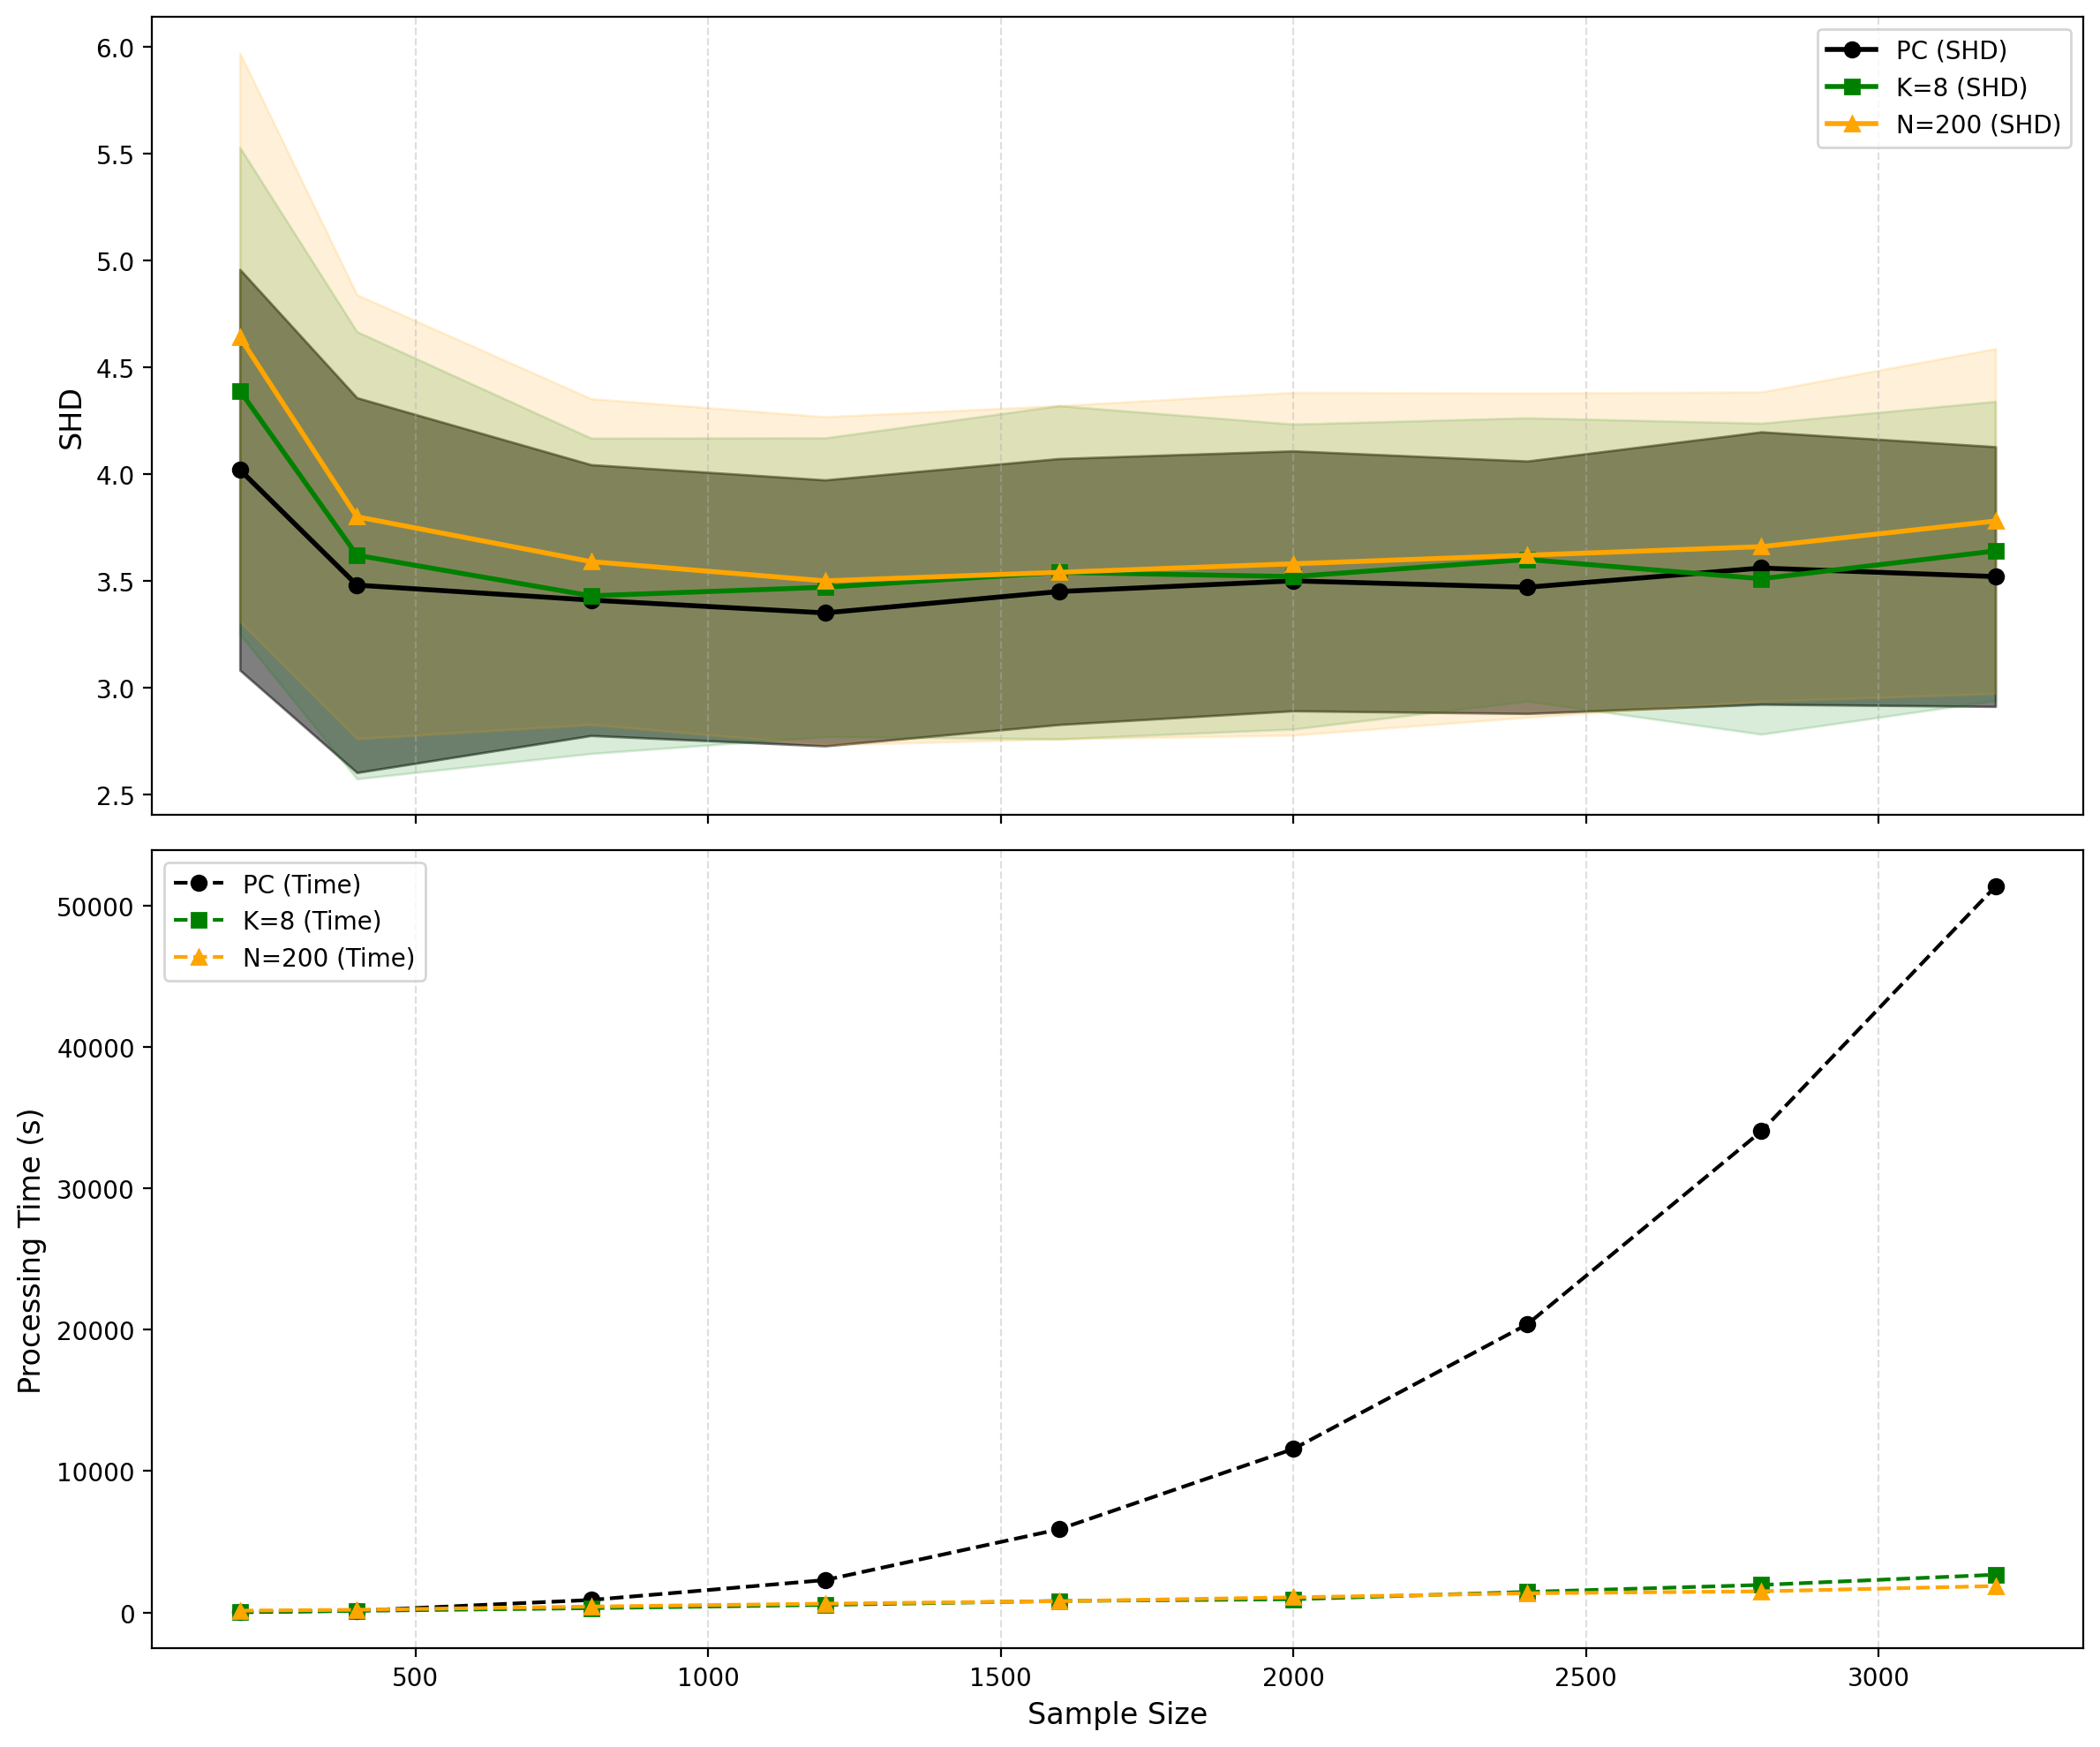

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True, dpi=200)

ax1.plot(x, pc, marker='o', label='PC (SHD)', color='black', linewidth=2)
ax1.fill_between(x, np.array(pc) - np.array(std_pc), np.array(pc) + np.array(std_pc), 
                 color='black', alpha=0.5)
ax1.plot(x, ek8, marker='s', label='K=8 (SHD)', color='green', linewidth=2)
ax1.fill_between(x, np.array(ek8) - np.array(std_ek8), np.array(ek8) + np.array(std_ek8), 
                 color='green', alpha=0.15)
ax1.plot(x, en200, marker='^', label='N=200 (SHD)', color='orange', linewidth=2)
ax1.fill_between(x, np.array(en200) - np.array(std_en200), np.array(en200) + np.array(std_en200), 
                 color='orange', alpha=0.15)
ax1.set_ylabel('SHD', fontsize=12)
ax1.legend(fontsize=10, loc='upper right')
ax1.grid(axis='x', linestyle='--', alpha=0.4)

ax2.plot(x, time_pc, marker='o', label='PC (Time)', color='black', linestyle='--')
ax2.plot(x, time_ek8, marker='s', label='K=8 (Time)', color='green', linestyle='--')
ax2.plot(x, time_en200, marker='^', label='N=200 (Time)', color='orange', linestyle='--')
ax2.set_xlabel('Sample Size', fontsize=12)
ax2.set_ylabel('Processing Time (s)', fontsize=12)
ax2.legend(fontsize=10, loc='upper left')
ax2.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

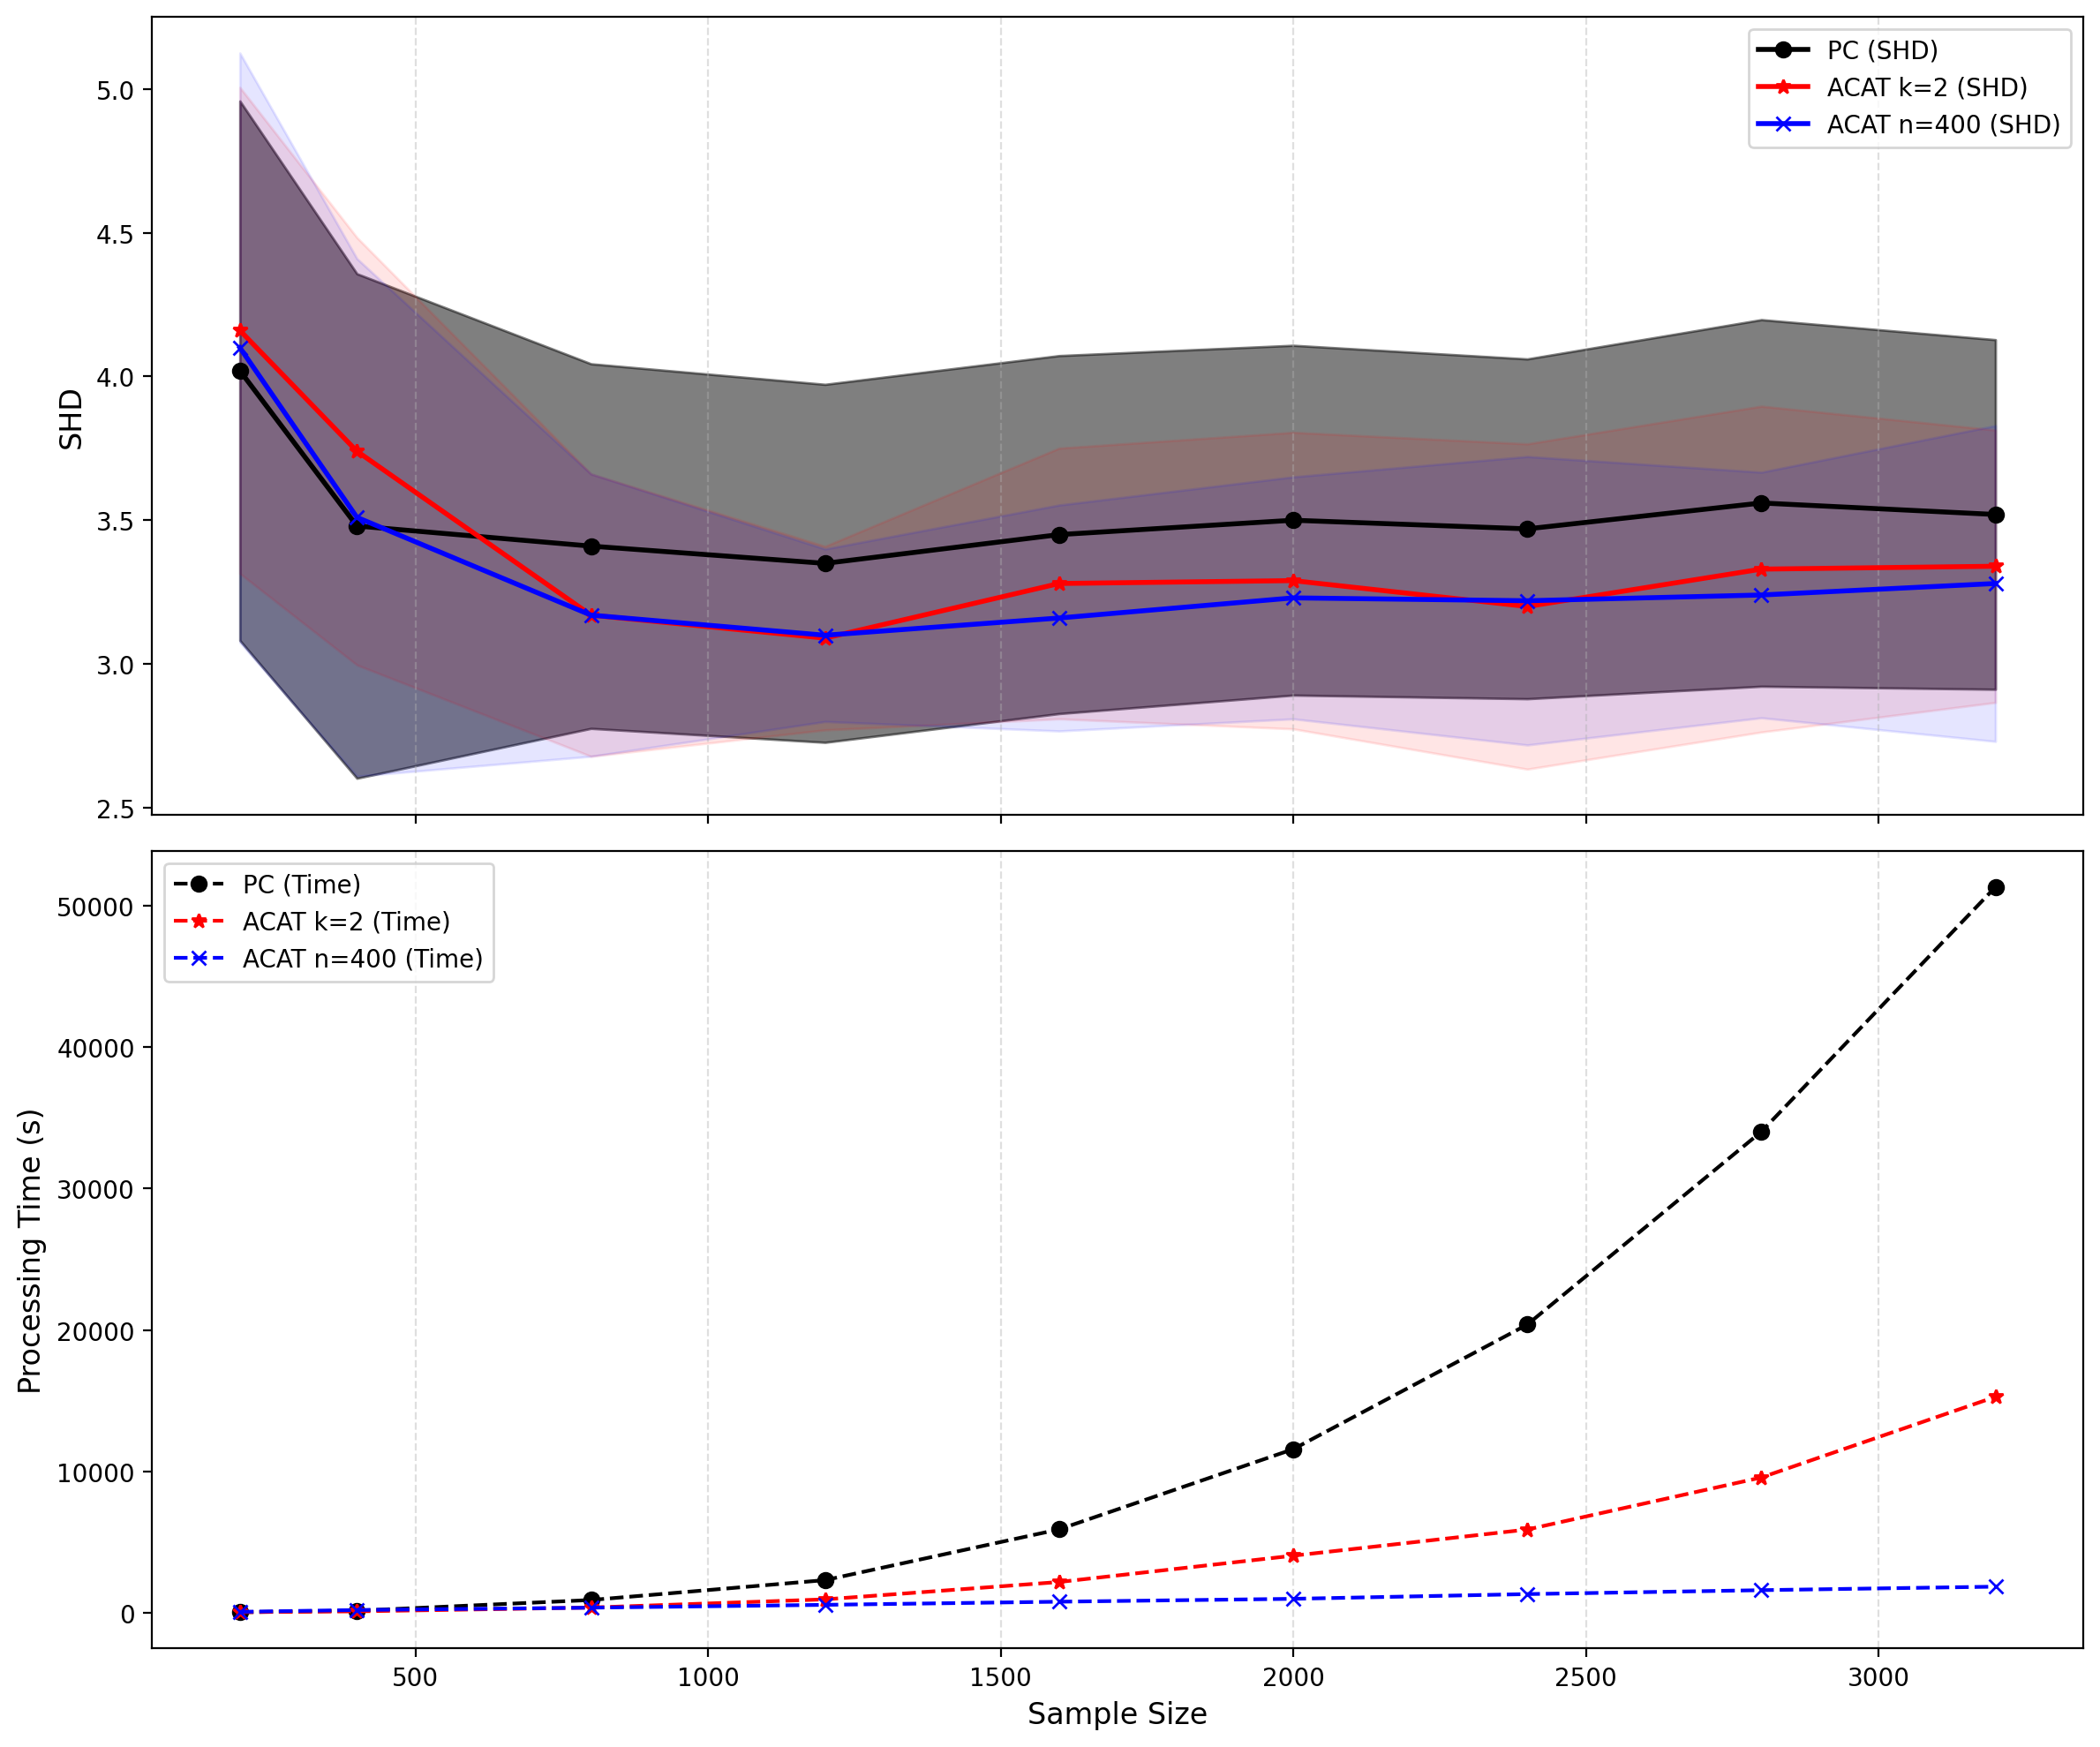

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True, dpi=200)

ax1.plot(x, pc, marker='o', label='PC (SHD)', color='black', linewidth=2)
ax1.fill_between(x, np.array(pc) - np.array(std_pc), np.array(pc) + np.array(std_pc), 
                 color='black', alpha=0.5)
ax1.plot(x, ak2, marker='*', label='ACAT k=2 (SHD)', color='red', linewidth=2)
ax1.fill_between(x, np.array(ak2) - np.array(std_ak2), np.array(ak2) + np.array(std_ak2), 
                 color='red', alpha=0.1)
ax1.plot(x, an200, marker='x', label='ACAT n=400 (SHD)', color='blue', linewidth=2)
ax1.fill_between(x, np.array(an200) - np.array(std_an200), np.array(an200) + np.array(std_an200), 
                 color='blue', alpha=0.1)
ax1.set_ylabel('SHD', fontsize=12)
ax1.legend(fontsize=10, loc='upper right')
ax1.grid(axis='x', linestyle='--', alpha=0.4)

ax2.plot(x, time_pc, marker='o', label='PC (Time)', color='black', linestyle='--')
ax2.plot(x, time_ak2, marker='*', label='ACAT k=2 (Time)', color='red', linestyle='--')
ax2.plot(x, time_an200, marker='x', label='ACAT n=400 (Time)', color='blue', linestyle='--')
ax2.set_xlabel('Sample Size', fontsize=12)
ax2.set_ylabel('Processing Time (s)', fontsize=12)
ax2.legend(fontsize=10, loc='upper left')
ax2.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()